#Introdução

Este notebook contém a parte prática do trabalho de conclusão de curso titulado "Aprendizado de máquina para análise de tráfego de rede e detecção de intrusão".

In [1]:
!pip install sweetviz mljar-supervised ipywidgets

In [17]:
import pandas as pd
import numpy as np
import sklearn
import sweetviz as sv
from supervised.automl import AutoML # mljar-supervised
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from ipywidgets import IntProgress

In [18]:
path_Train = "./KDDTrain+.txt"
path_Test = "./KDDTest+.txt"

#Leitura e adição de Headers 

In [19]:
df_train= pd.read_csv(path_Train,header=None)
df_test= pd.read_csv(path_Test,header=None)

In [20]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df_train.columns = columns
df_test.columns = columns

#Tratamento da variável categórica de ataque
Nesta parte, a variável categórica de ataque é transformada em 0 ou 1 indicando a presença de um ataque.
* 0 simboliza tráfego normal
* 1 simboliza tráfego inseguro

In [21]:
is_attack = df_train.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = df_test.attack.map(lambda a: 0 if a == 'normal' else 1)

df_train['attack_flag'] = is_attack
df_test['attack_flag'] = test_attack

df_train.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.03   
1               0       0    0  ...                    0.60   
2               0       0    0  ...                    0.05   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate   attack  level  attack_flag  
0                      0.00   normal     20            0  
1                      0.00   normal     15            0  
2                      0.00  neptune     19            1  
3                      0.01   normal     21            0  
4                      0.00   normal     21            0  

[5 rows x 44 columns]

## Normalização

In [16]:
df_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [22]:
label_encoder = LabelEncoder()

In [25]:
cat_var = df_train['protocol_type']
num_var = label_encoder.fit_transform(cat_var)
df_train['protocol_type'] = num_var

cat_var = df_train['service']
num_var = label_encoder.fit_transform(cat_var)
df_train['service'] = num_var

cat_var = df_train['flag']
num_var = label_encoder.fit_transform(cat_var)
df_train['flag'] = num_var

cat_var = df_train['attack']
num_var = label_encoder.fit_transform(cat_var)
df_train['attack'] = num_var

df_train.head()


duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.03   
1               0       0    0  ...                    0.60   
2               0       0    0  ...                    0.05   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  attack  level  attack_flag  
0                      0.00      11     20            0  
1                      0.00      11     15            0  
2                      0.00       9     19            1  
3                      0.01      11     21            0  
4                      0.00      11     21            0  

[5 rows x 44 columns]

## Seleção de colunas relevantes
Durante esta etapa foram selecionadas as colunas que contém informações relevantes para a determinação dos ataques.

As colunas significativas são:

same_srv_rate, dst_host_srv_count, dst_host_same_srv_rate,dst_host_srv_serror_rate, dst_host_serror_rate, serror_rate,dst_host_diff_srv_rate, diff_srv_rate, srv_diff_host_rate, service, flag,logged_in, srv_serror_rate, count, level, dst_host_count, srv_rerror_rate, dst_host_srv_rerror_rate, rerror_rate, dst_host_rerror_rate, attack_flag

In [7]:
df_del = df_train.drop(['same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_srv_serror_rate','service','flag','logged_in','dst_host_serror_rate','serror_rate','dst_host_diff_srv_rate','diff_srv_rate','srv_diff_host_rate','srv_serror_rate','count','level','dst_host_count','srv_rerror_rate','dst_host_srv_rerror_rate','rerror_rate','dst_host_rerror_rate'],axis=1)

In [8]:
cor_ananlysis = sv.analyze(df_train,target_feat='attack_flag')

                                             |          | [  0%]   00:00 -> (? left)


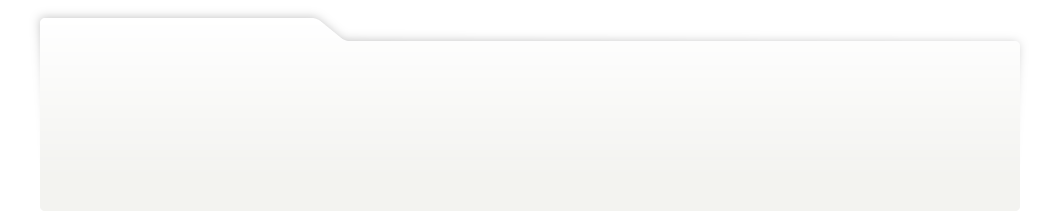
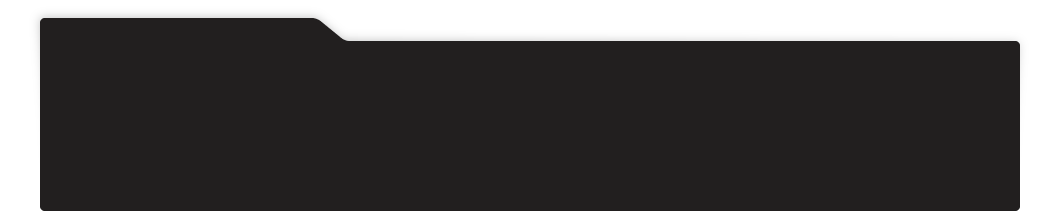
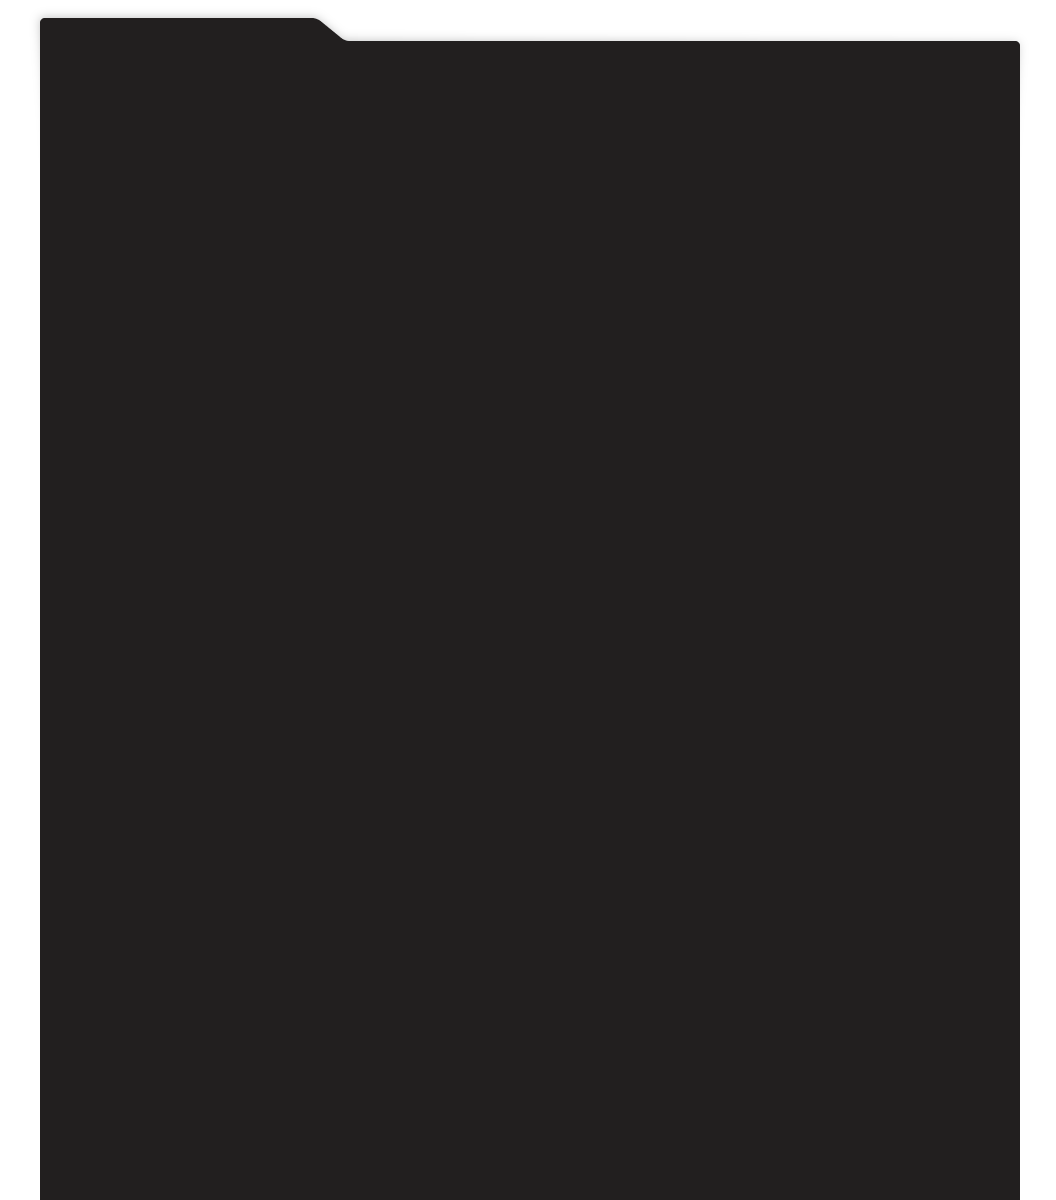
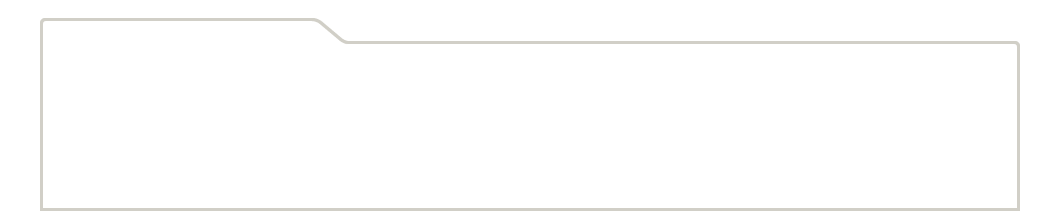
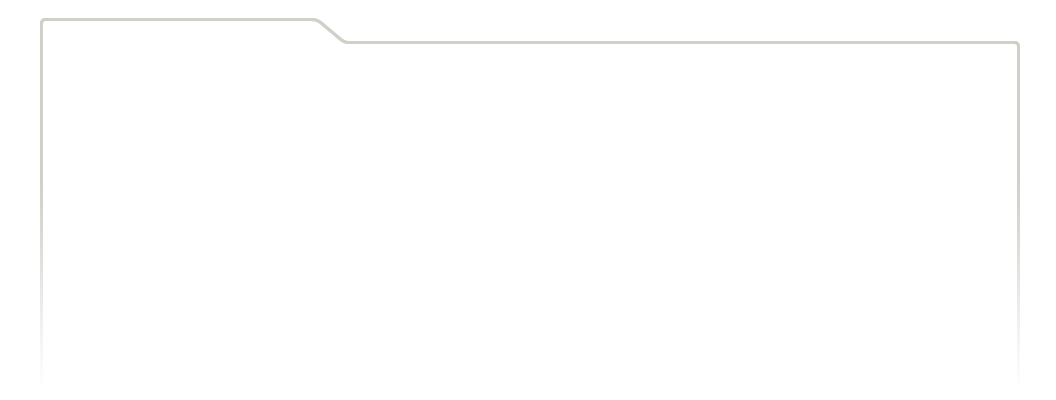
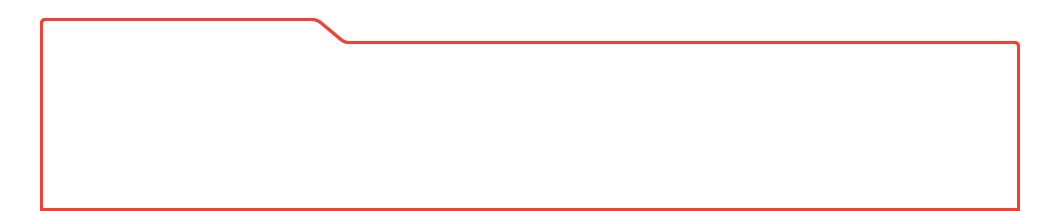
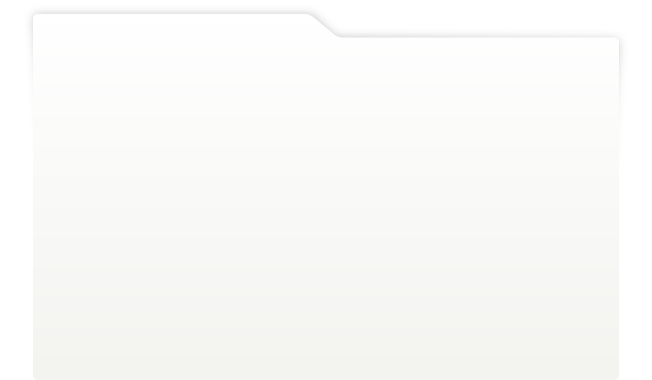
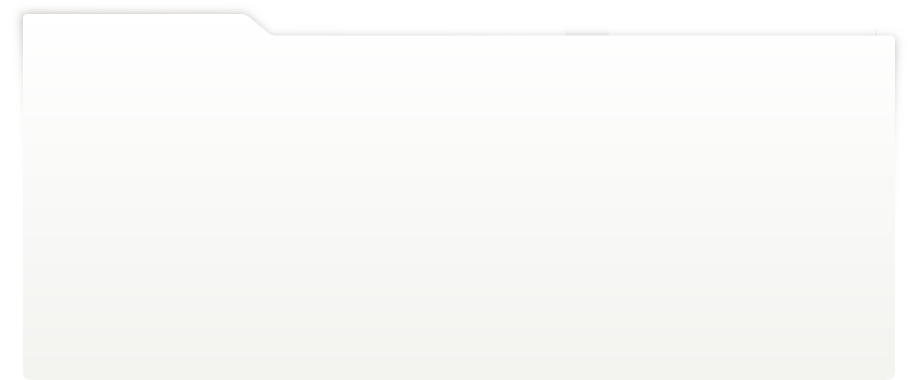
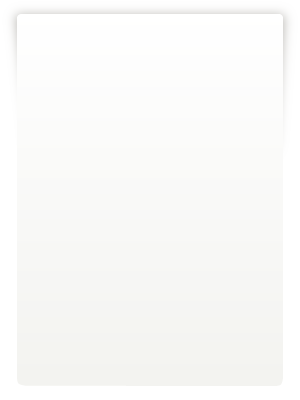
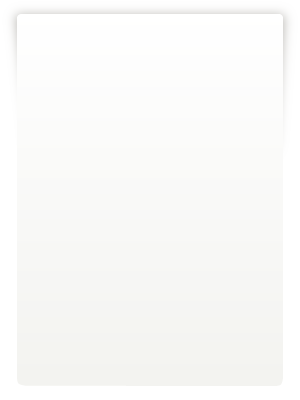
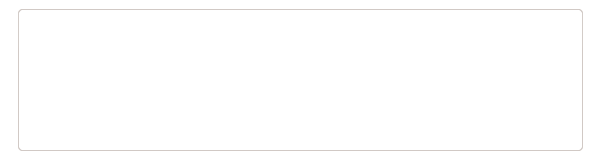
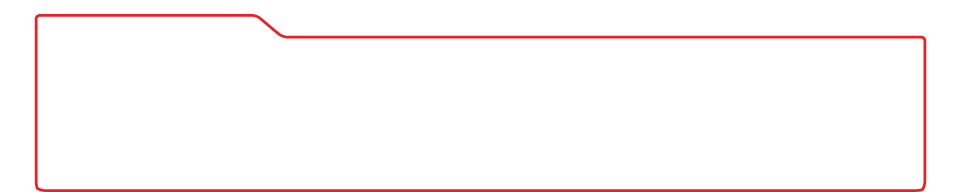
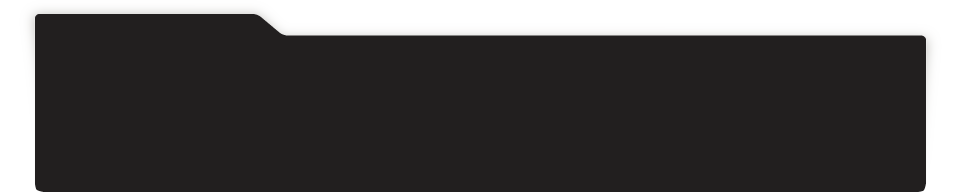
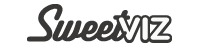
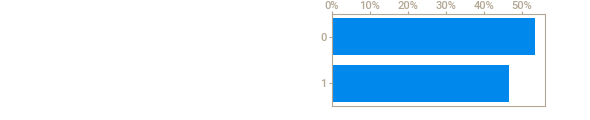
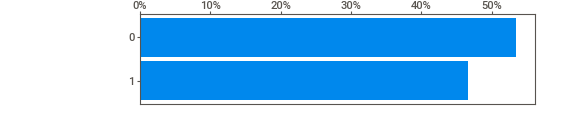
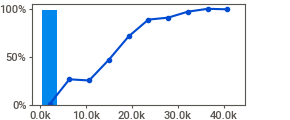
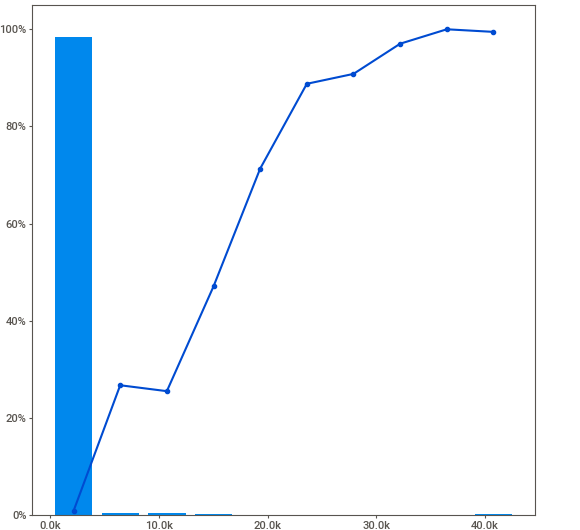
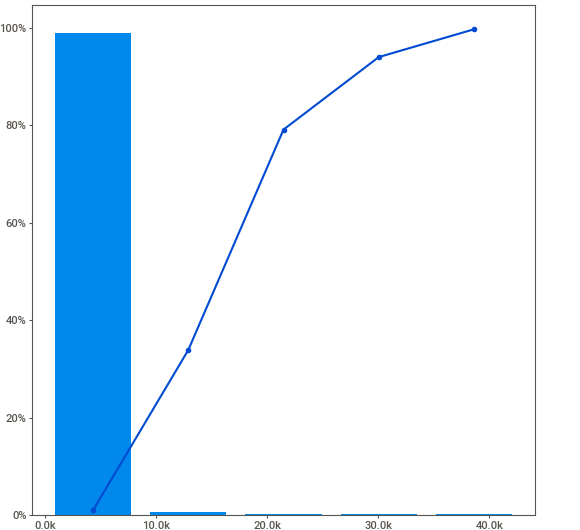
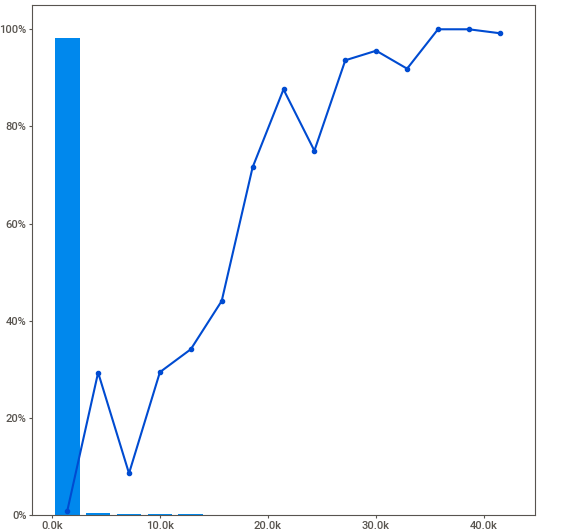
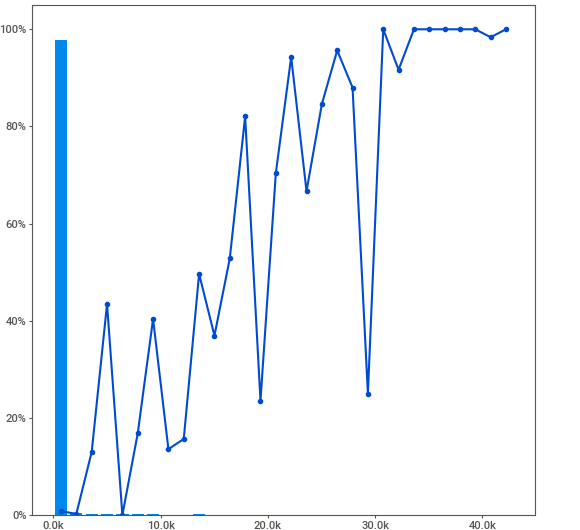
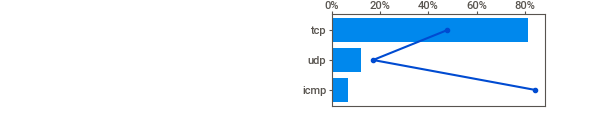
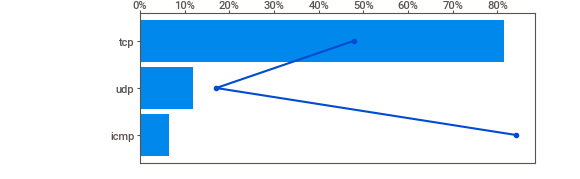
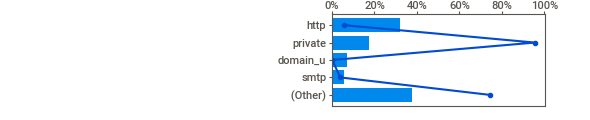
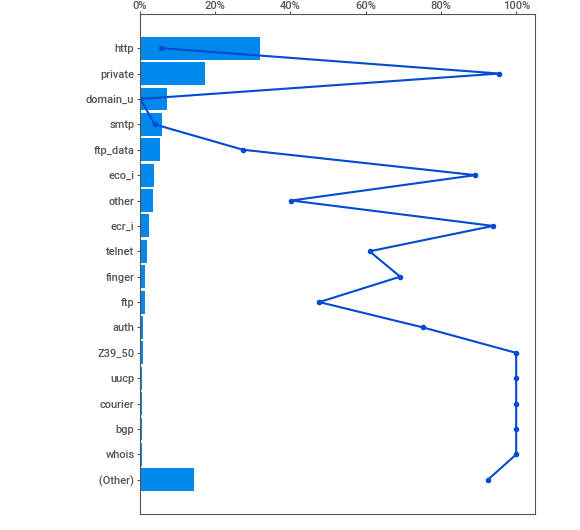
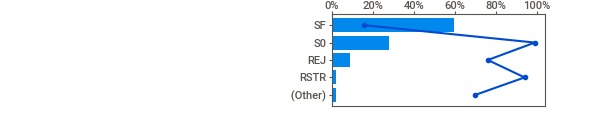
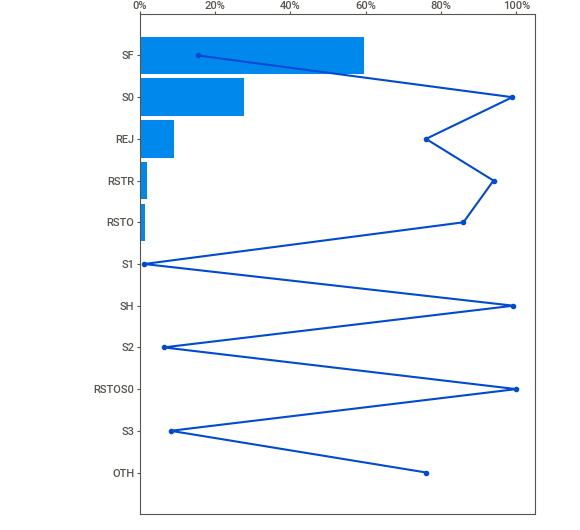
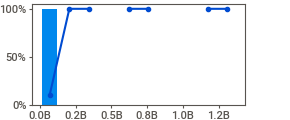
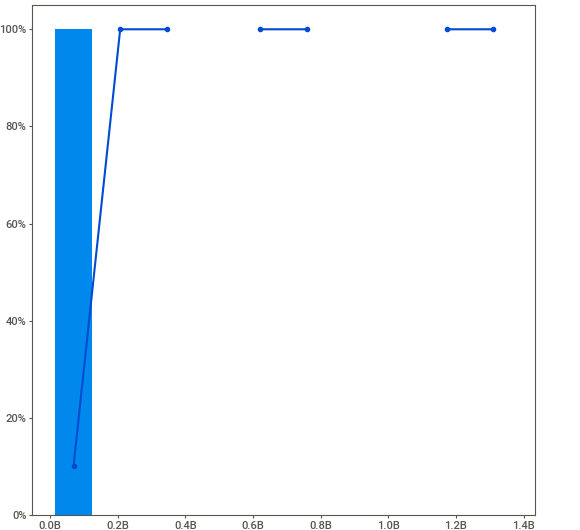
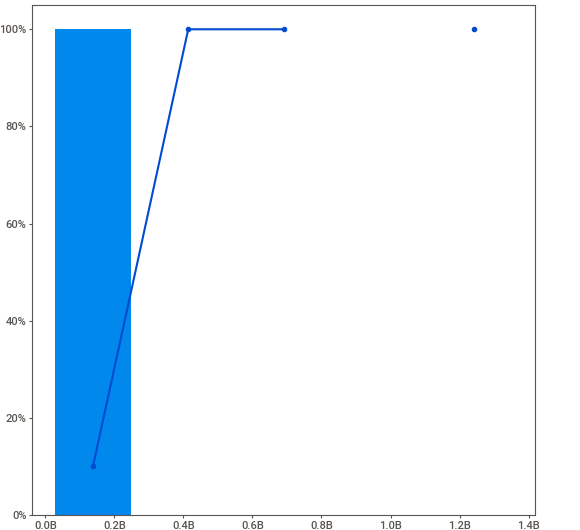
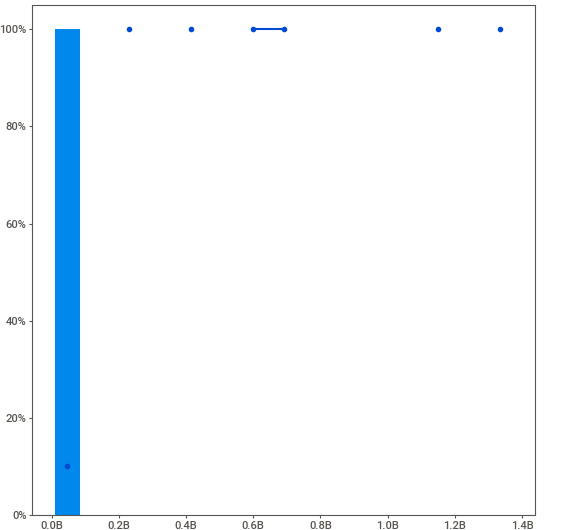
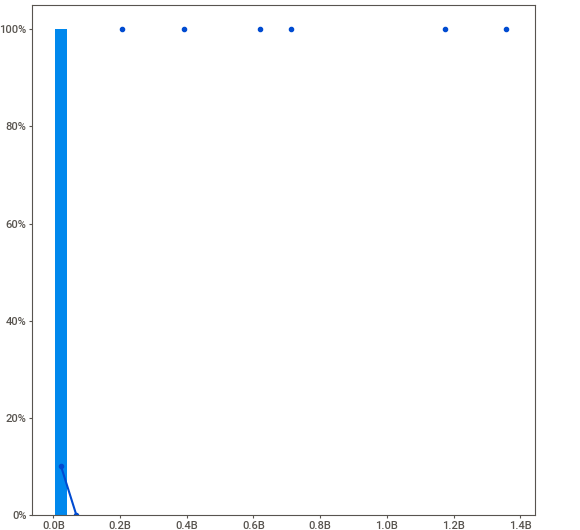
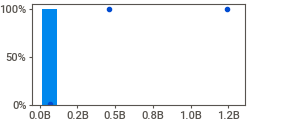
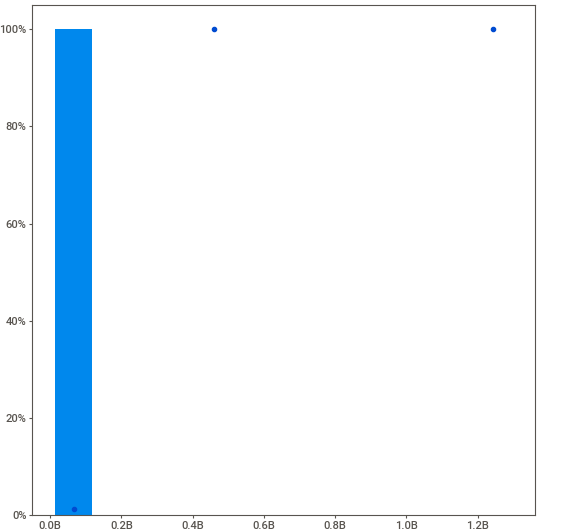
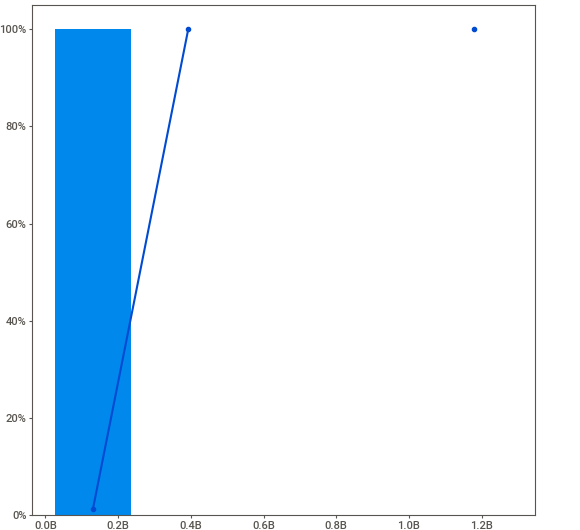
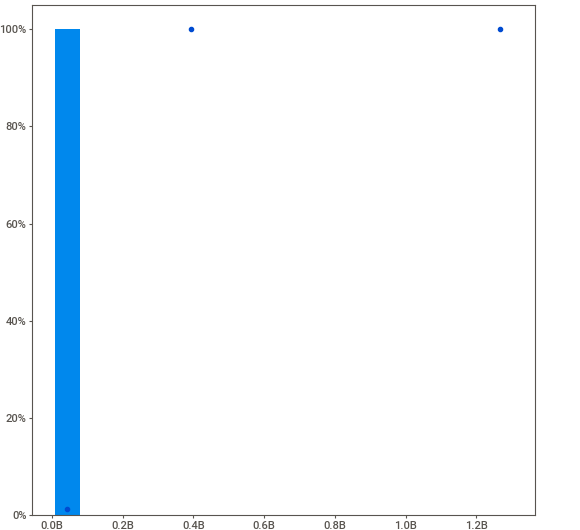
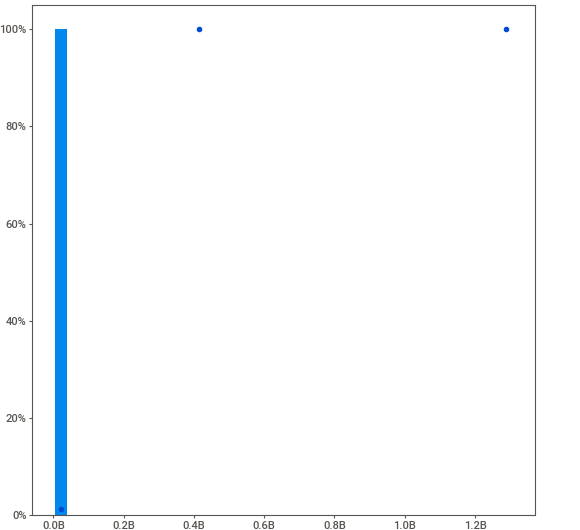
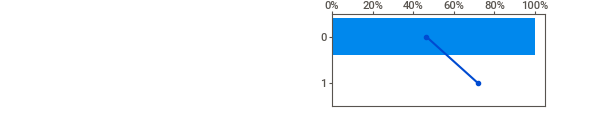
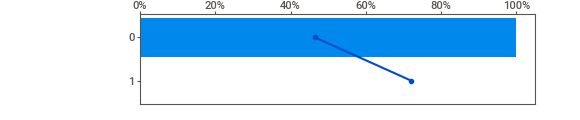
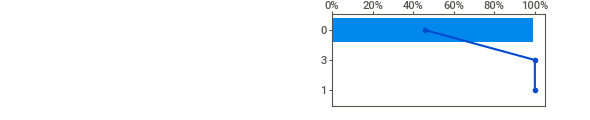
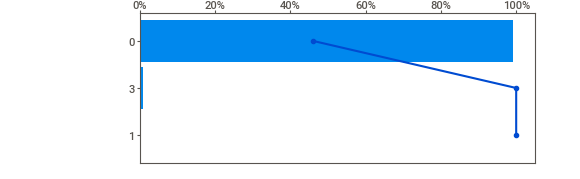
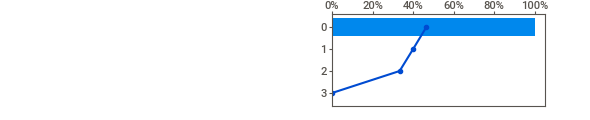
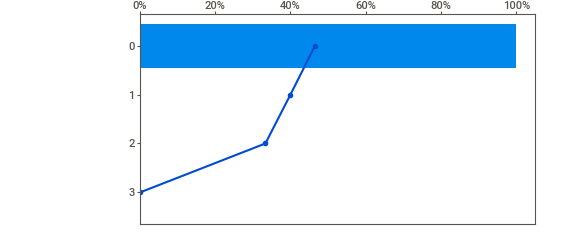
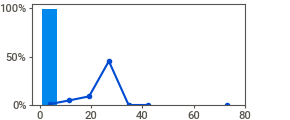
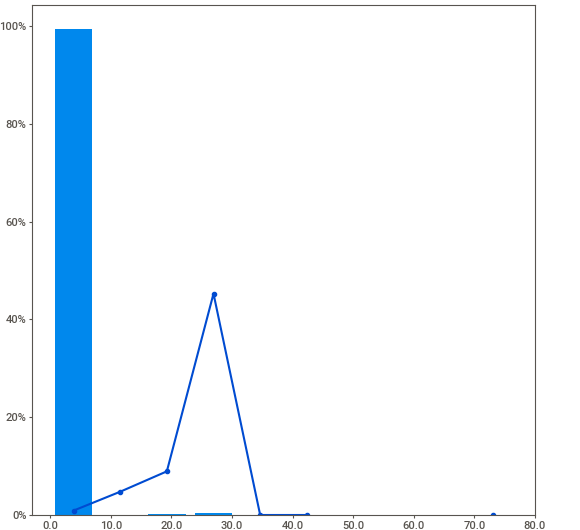
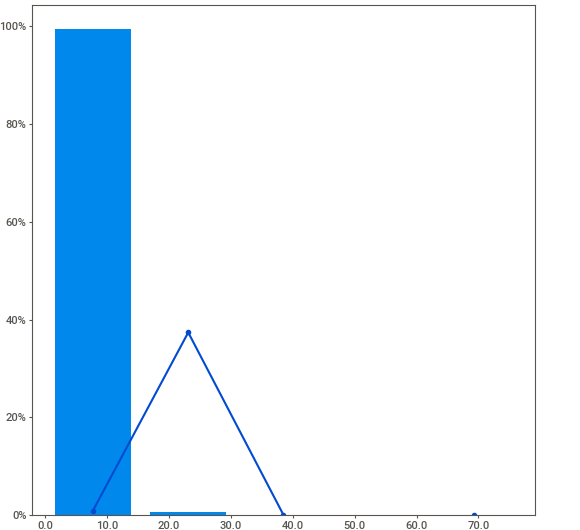
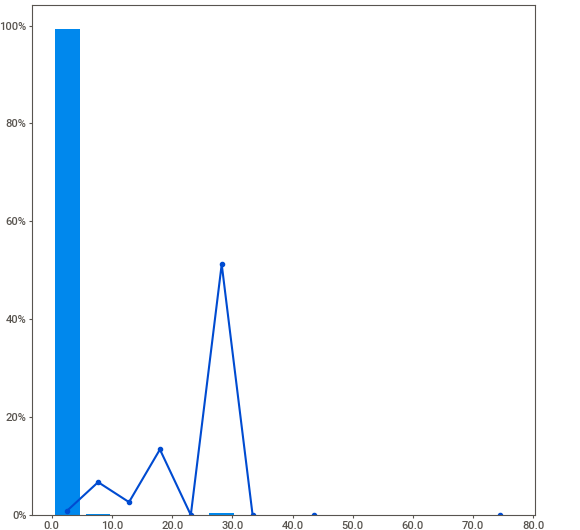
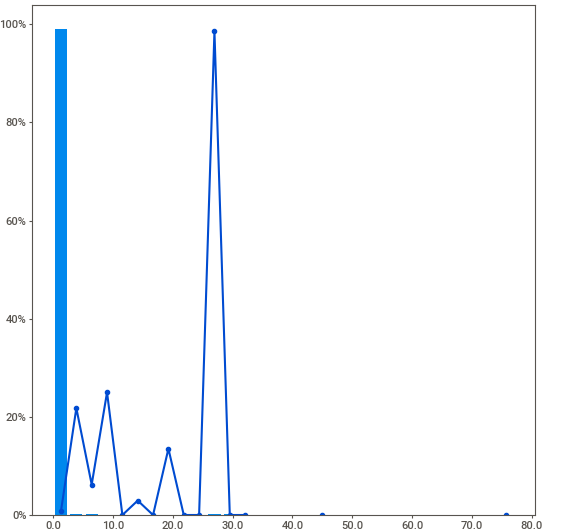
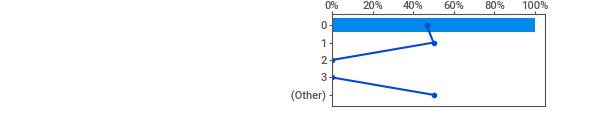
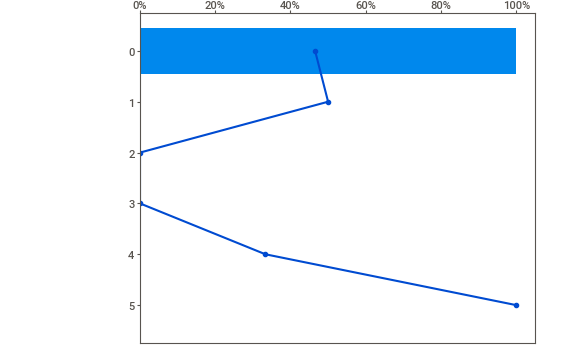
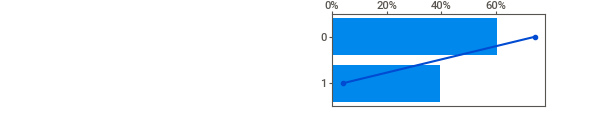
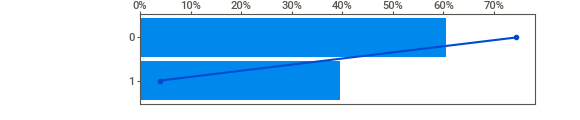
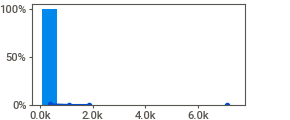
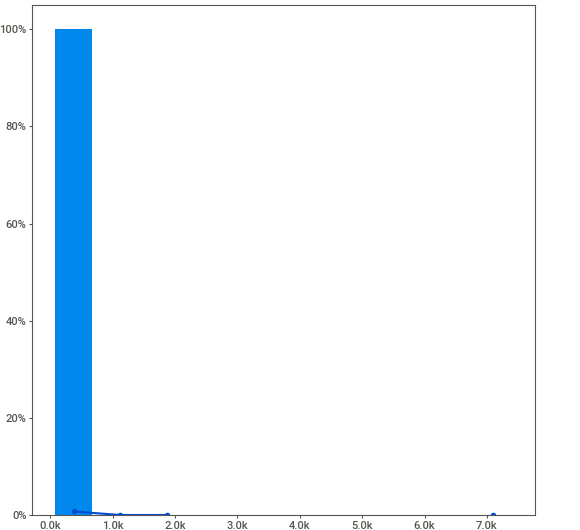
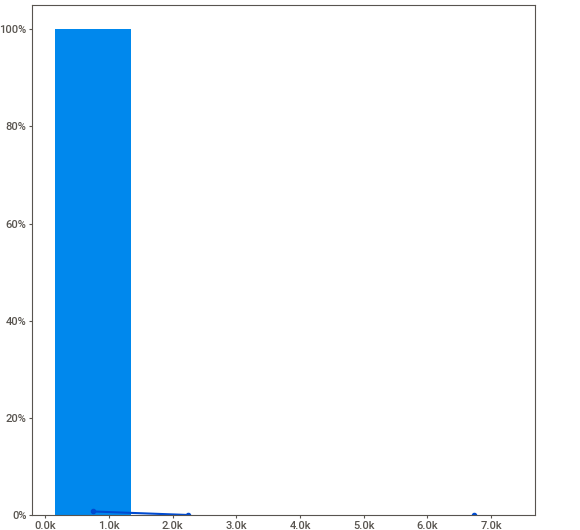
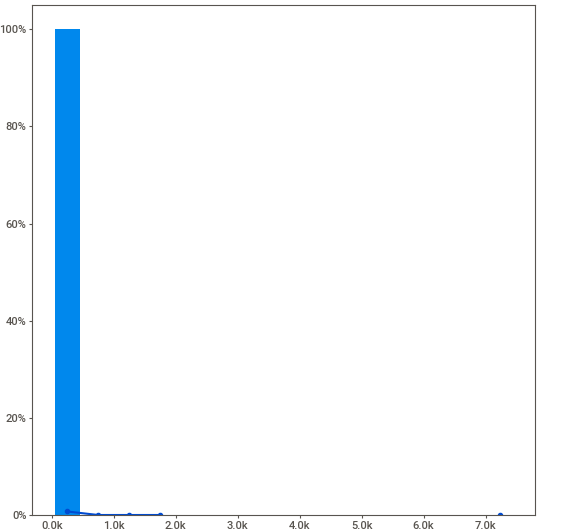
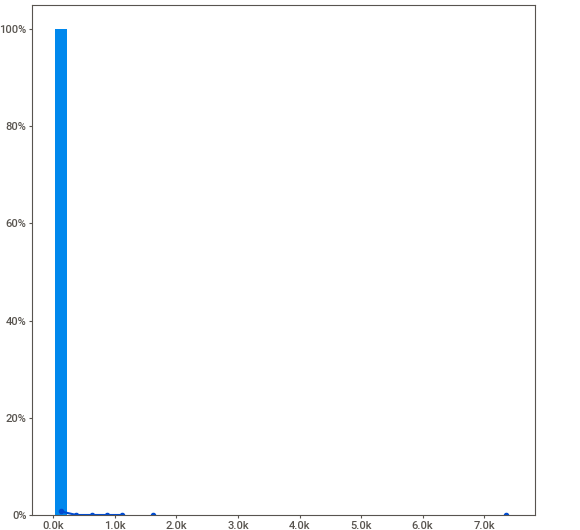
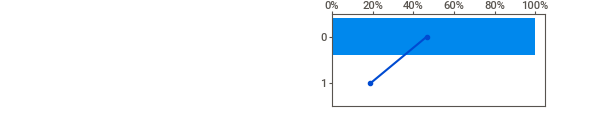
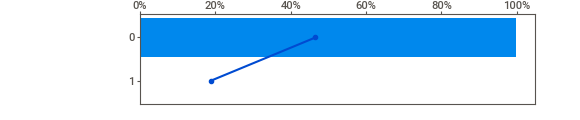
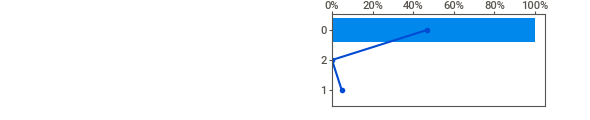
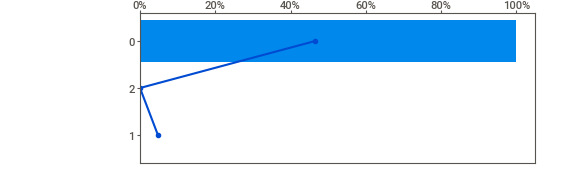
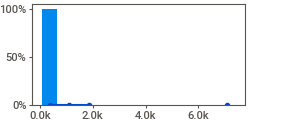
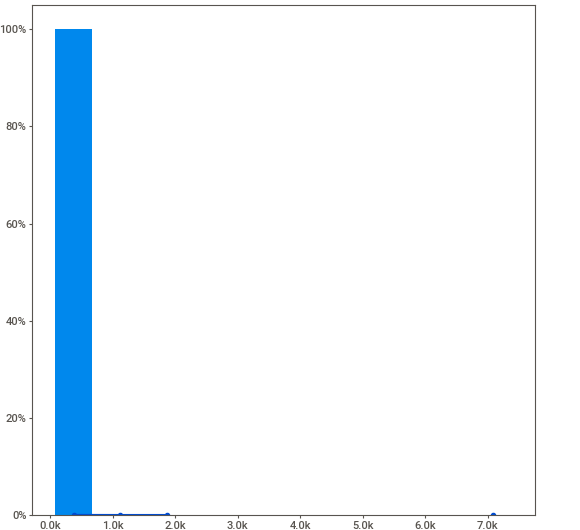
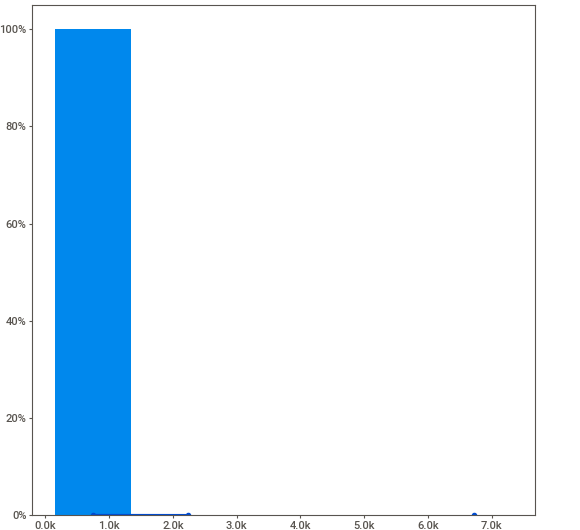
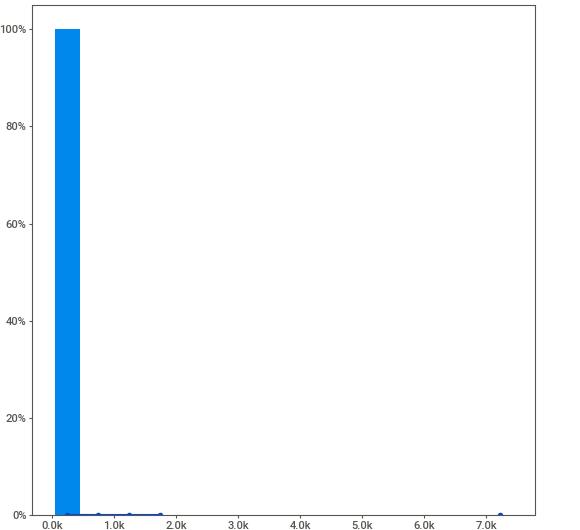
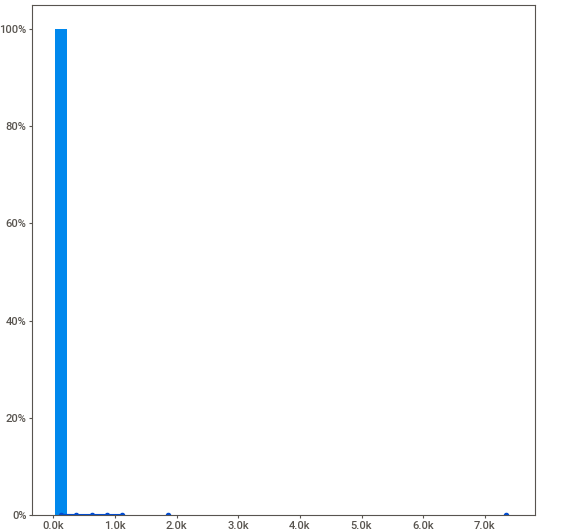
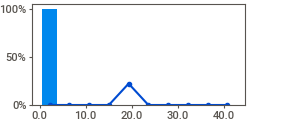
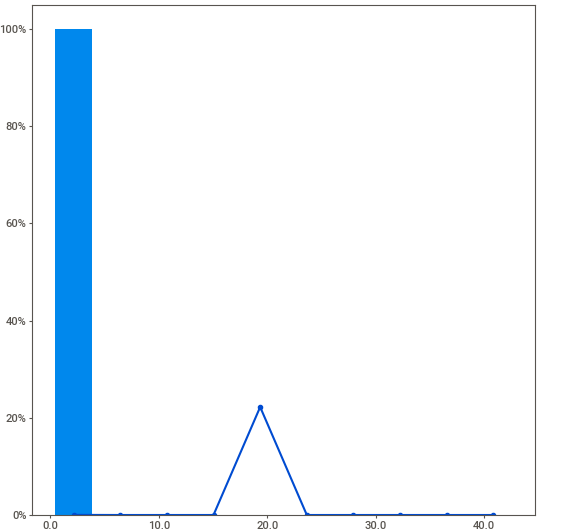
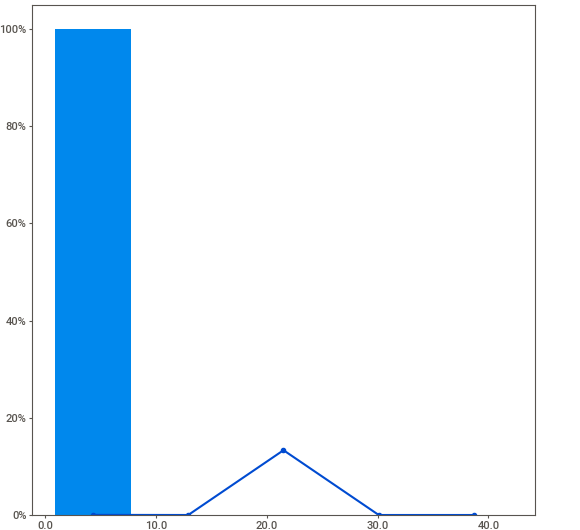
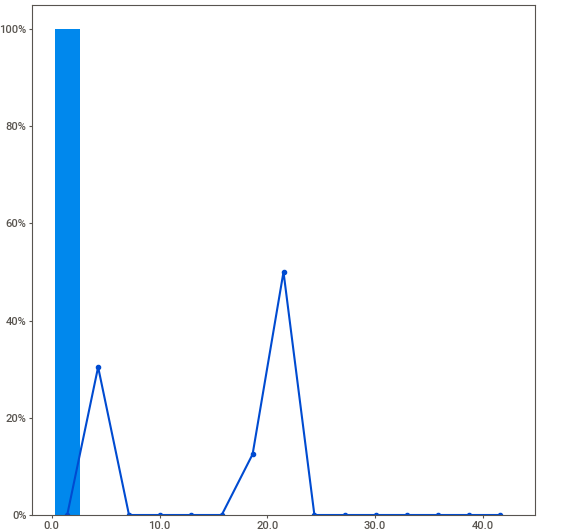
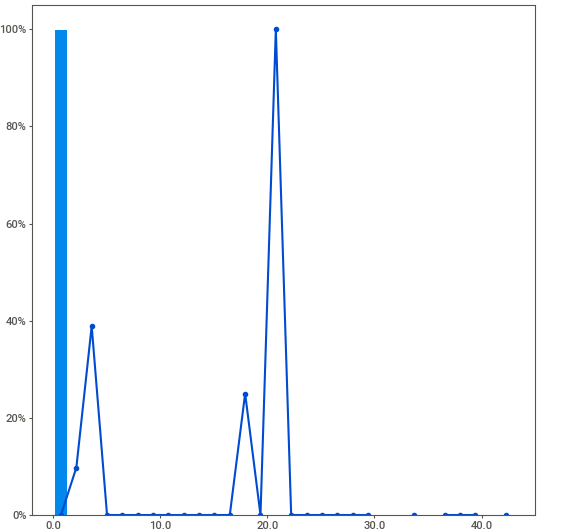
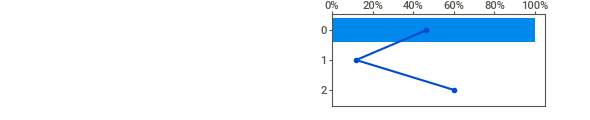
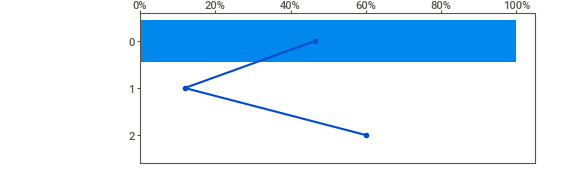
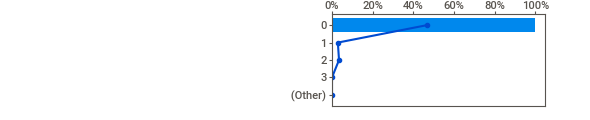
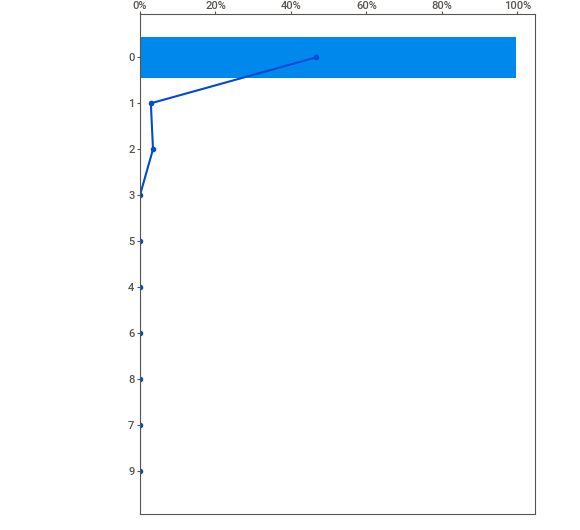
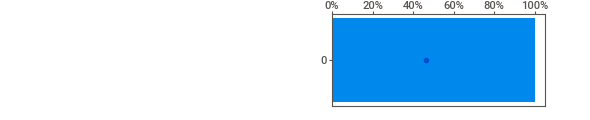
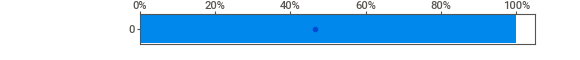
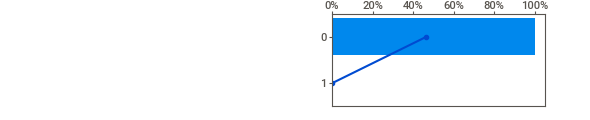
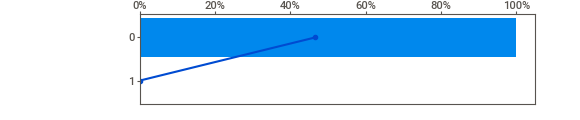
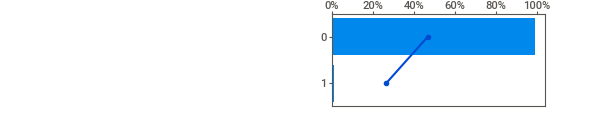
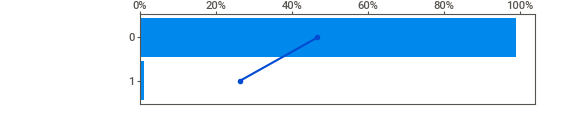
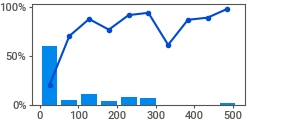
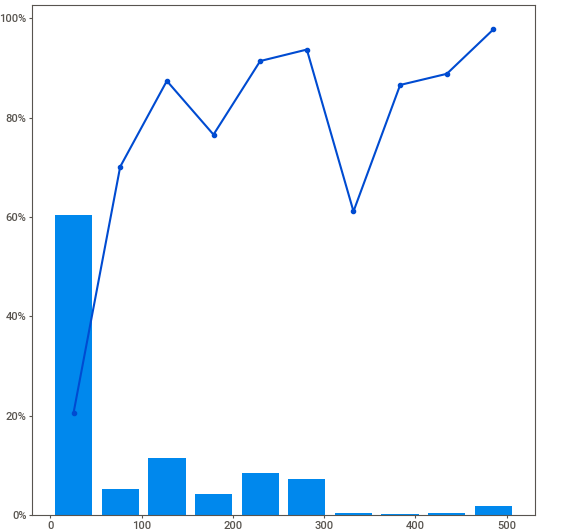
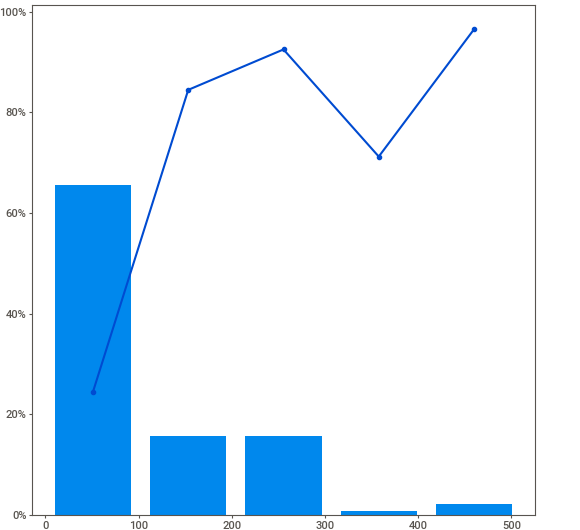
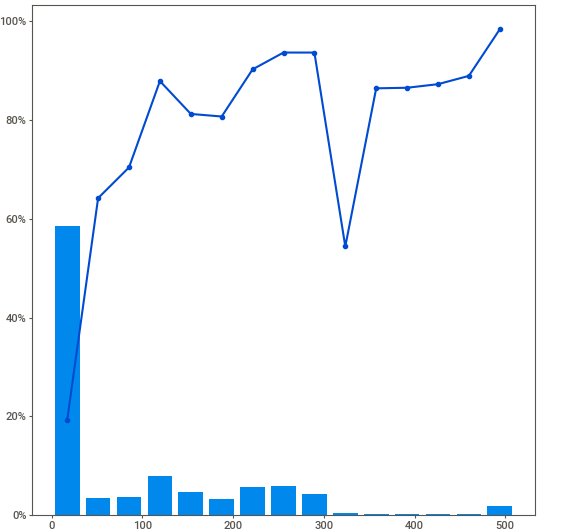
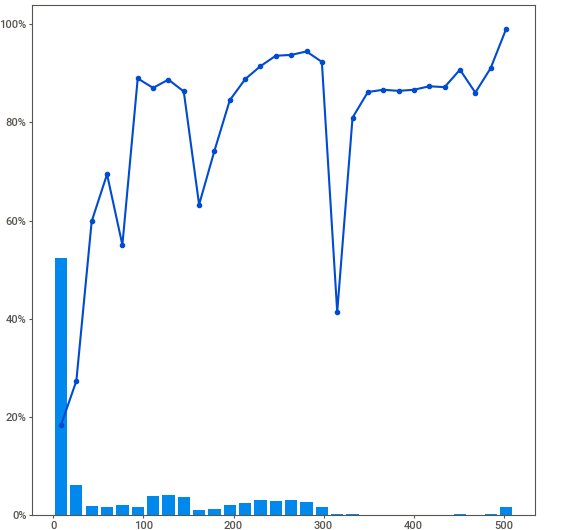
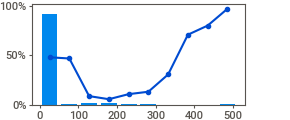
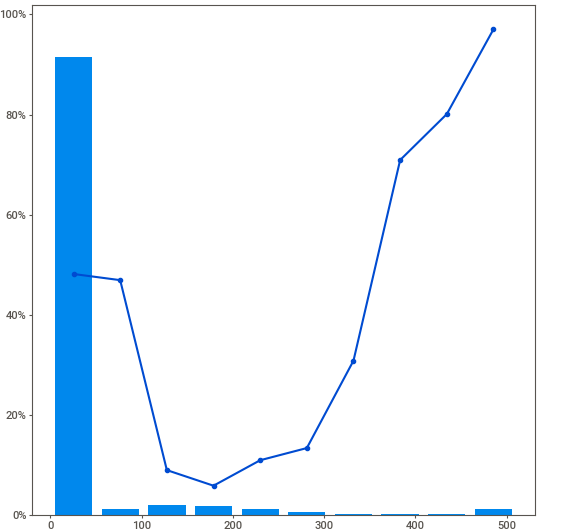
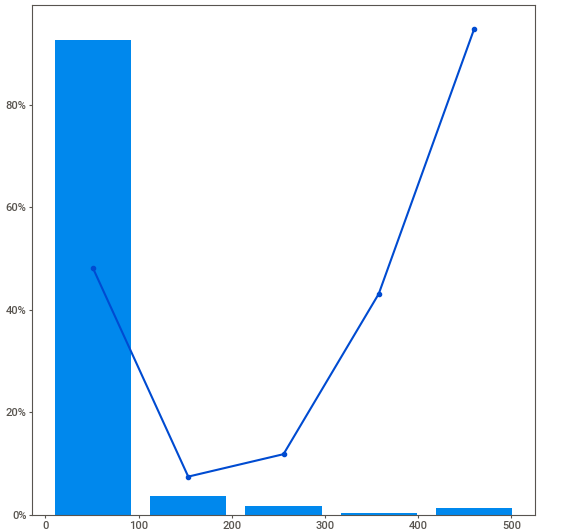
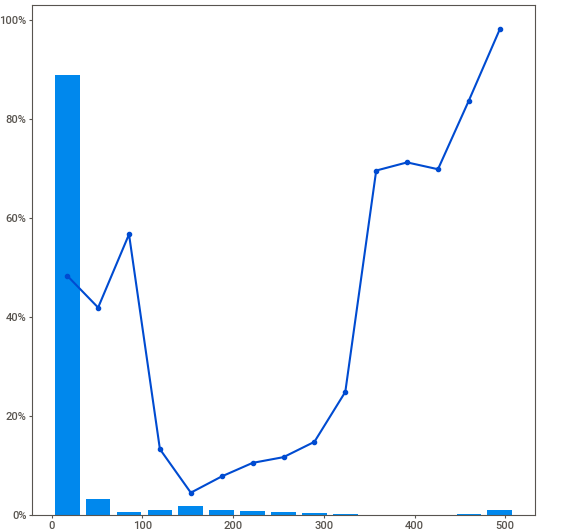
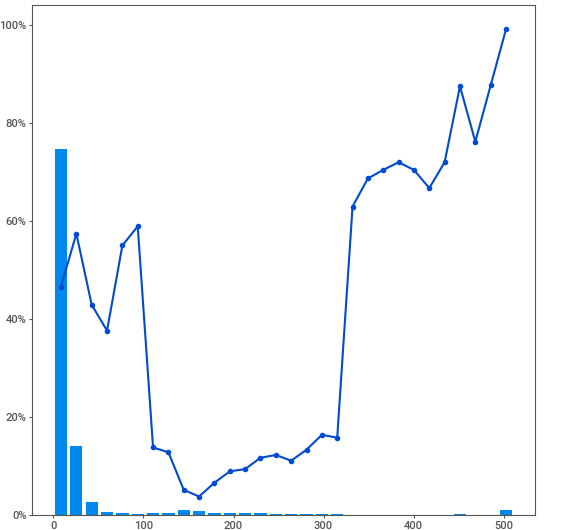
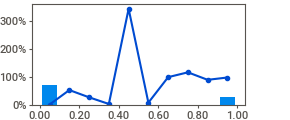
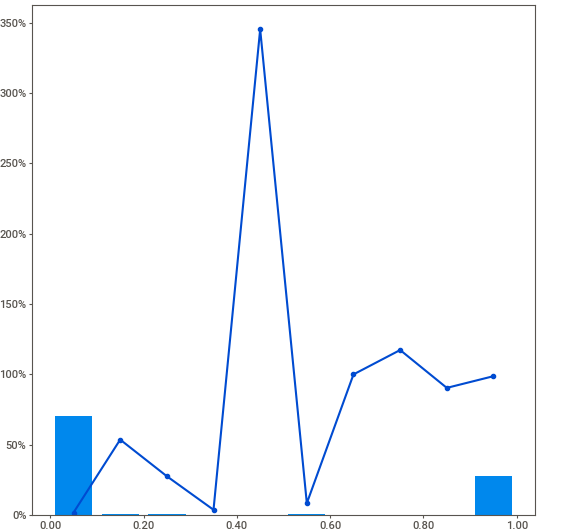
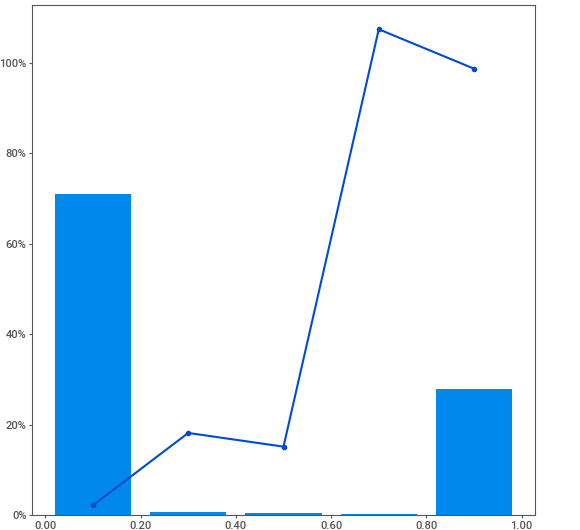
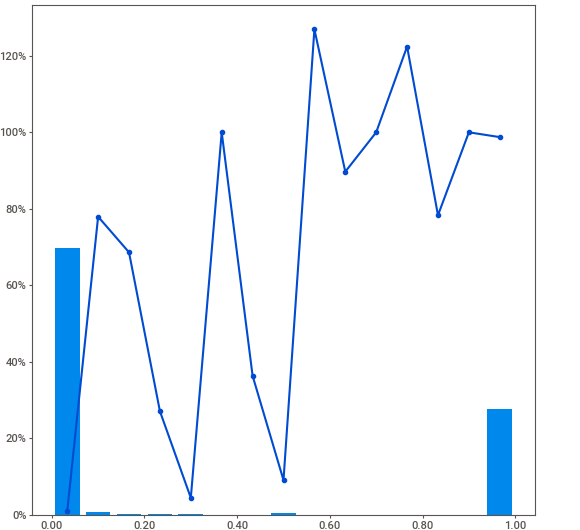
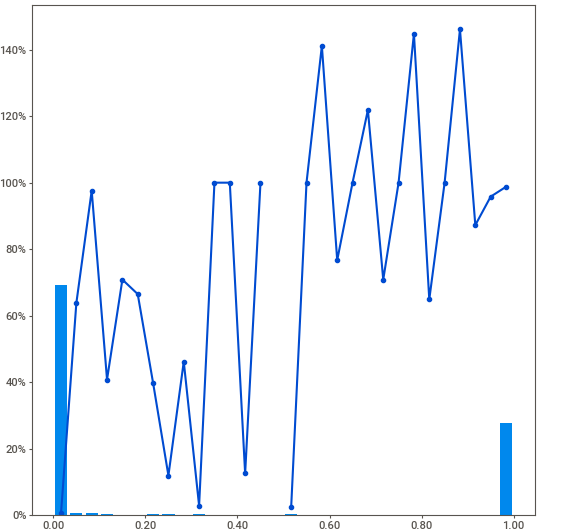
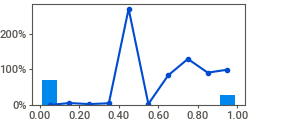
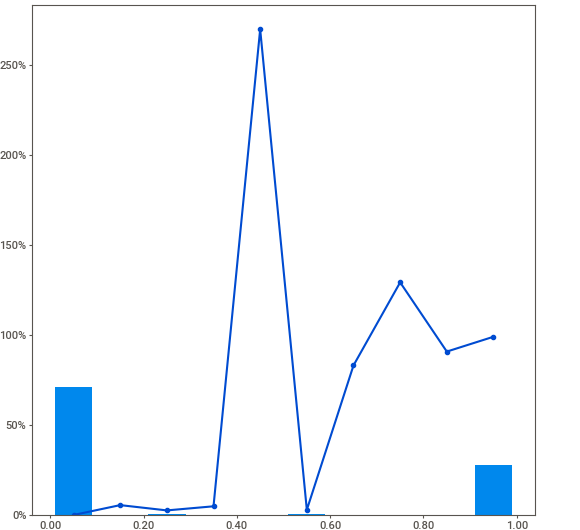
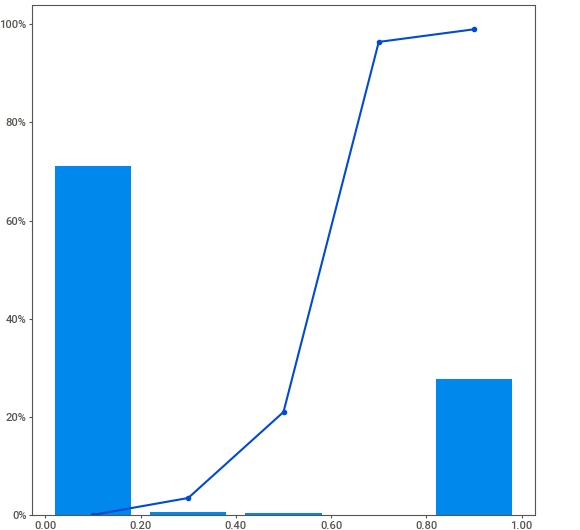
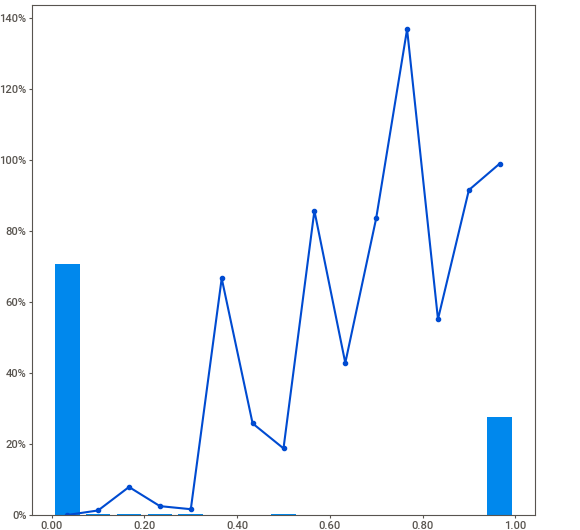
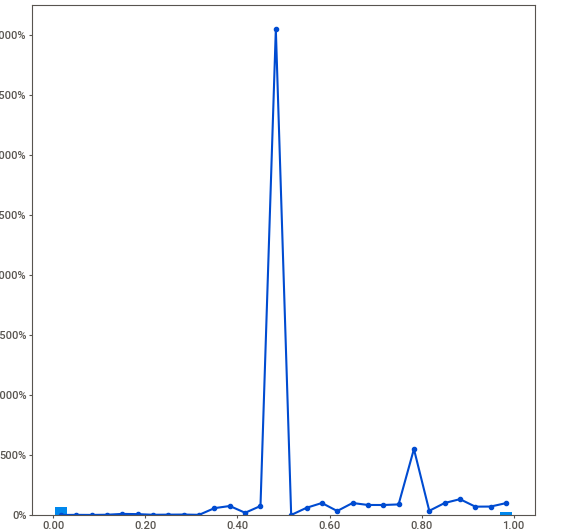
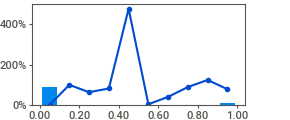
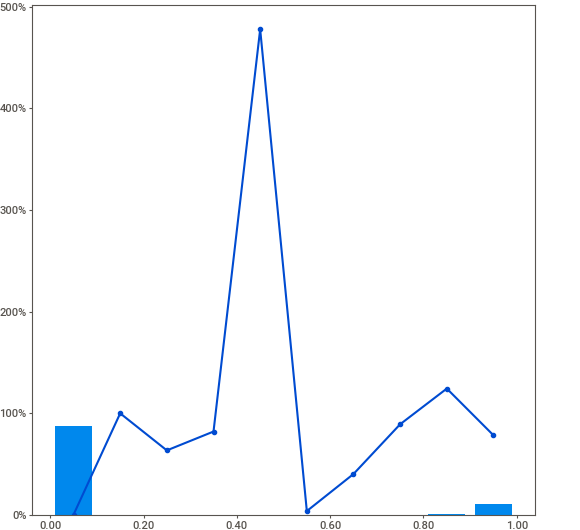
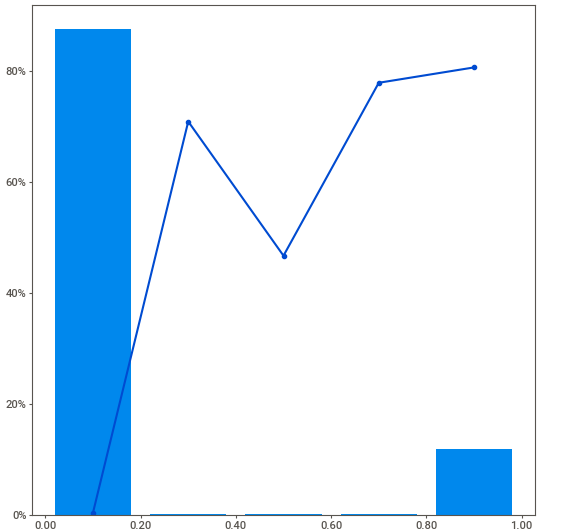
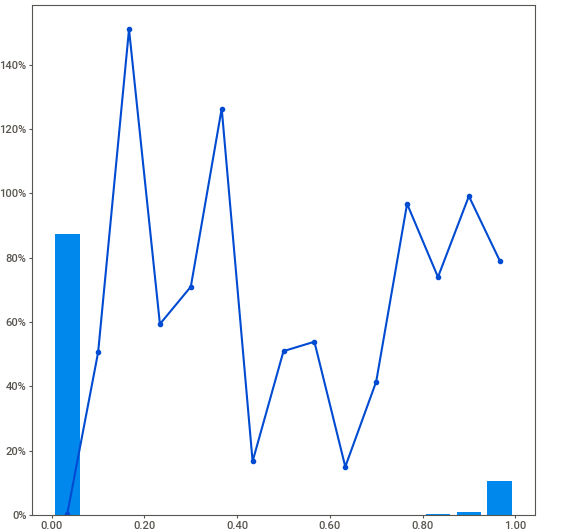
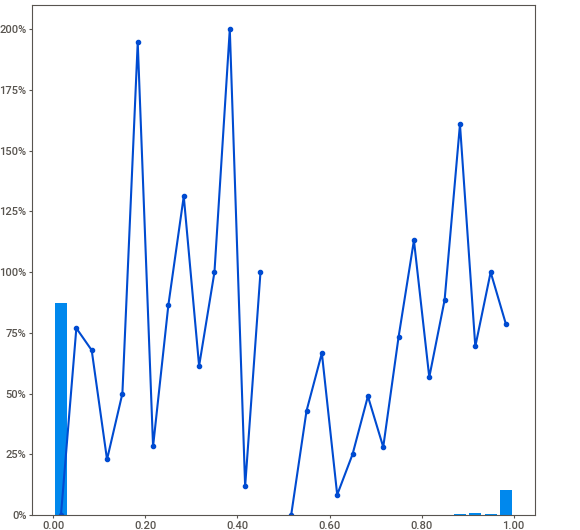
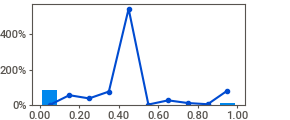
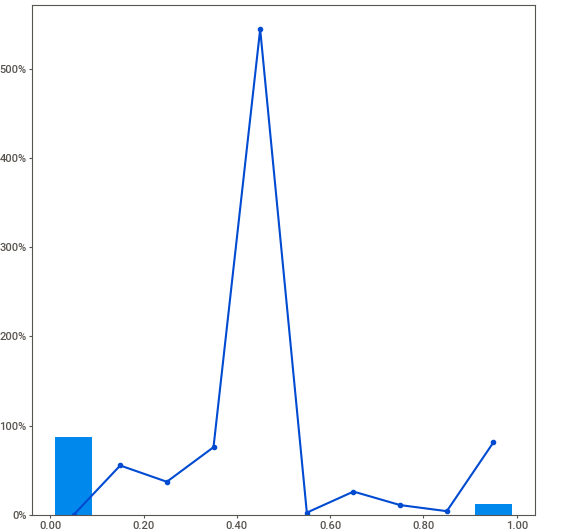
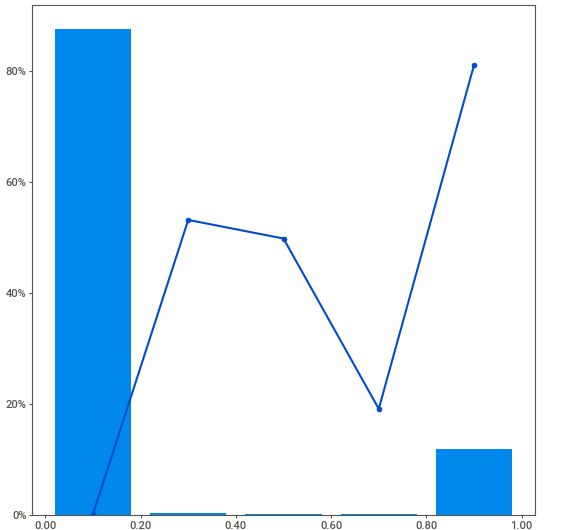
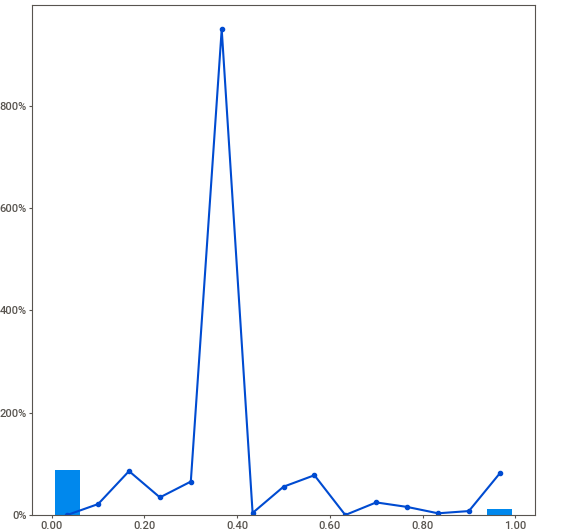
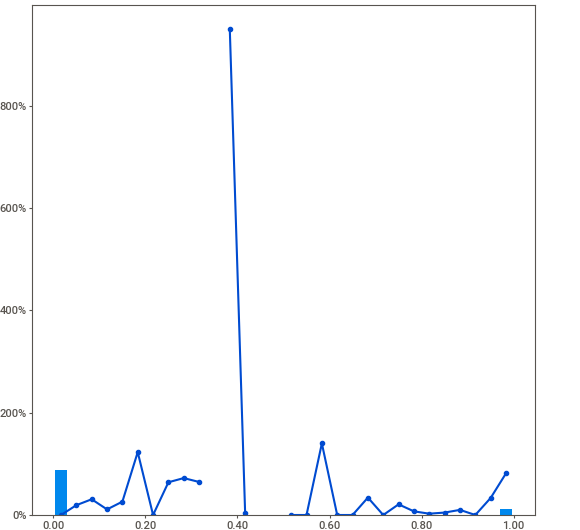
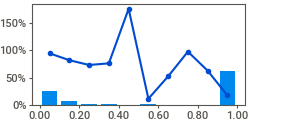
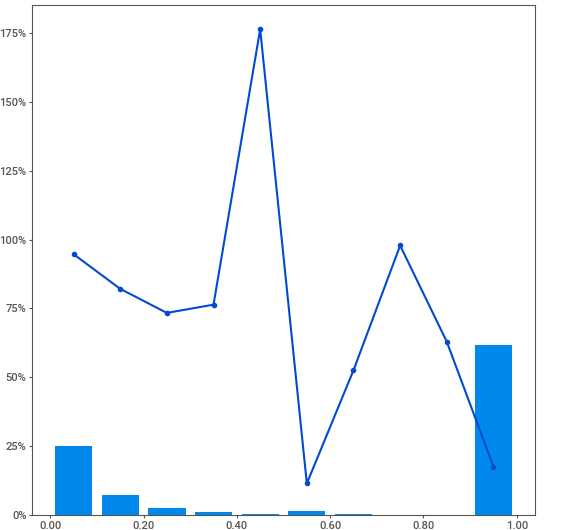
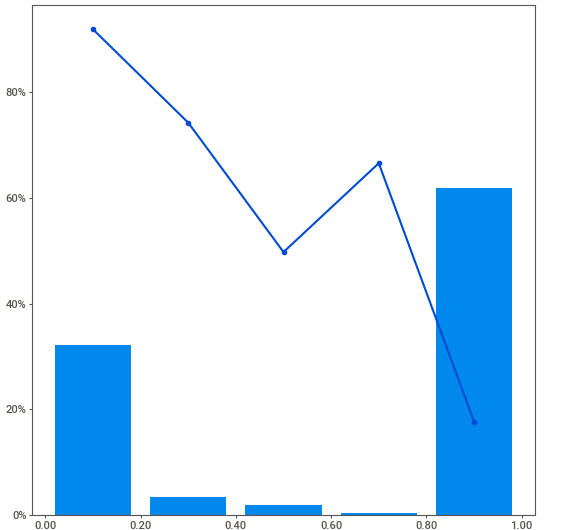
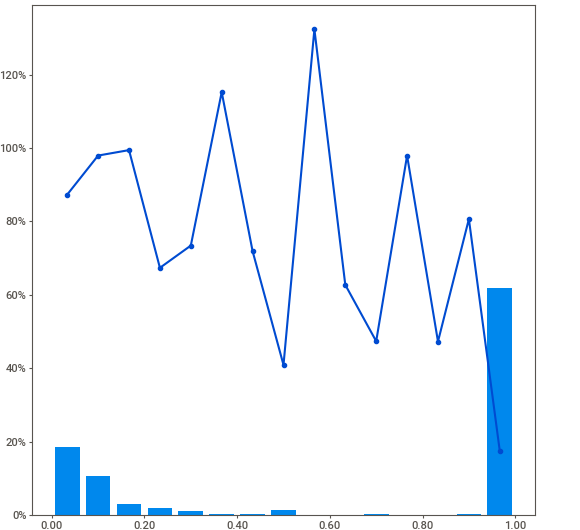
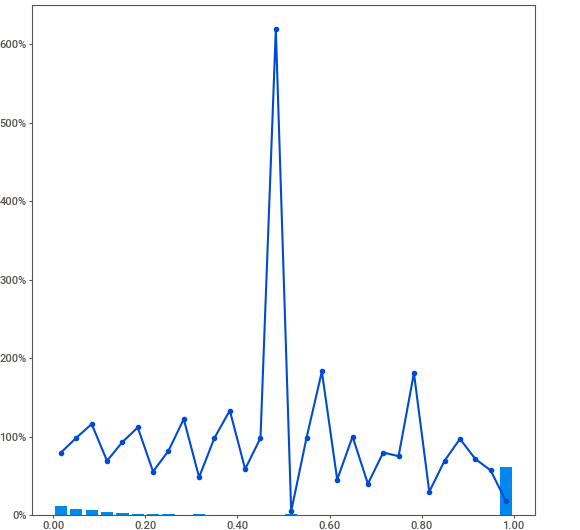
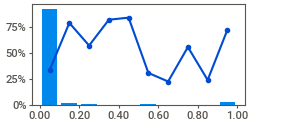
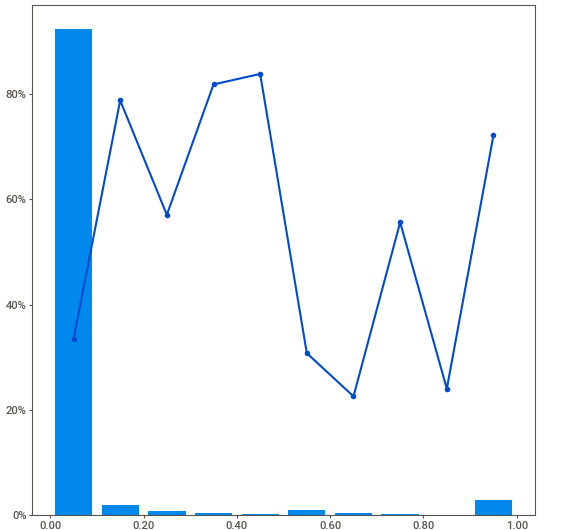
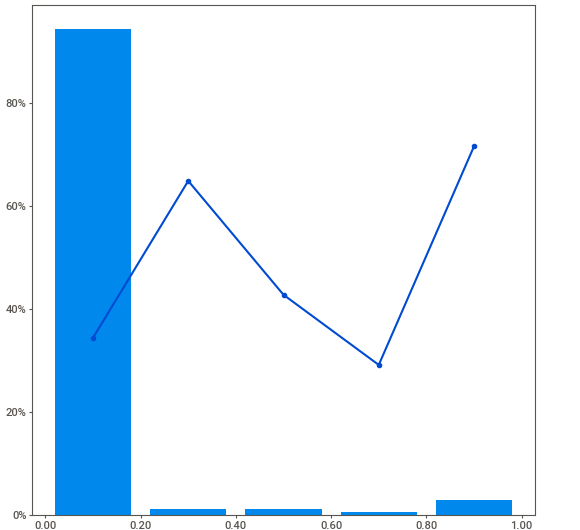
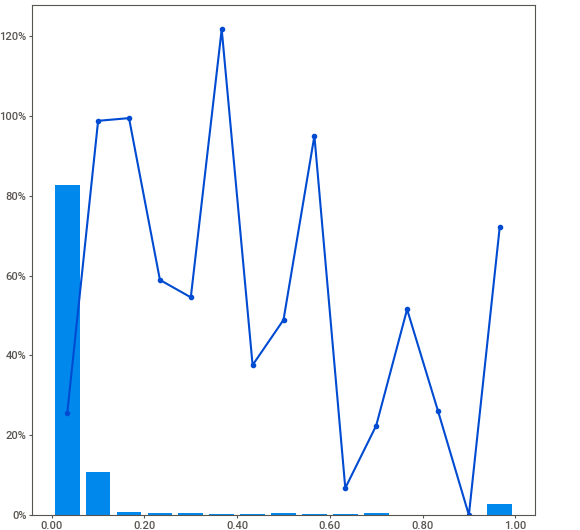
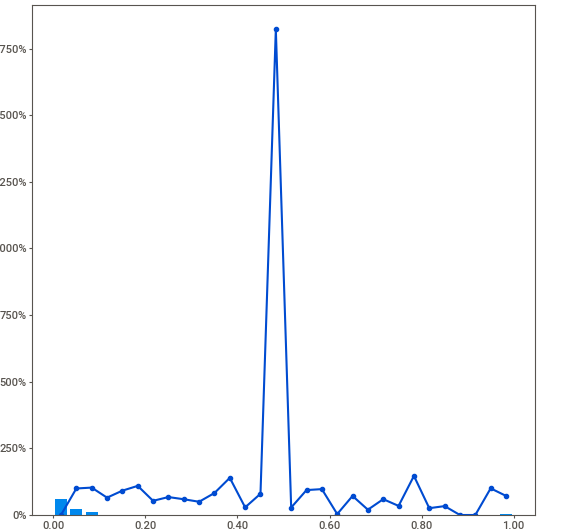
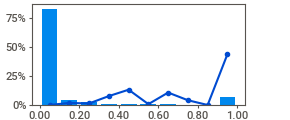
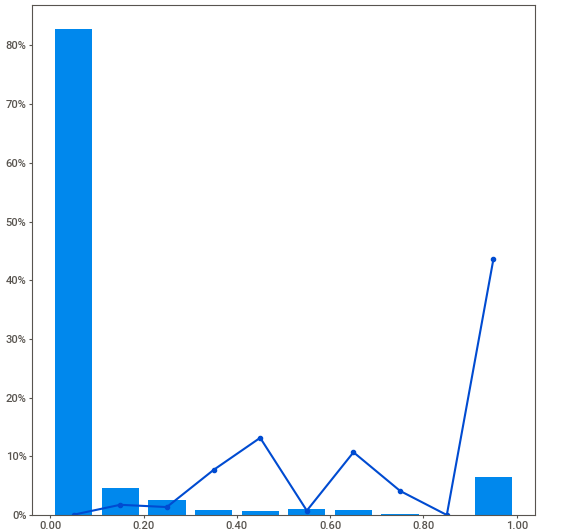
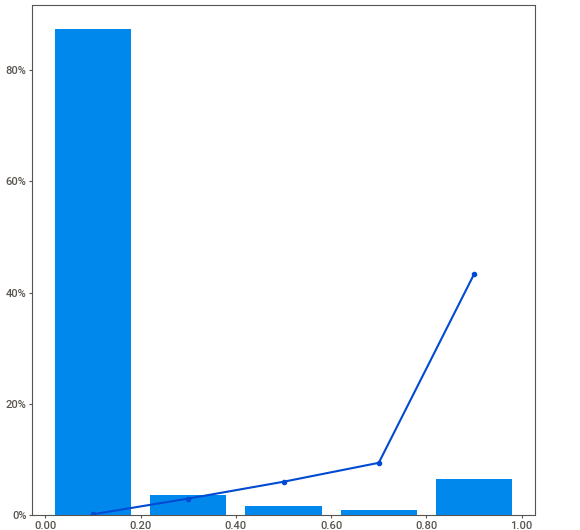
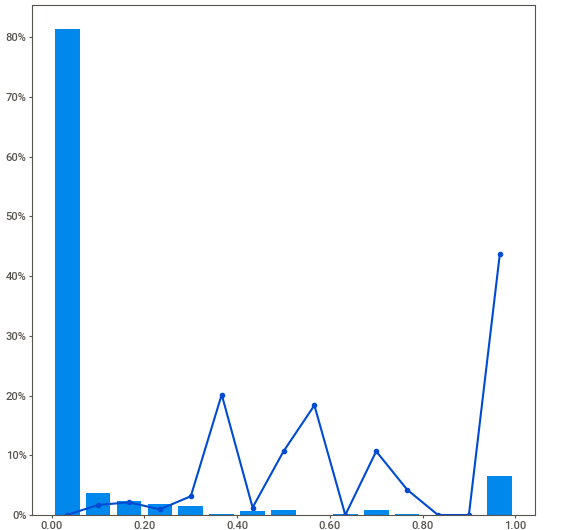
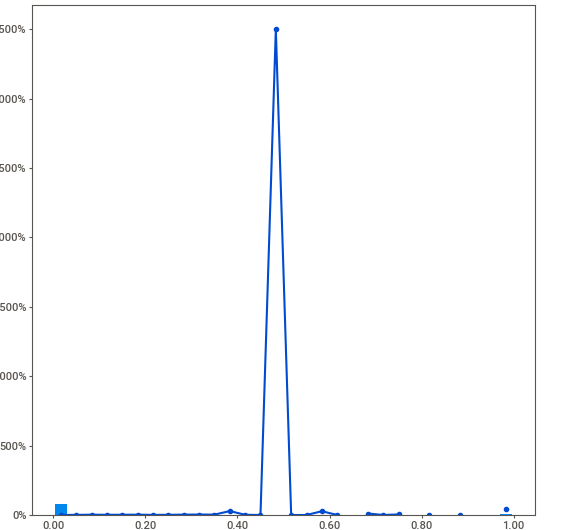
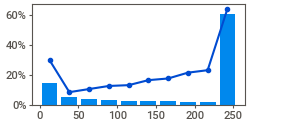
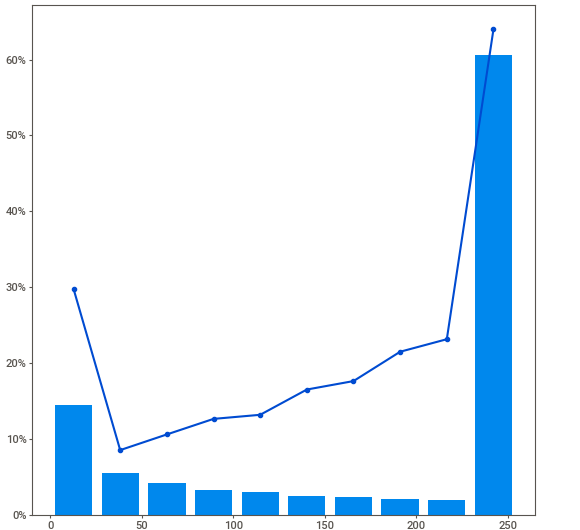
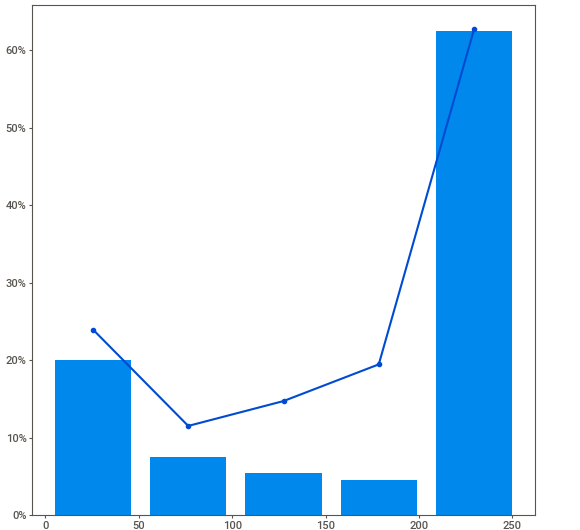
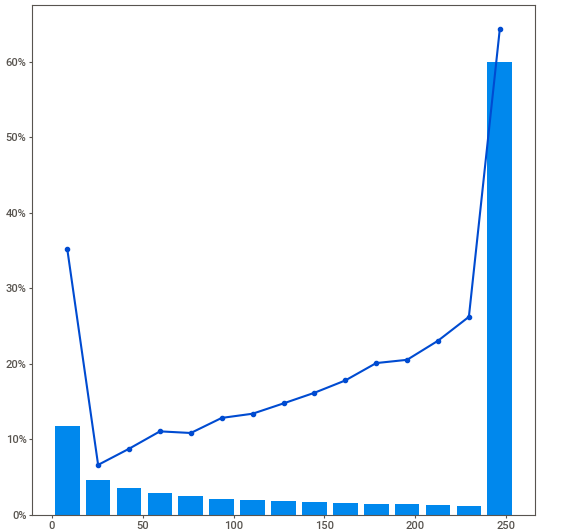
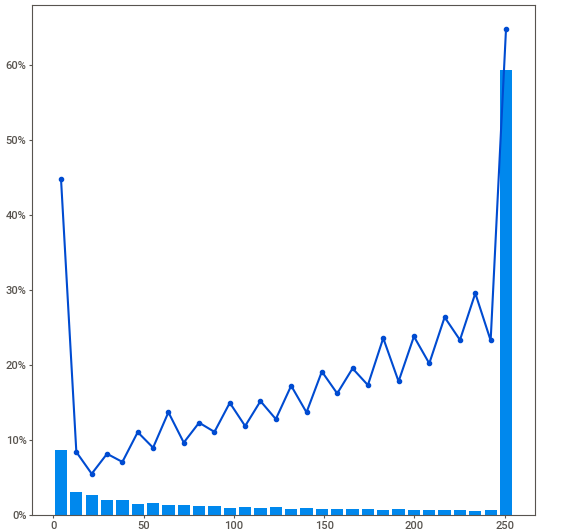
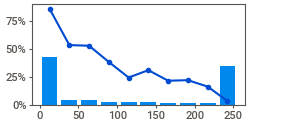
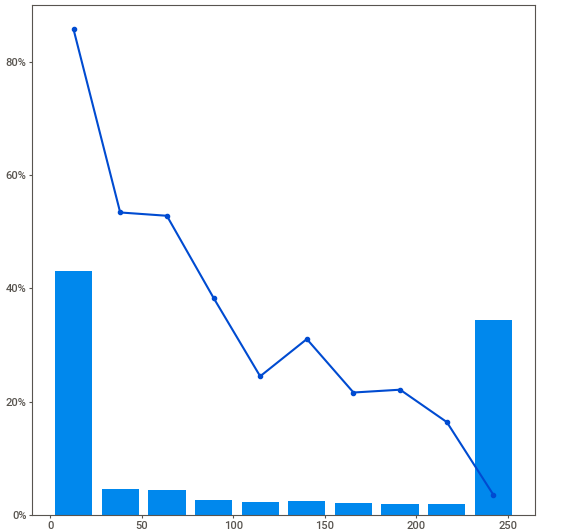
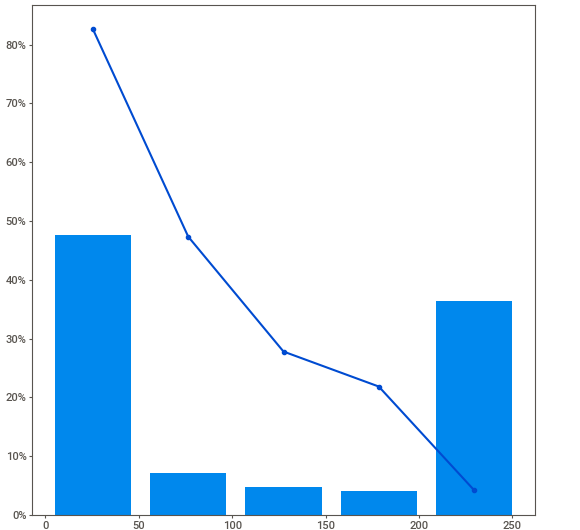
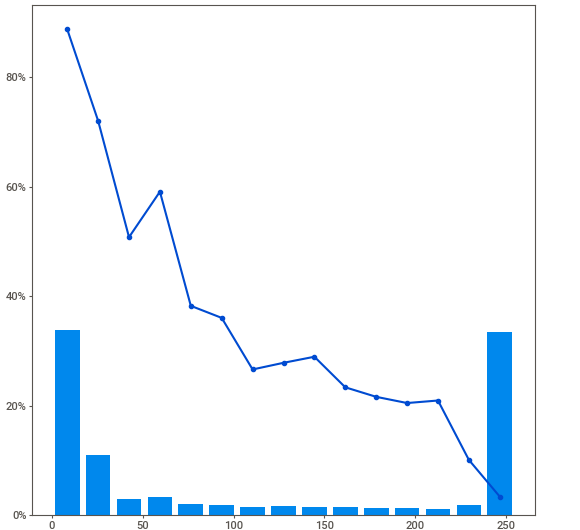
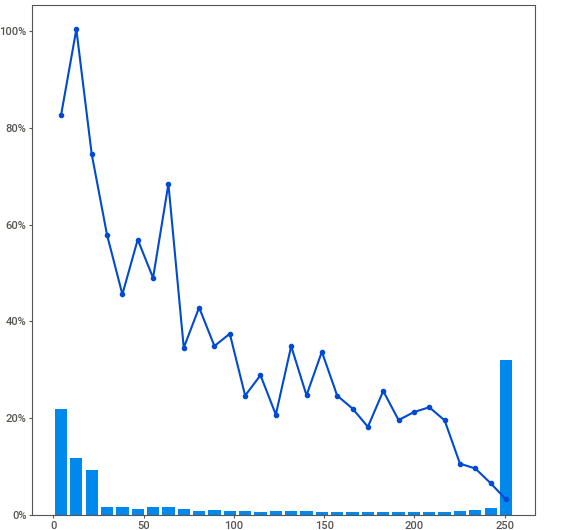
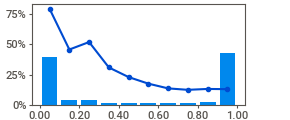
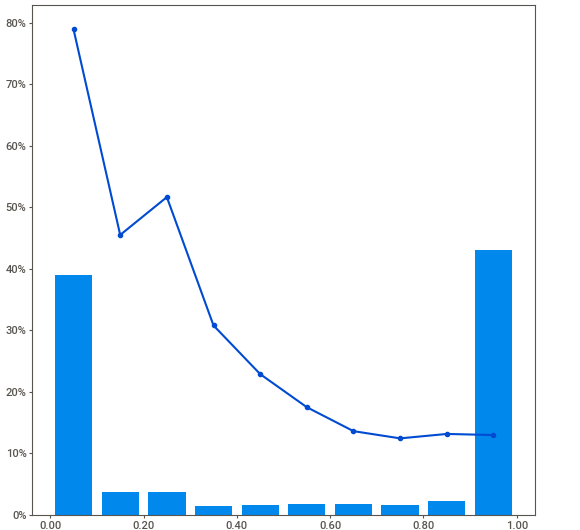
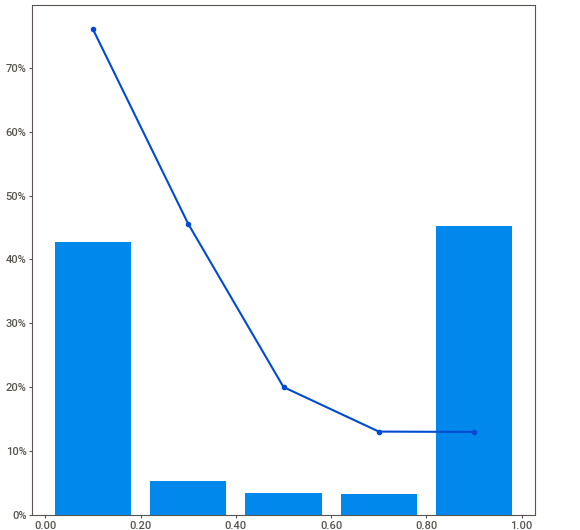
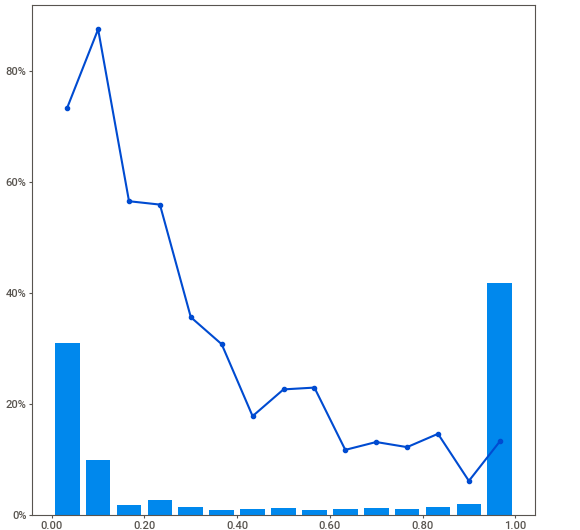
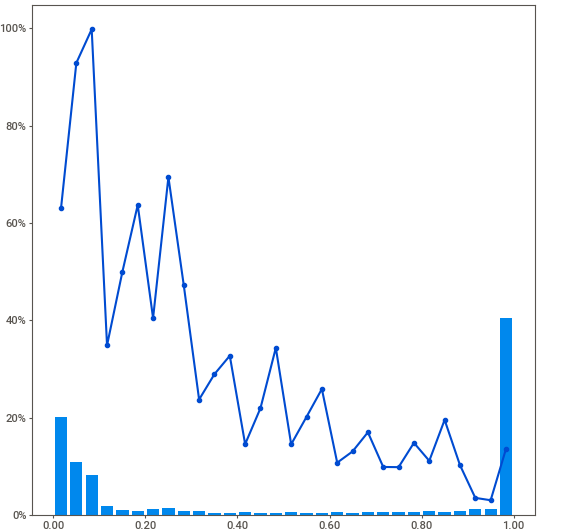
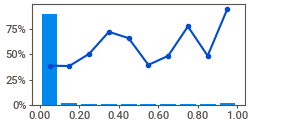
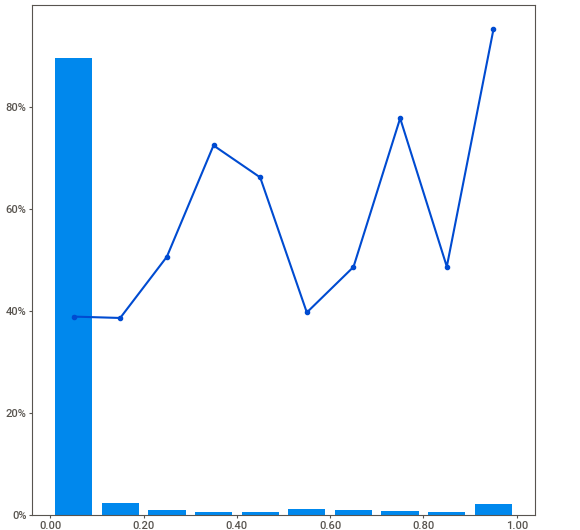
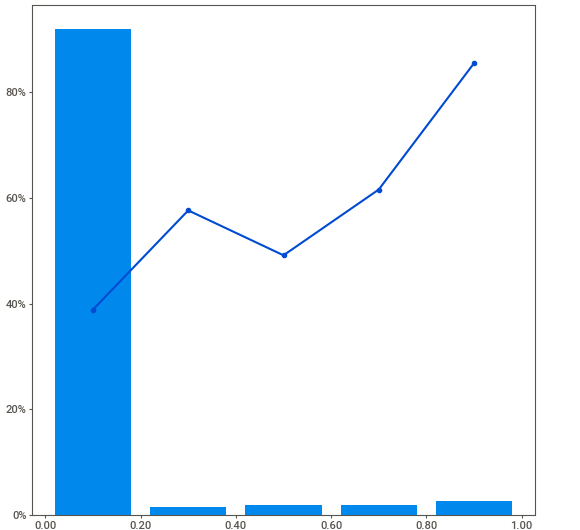
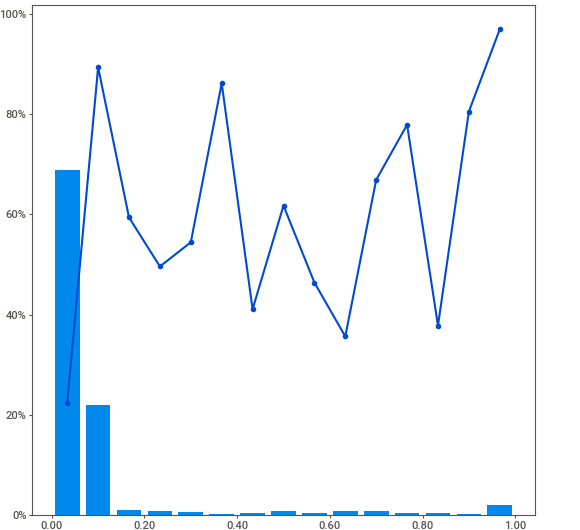
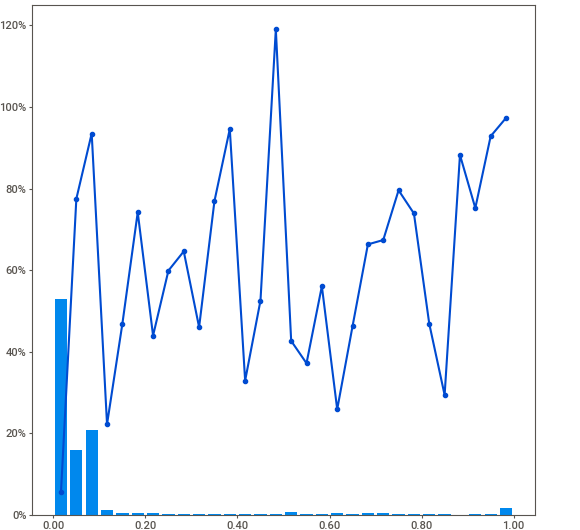
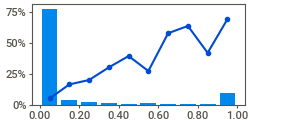
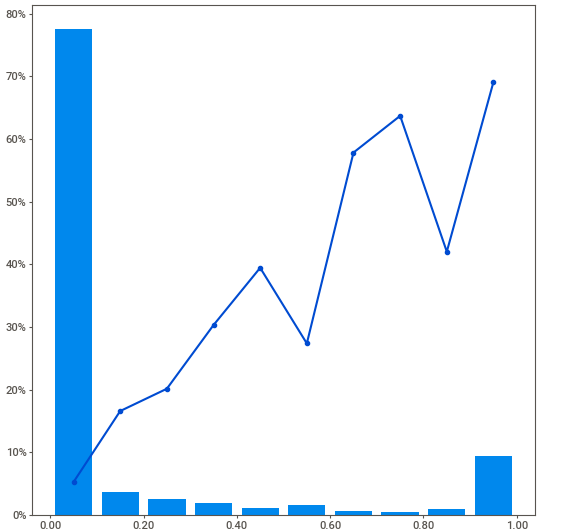
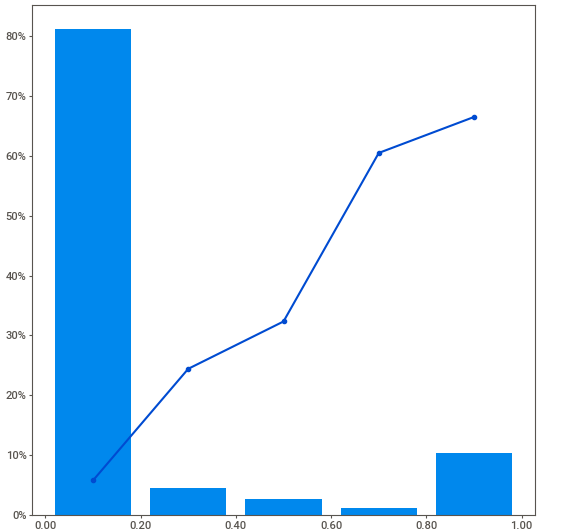
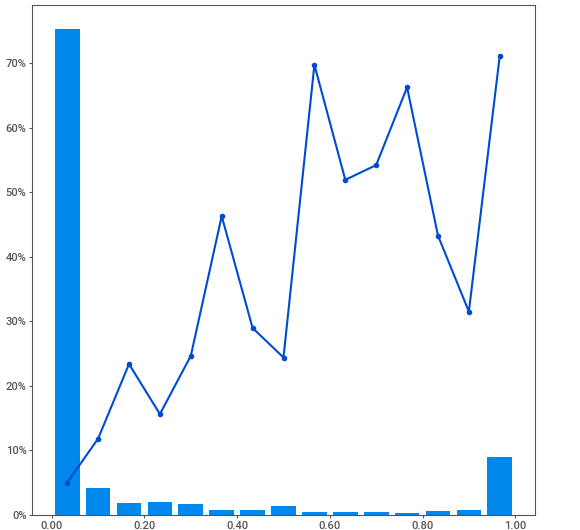
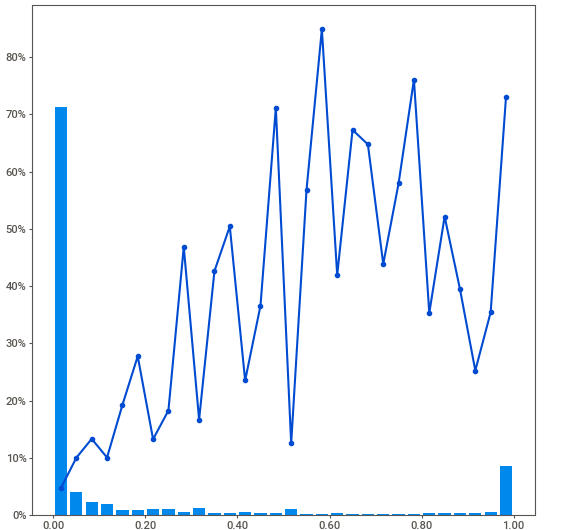
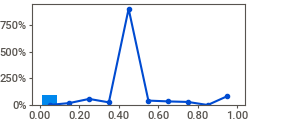
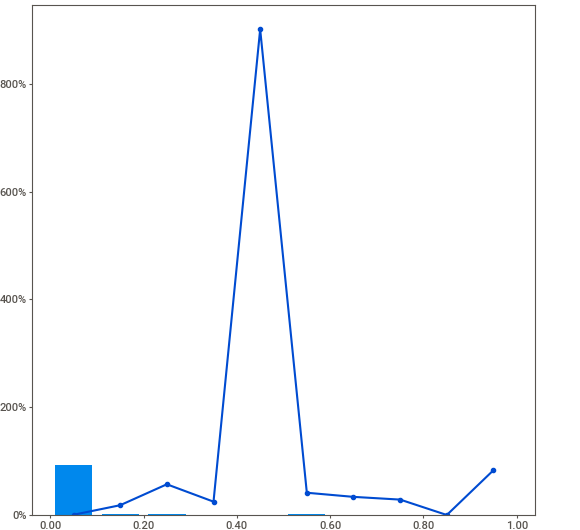
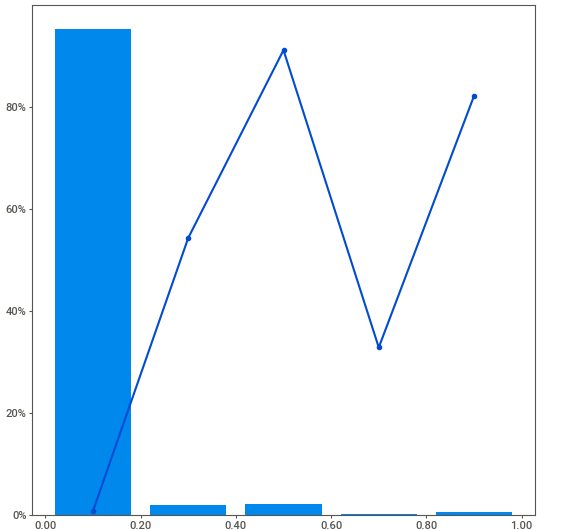
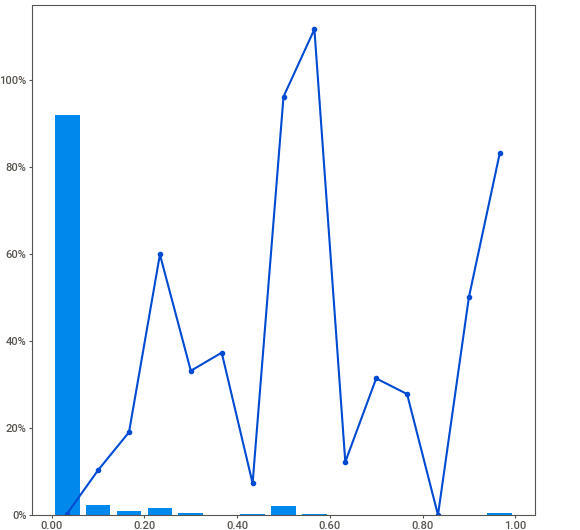
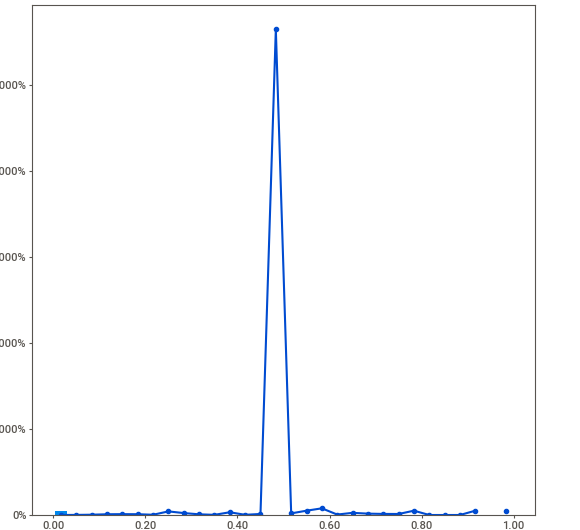
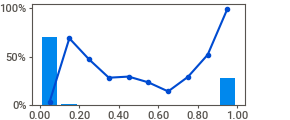
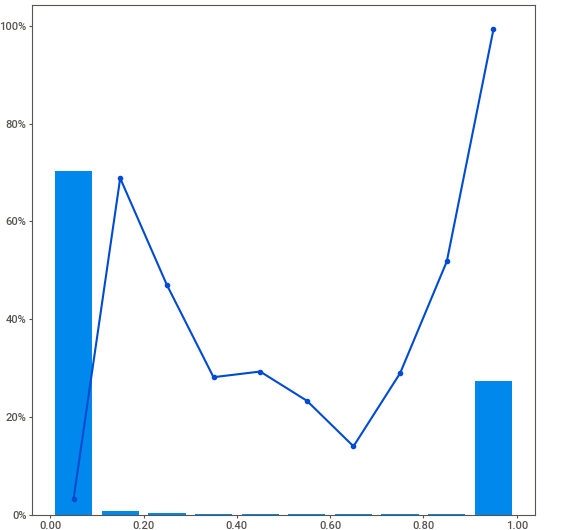
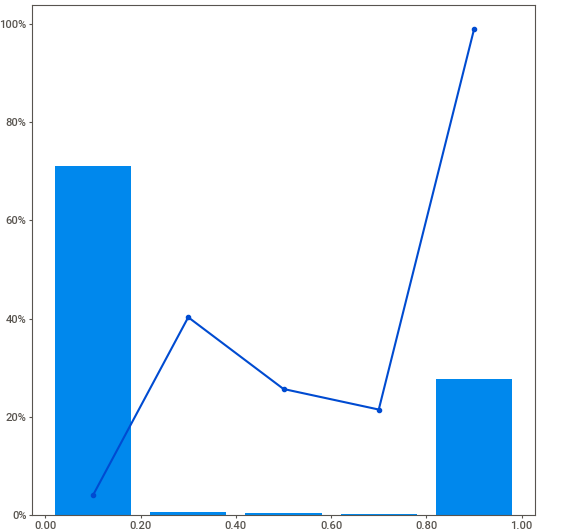
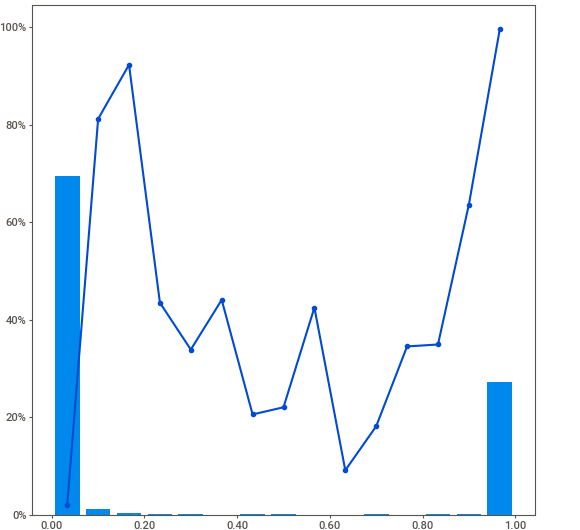
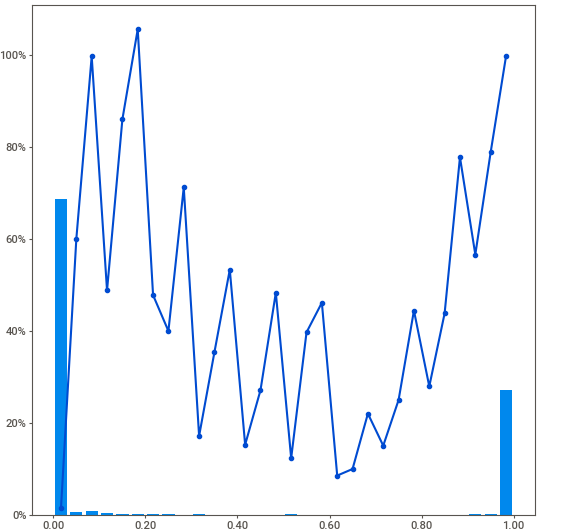
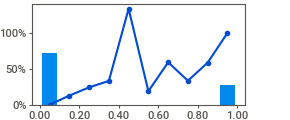
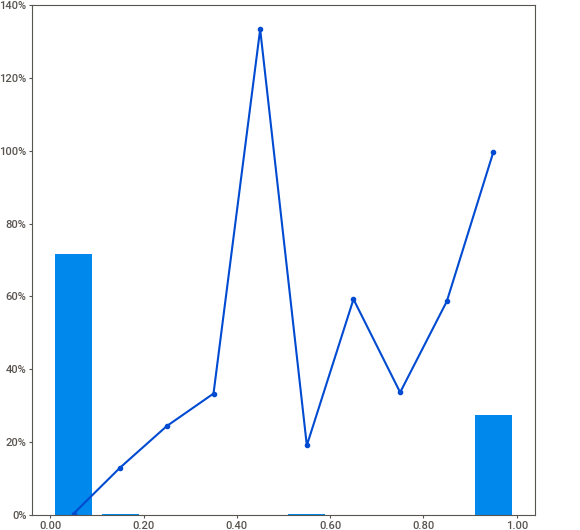
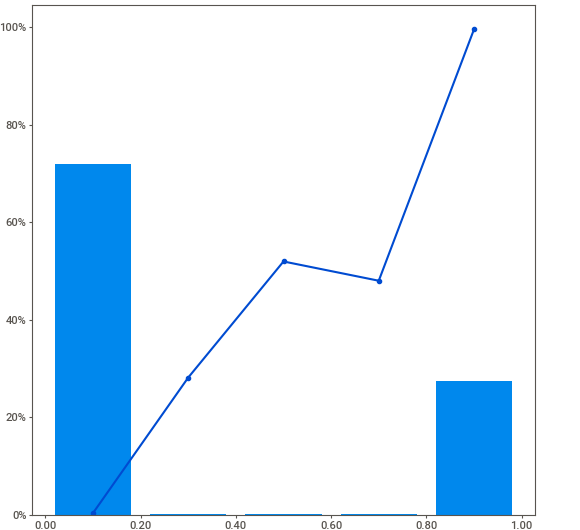
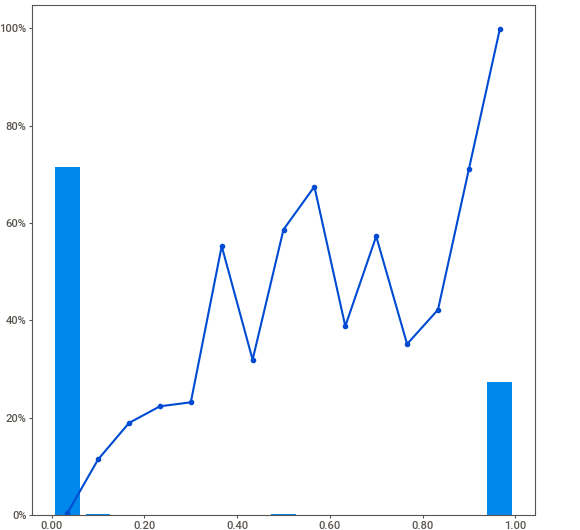
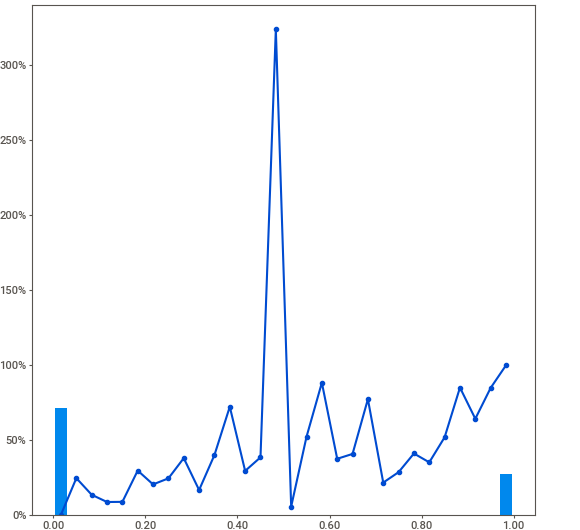
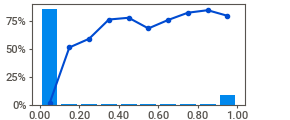
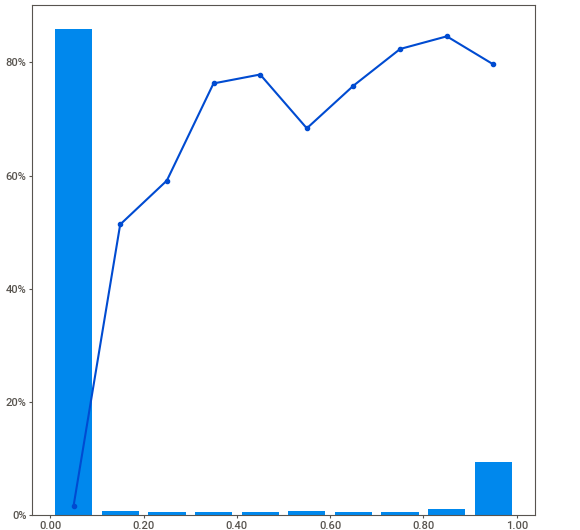
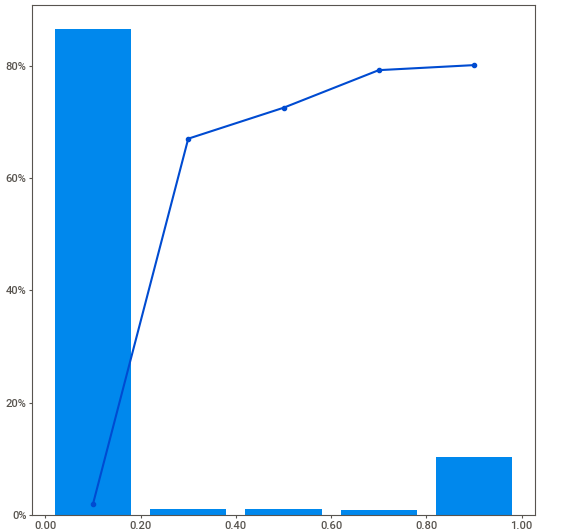
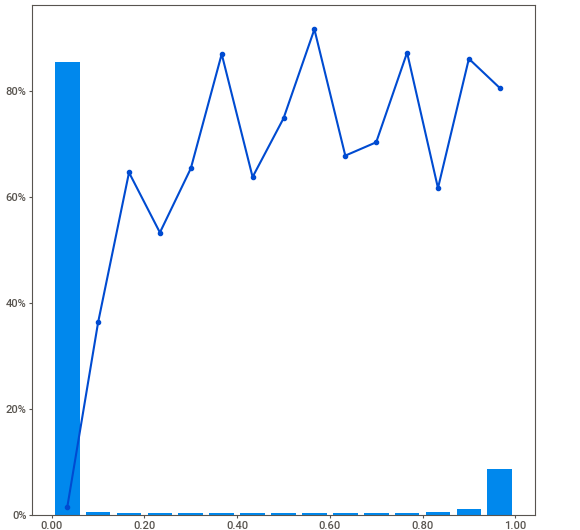
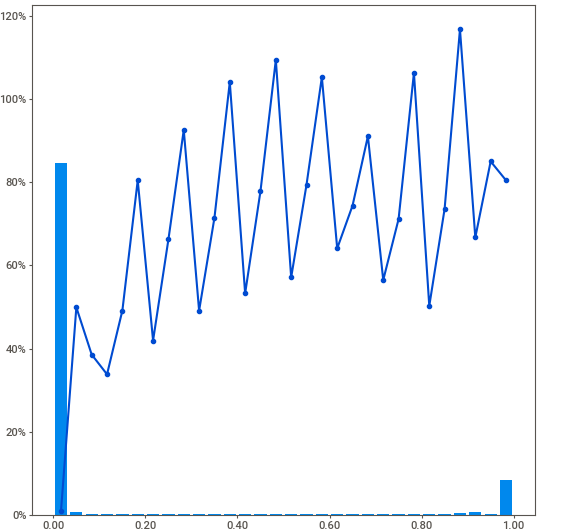
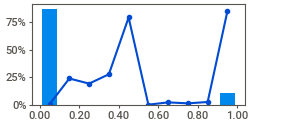
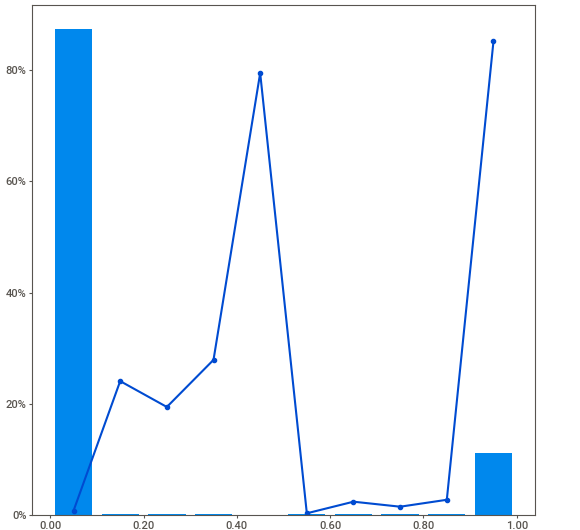
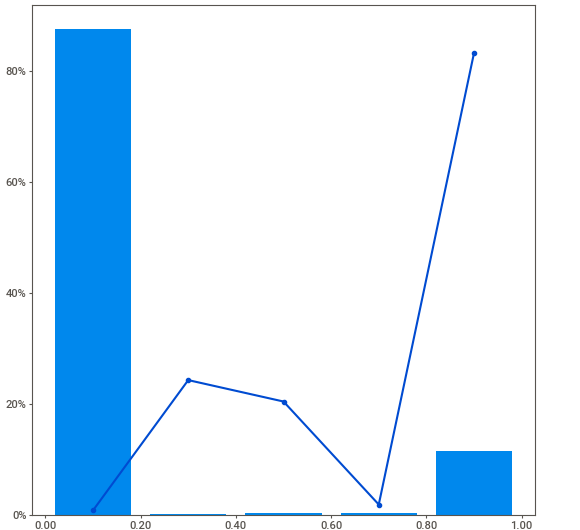
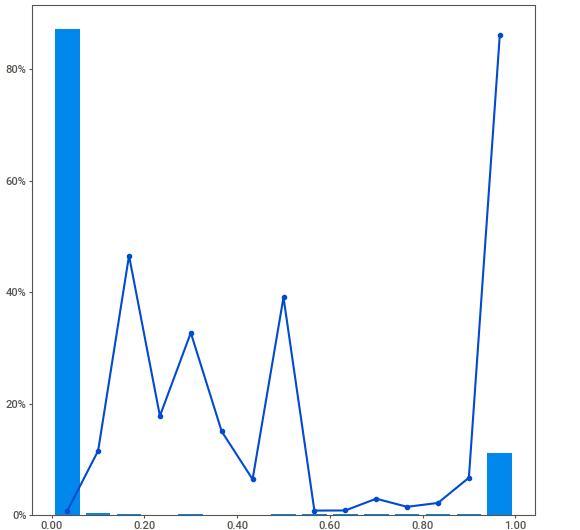
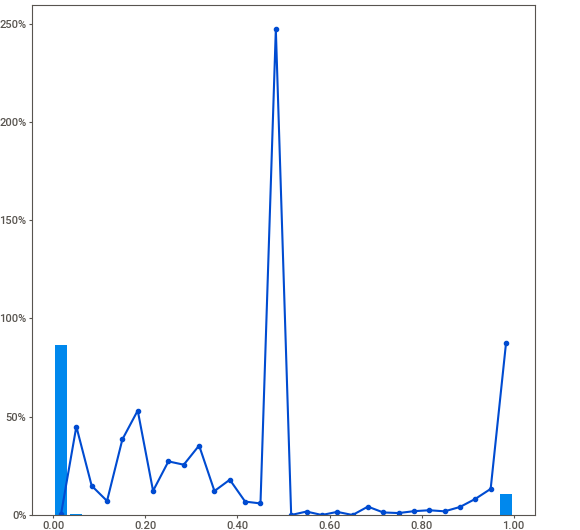
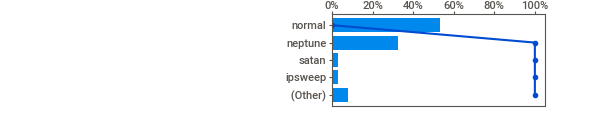
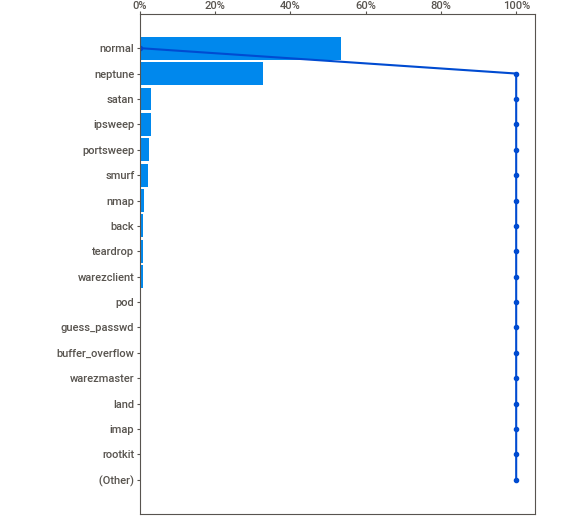
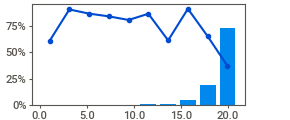
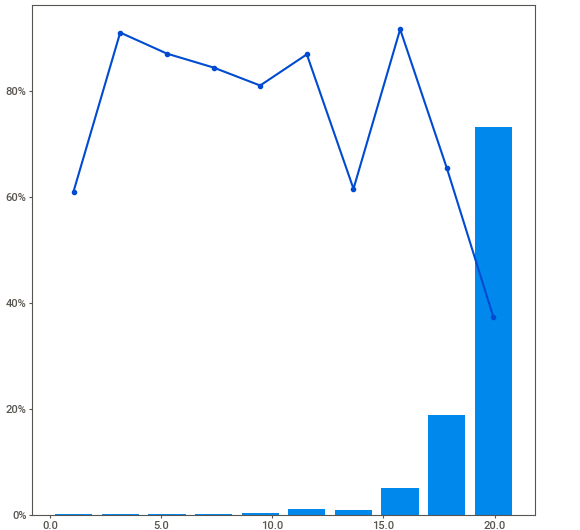
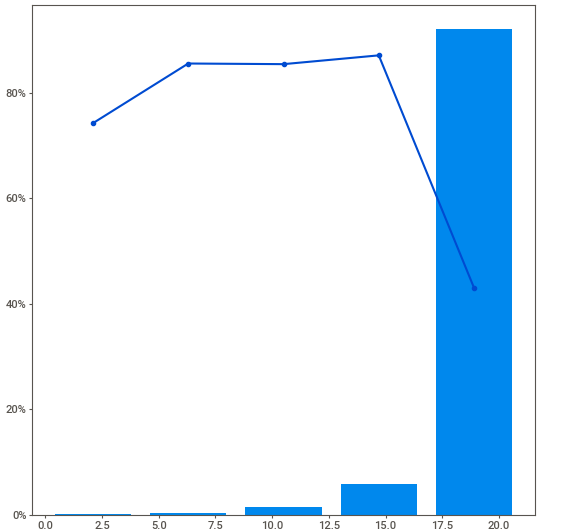
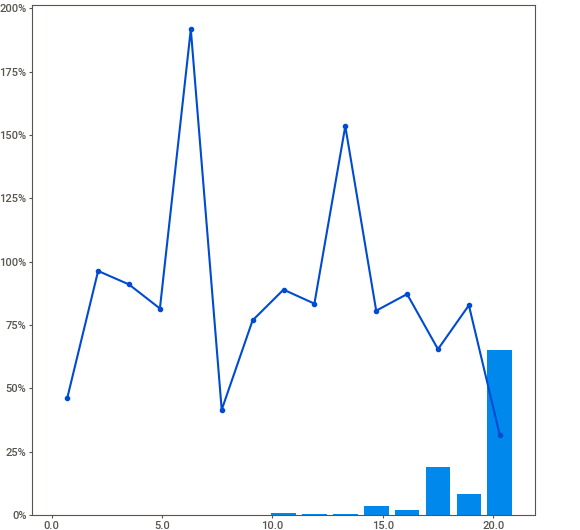
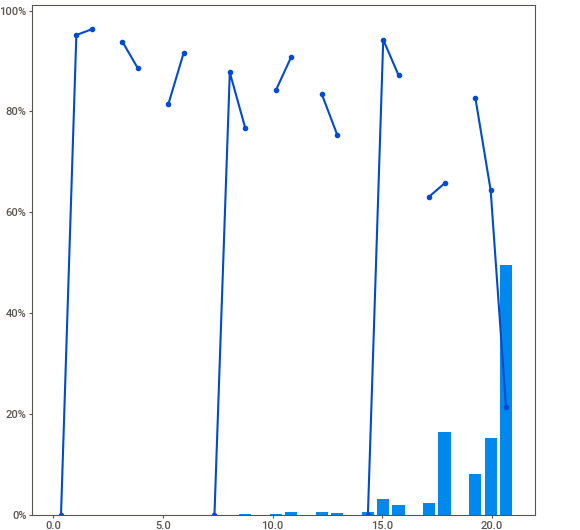
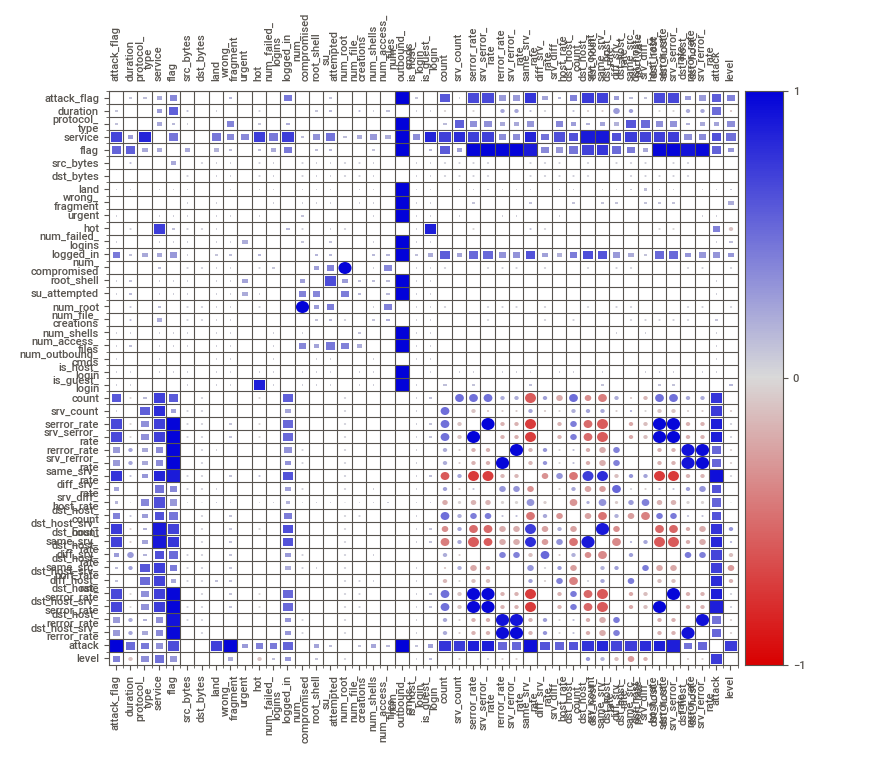
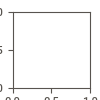

In [9]:
cor_ananlysis.show_notebook()

Como é possível ver, a tabela de correlações está bem mais adequada à coluna de 'attack_flag'

In [10]:
df_test_new = df_test[['same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_serror_rate','serror_rate','dst_host_diff_srv_rate','diff_srv_rate','srv_diff_host_rate','service','flag','logged_in','srv_serror_rate','count','level','dst_host_count','srv_rerror_rate','dst_host_srv_rerror_rate','rerror_rate','dst_host_rerror_rate','attack_flag']]
df_train_new = df_train[['same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_serror_rate','serror_rate','dst_host_diff_srv_rate','diff_srv_rate','srv_diff_host_rate','service','flag','logged_in','srv_serror_rate','count','level','dst_host_count','srv_rerror_rate','dst_host_srv_rerror_rate','rerror_rate','dst_host_rerror_rate','attack_flag']]

In [11]:
cor_ananlysis2 = sv.analyze(df_train_new,target_feat='attack_flag')

                                             |          | [  0%]   00:00 -> (? left)


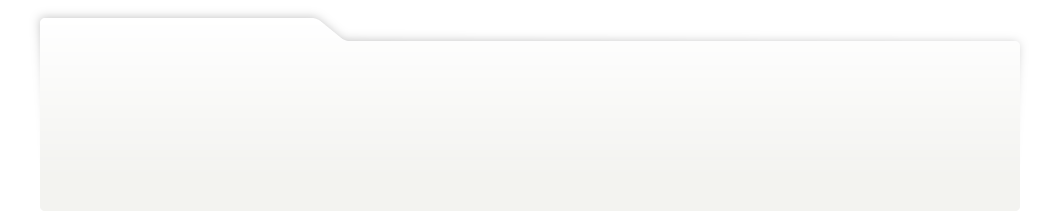
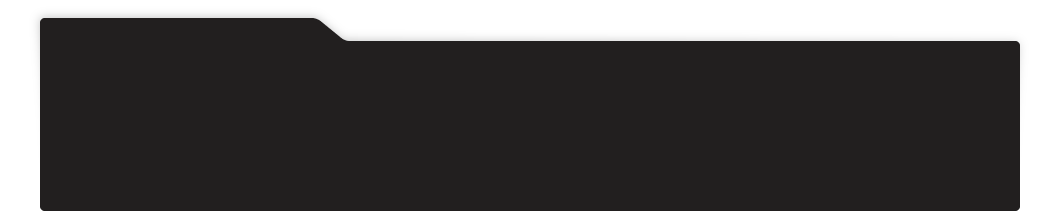
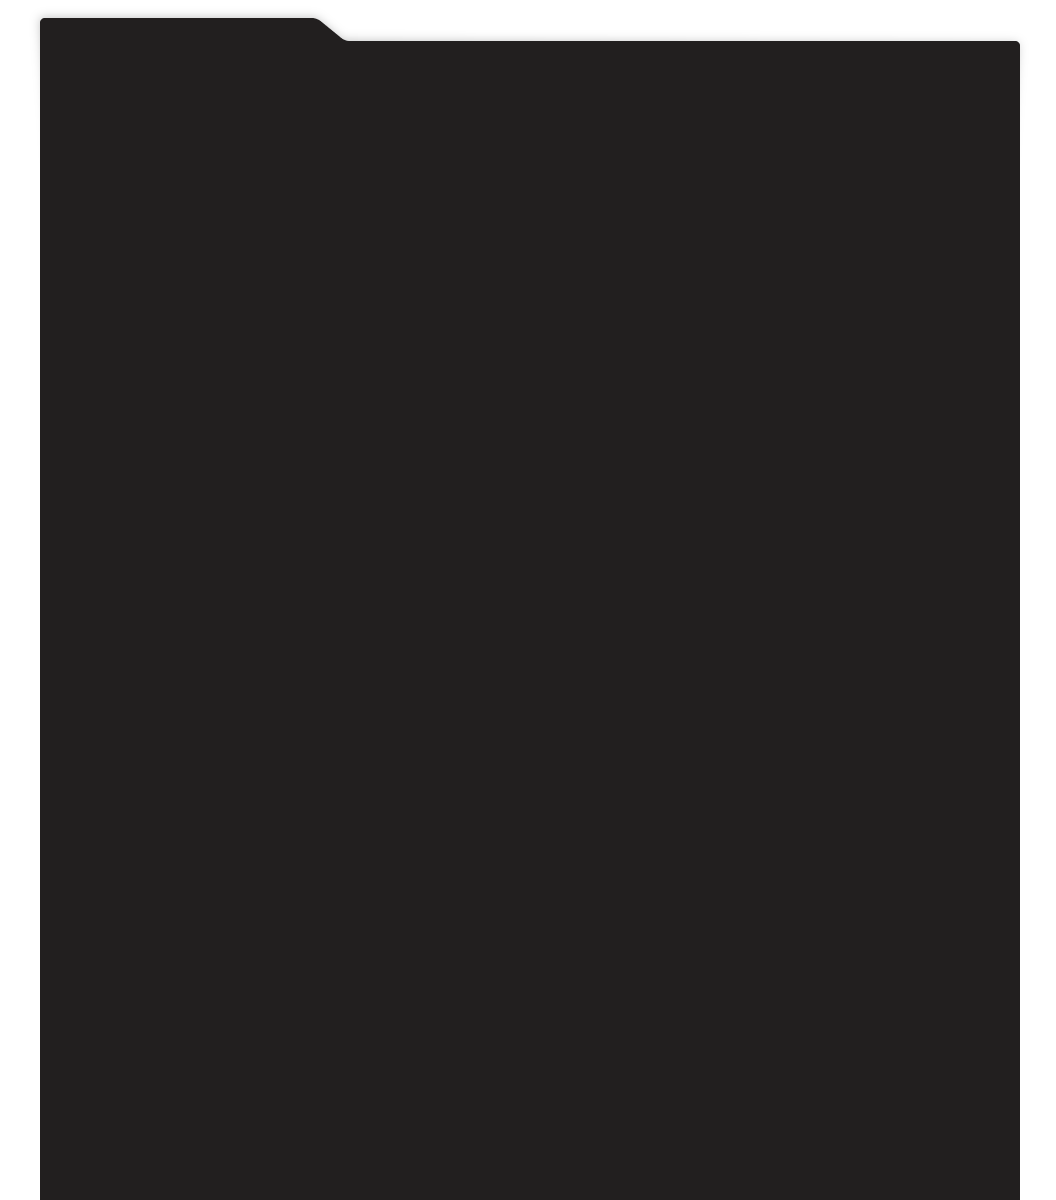
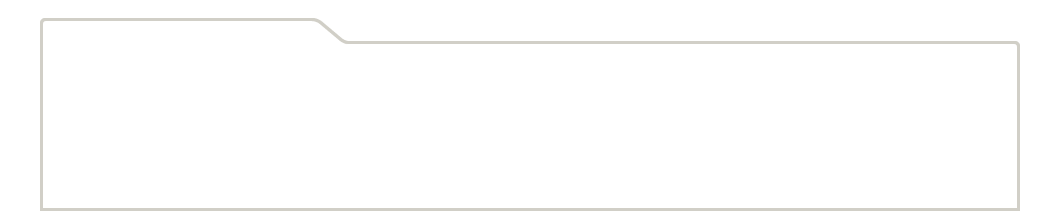
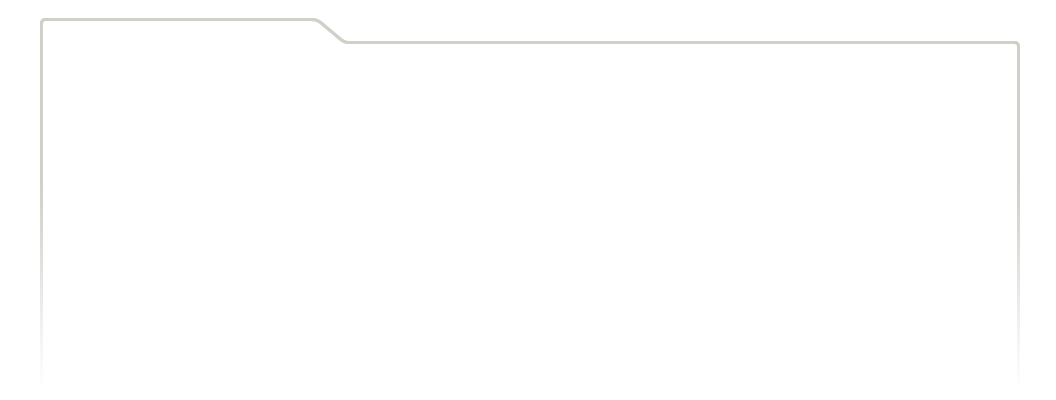
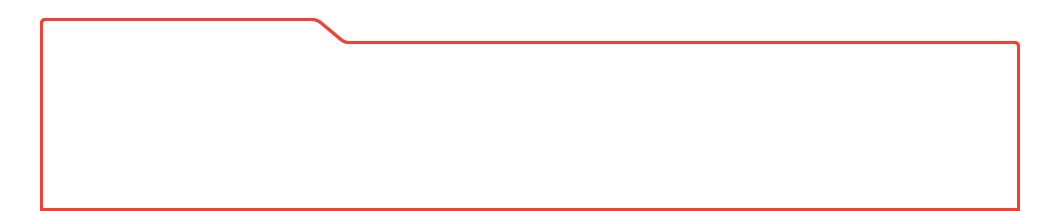
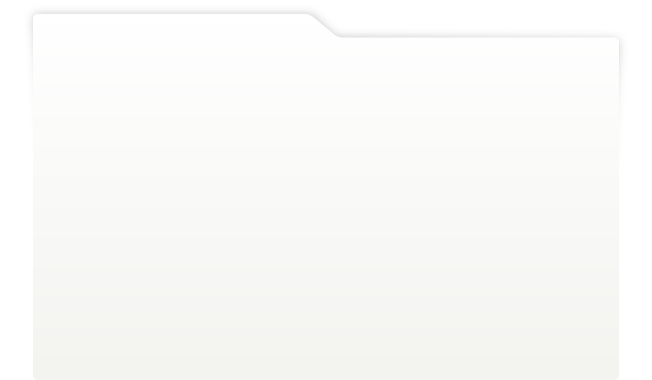
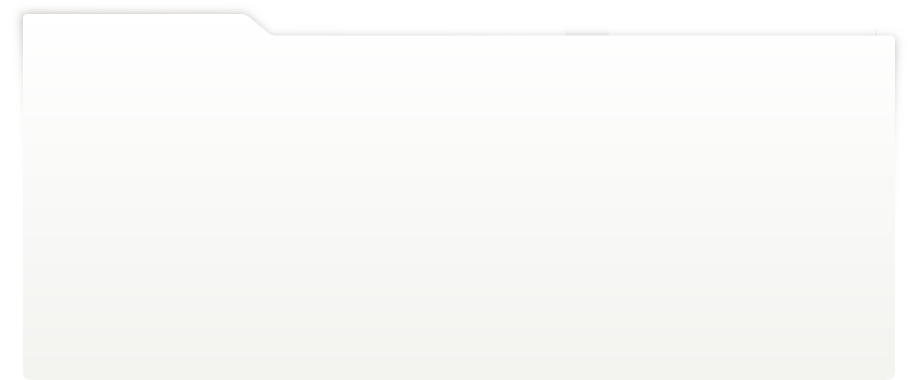
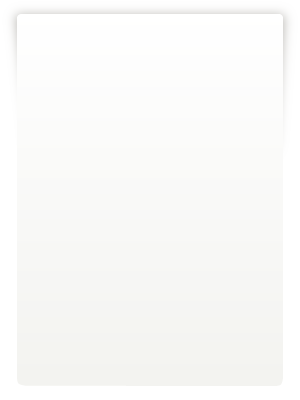
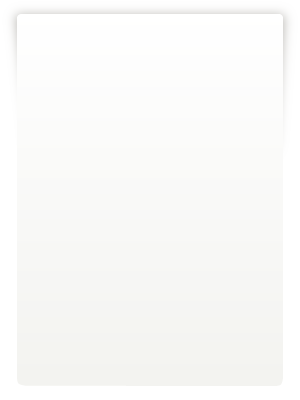
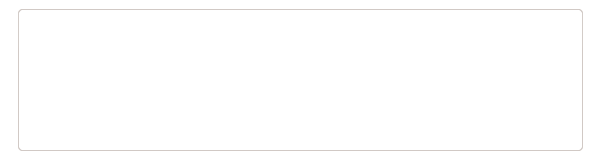
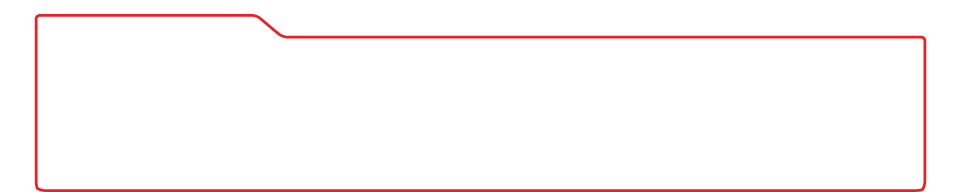
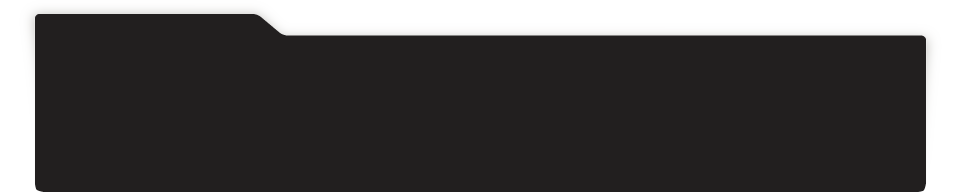
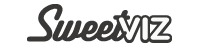
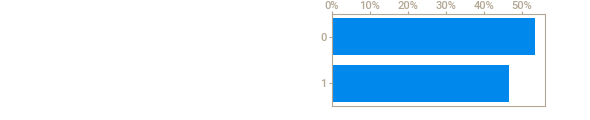
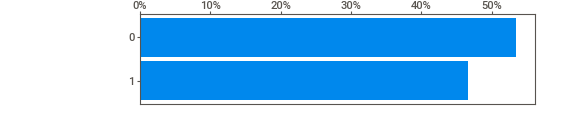
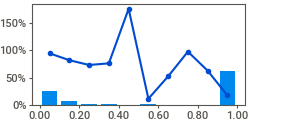
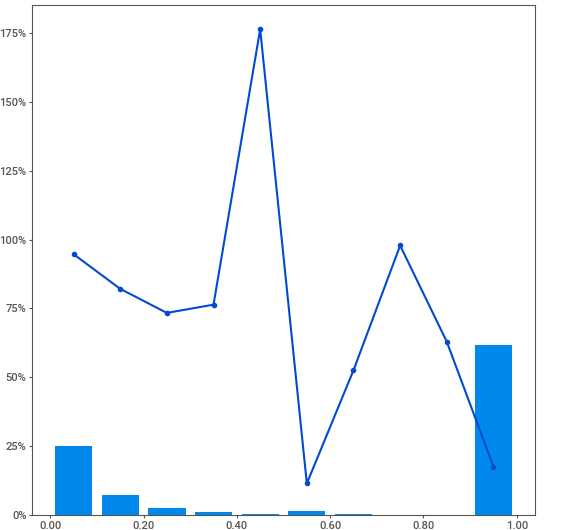
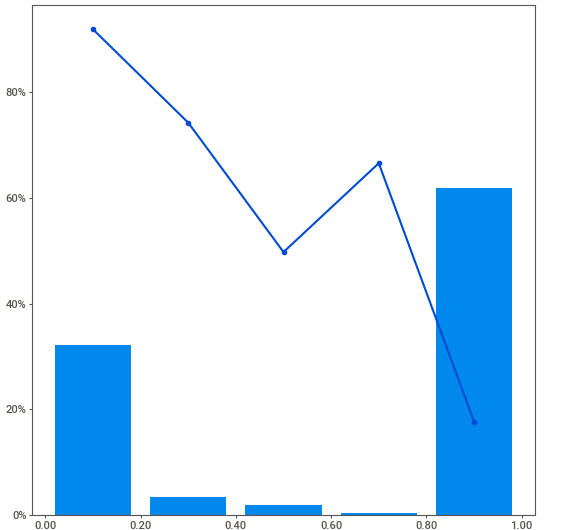
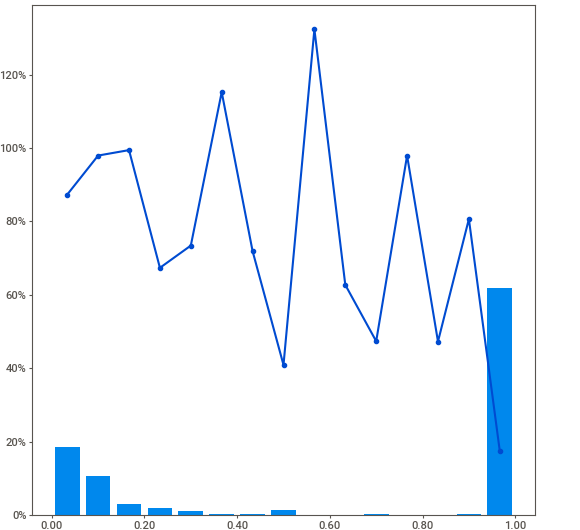
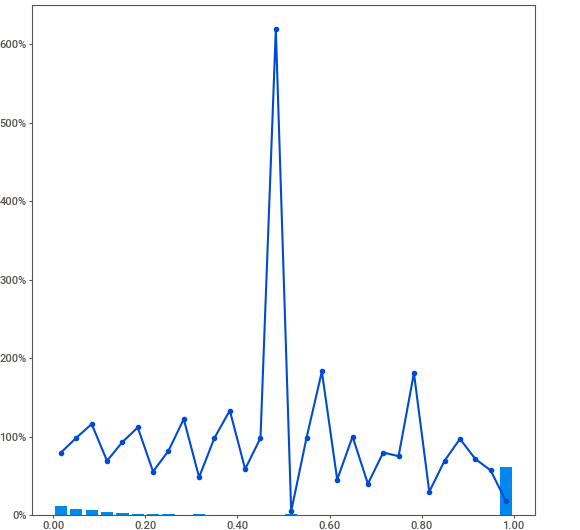
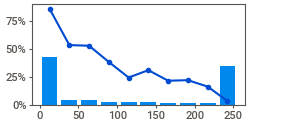
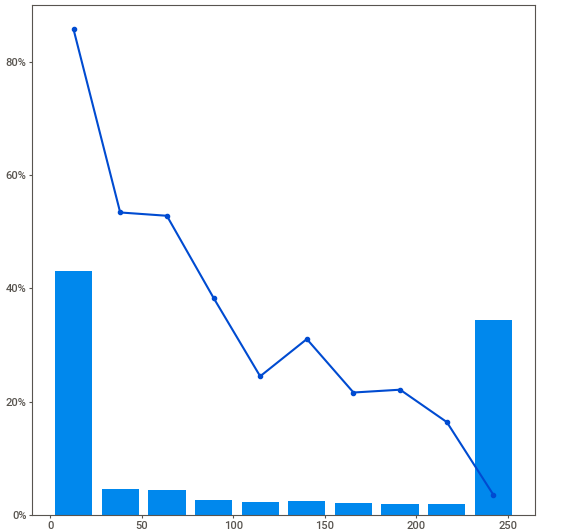
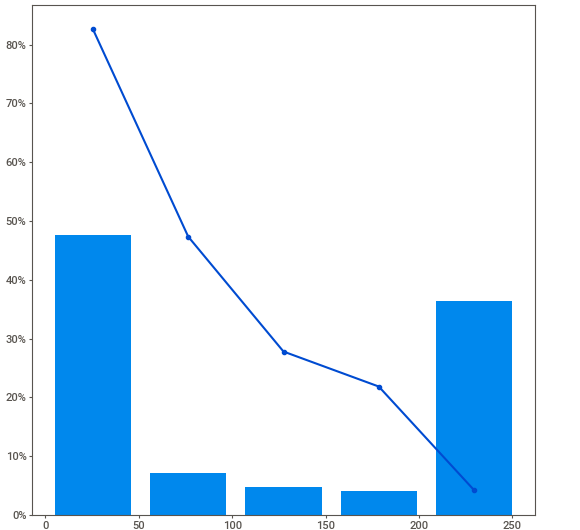
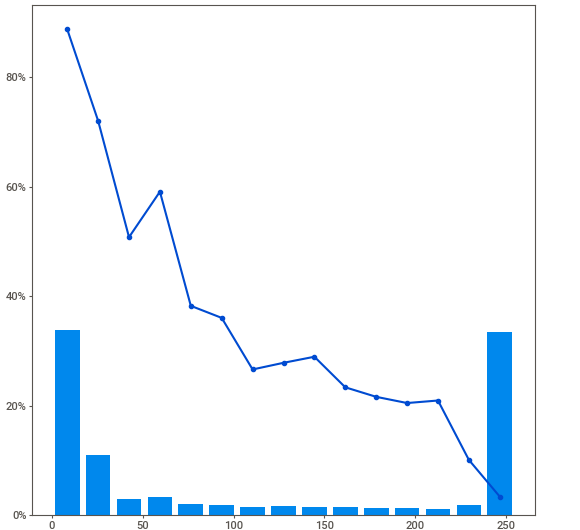
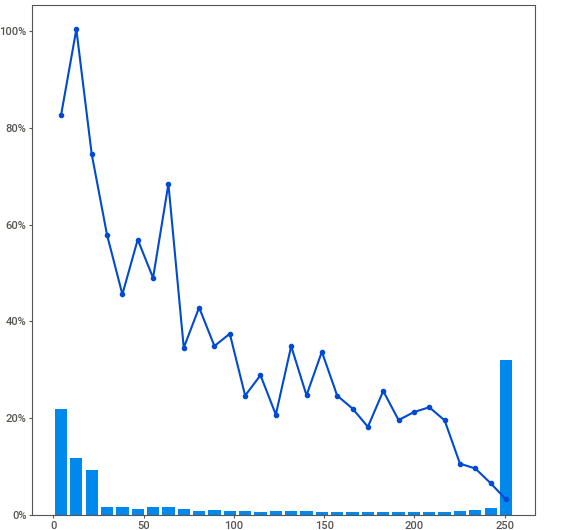
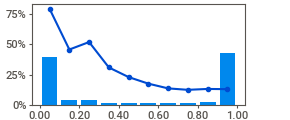
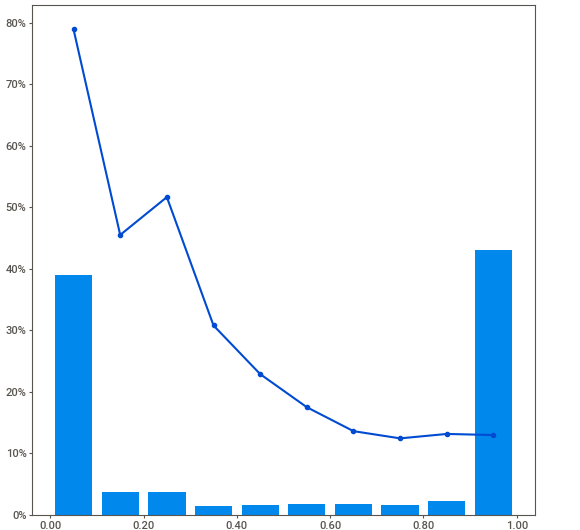
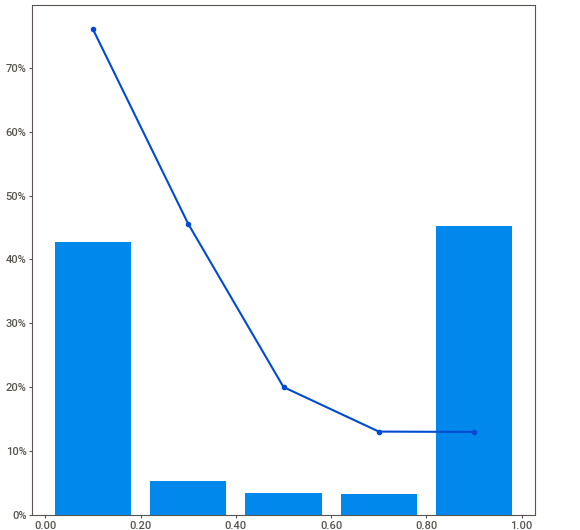
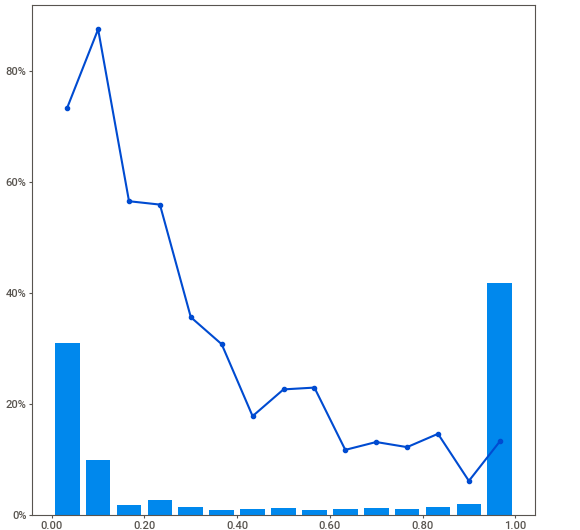
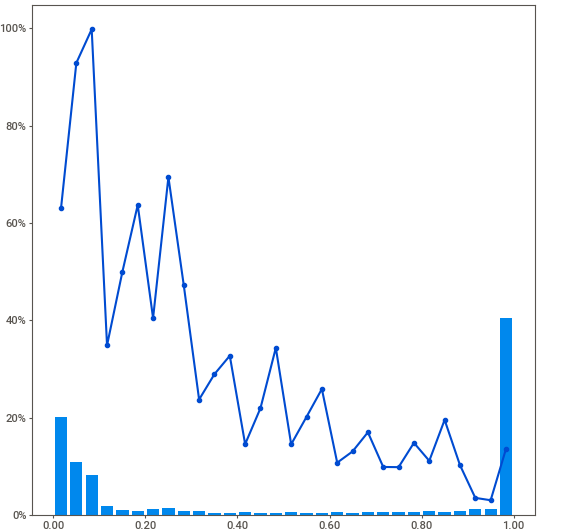
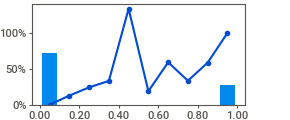
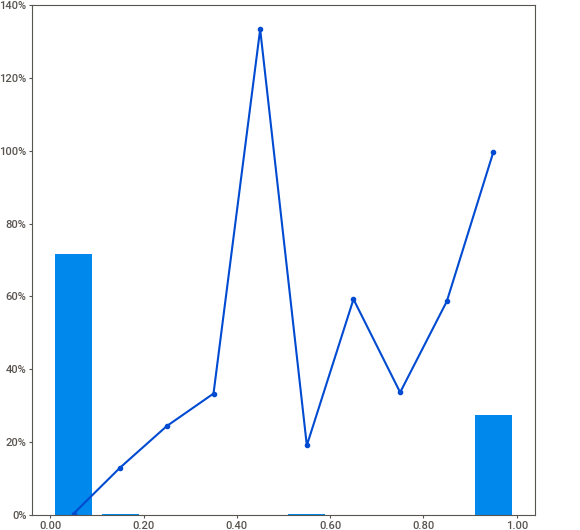
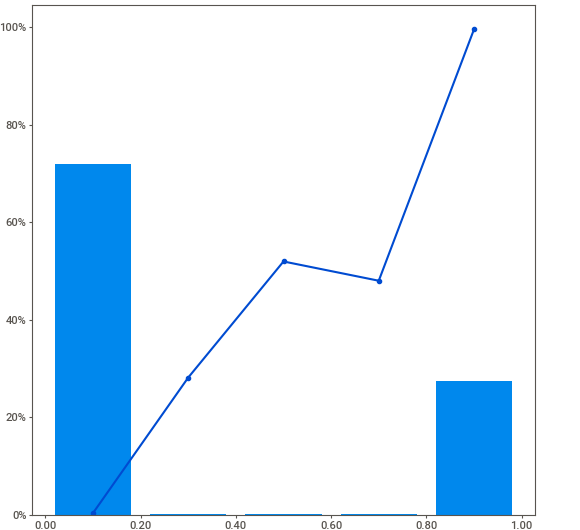
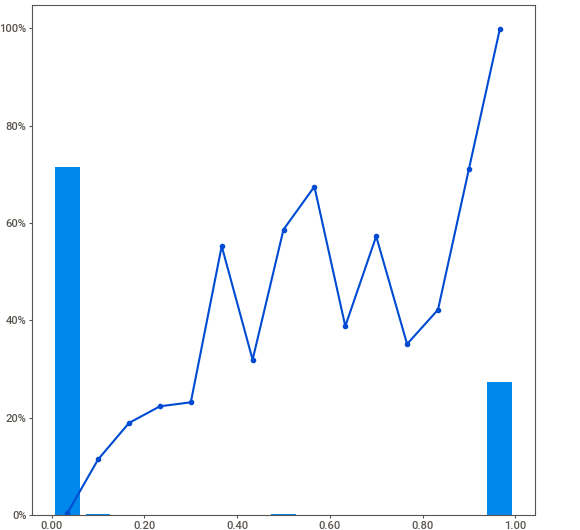
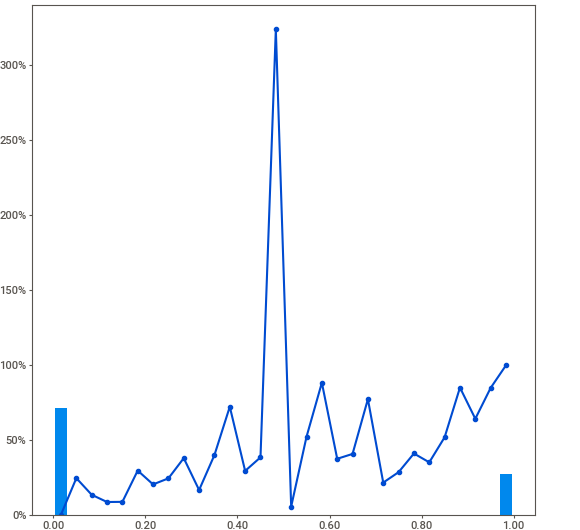
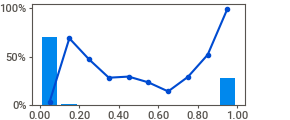
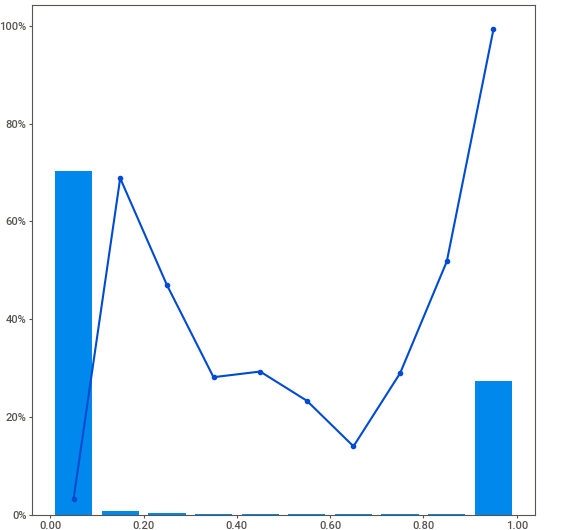
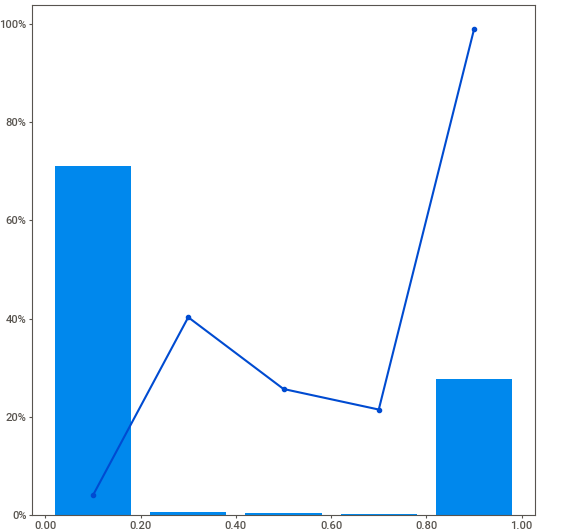
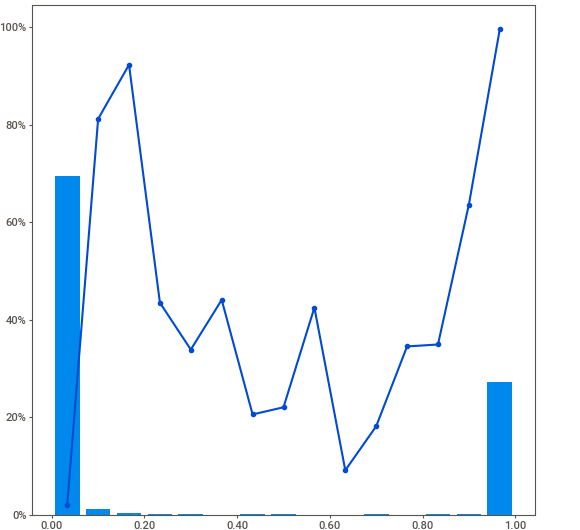
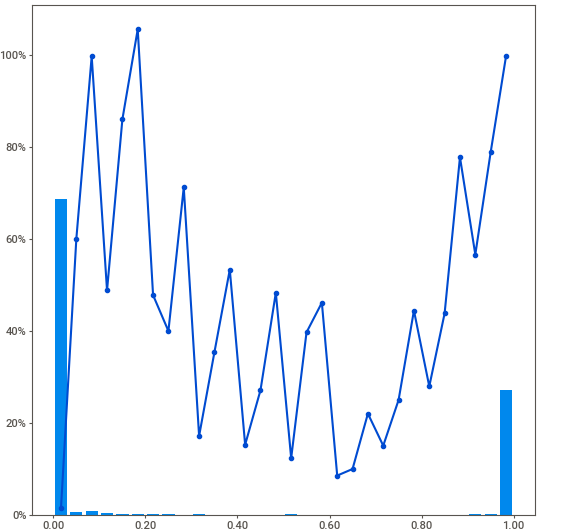
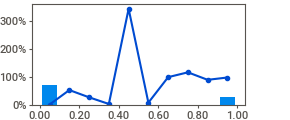
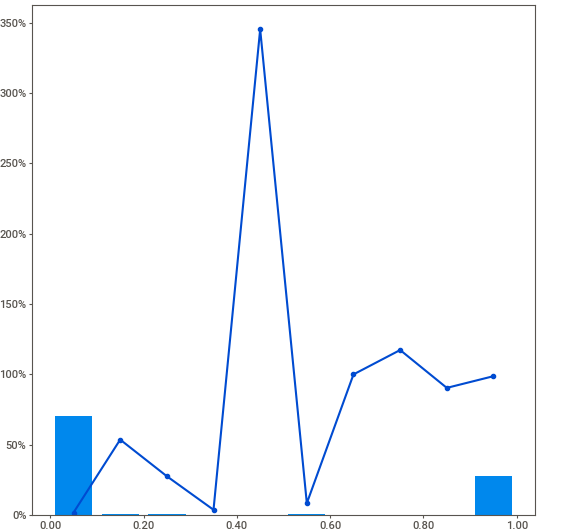
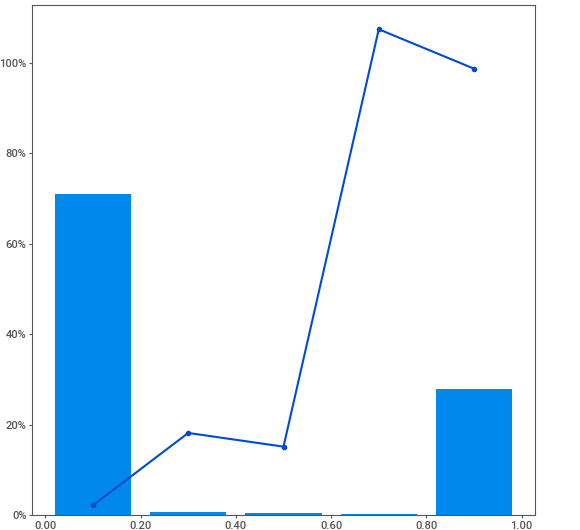
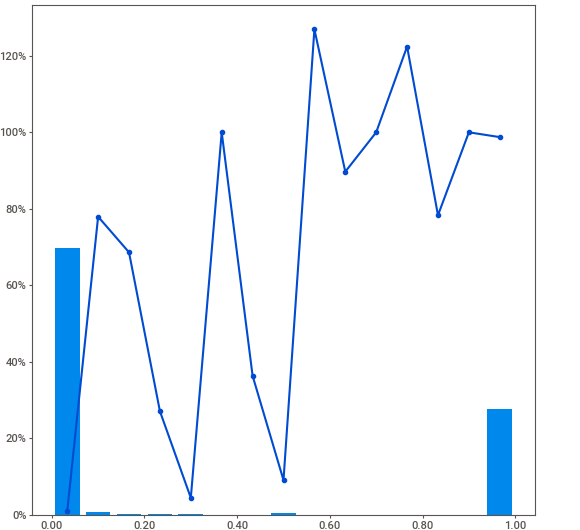
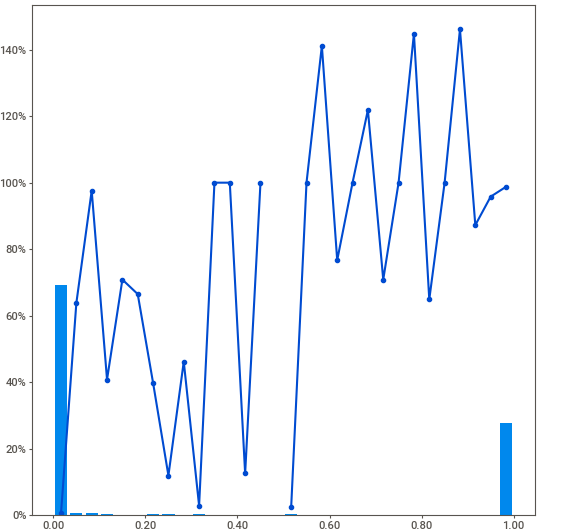
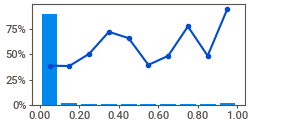
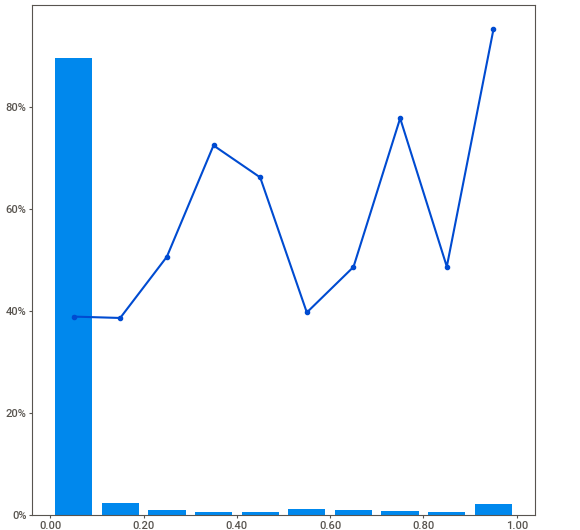
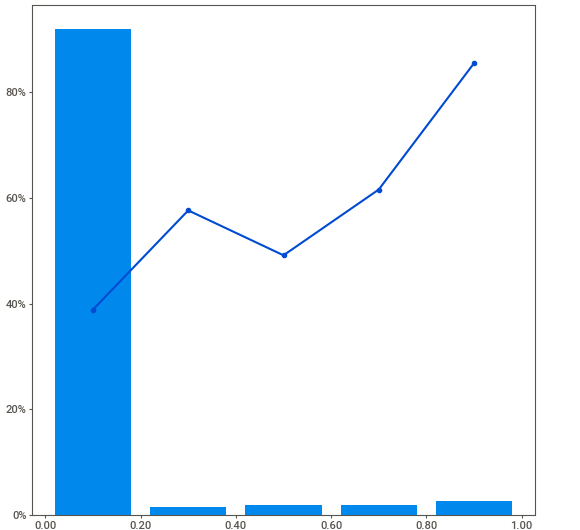
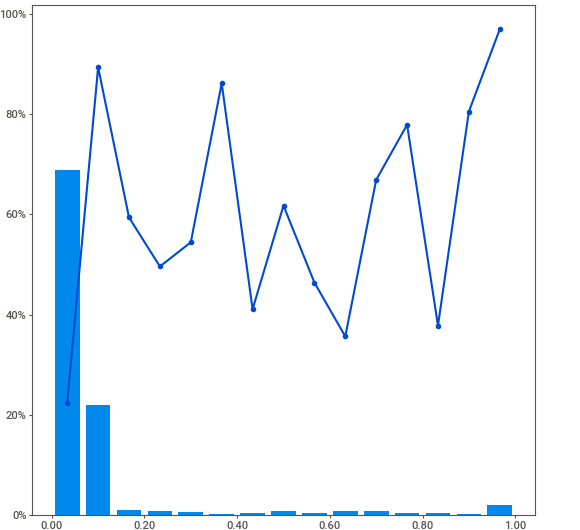
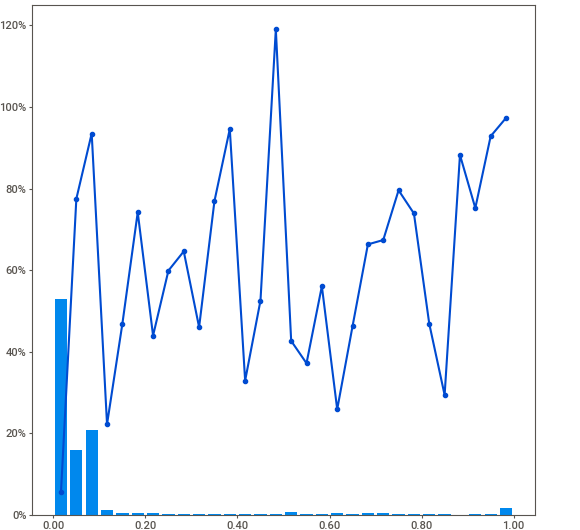
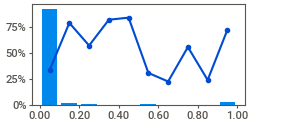
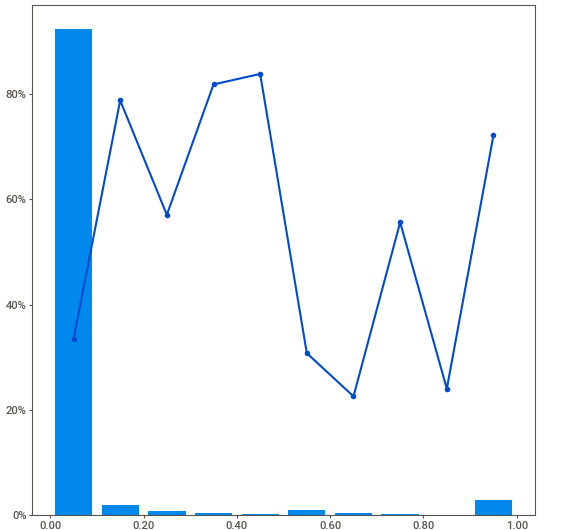
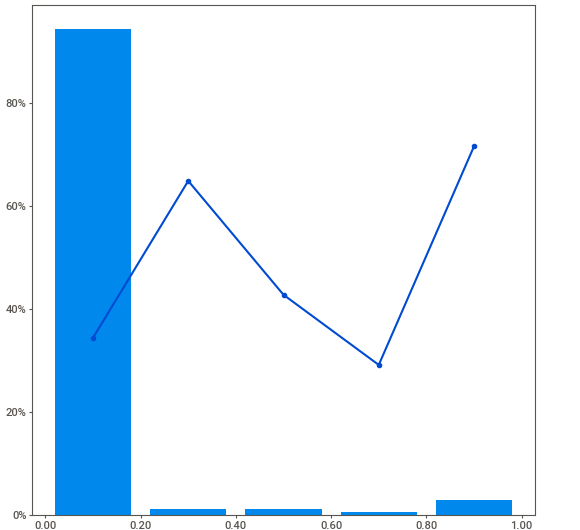
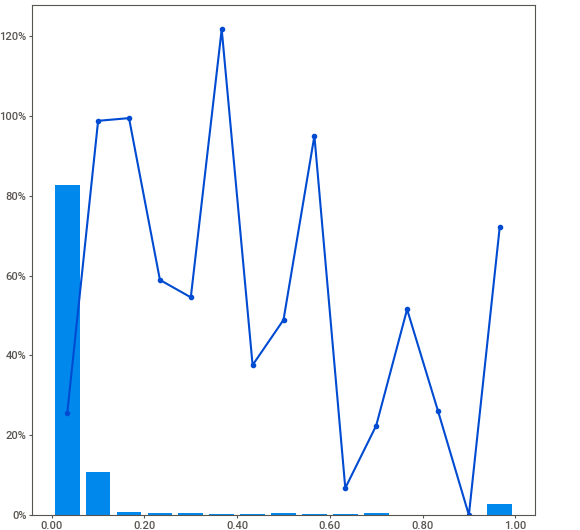
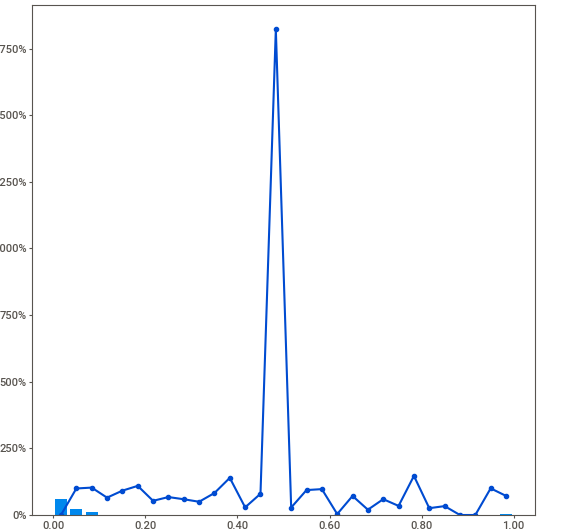
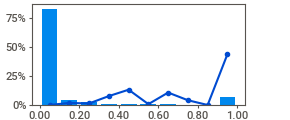
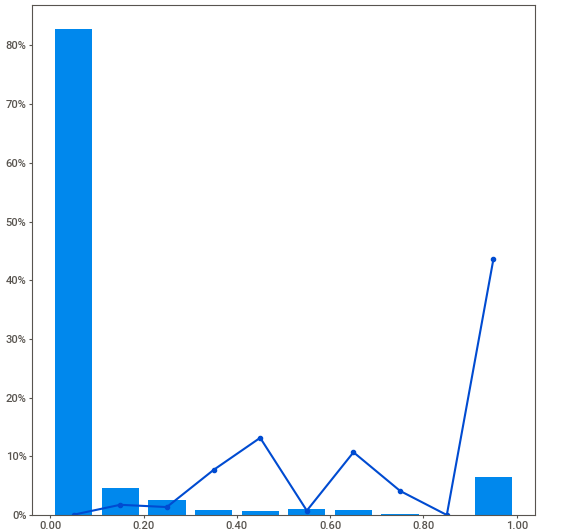
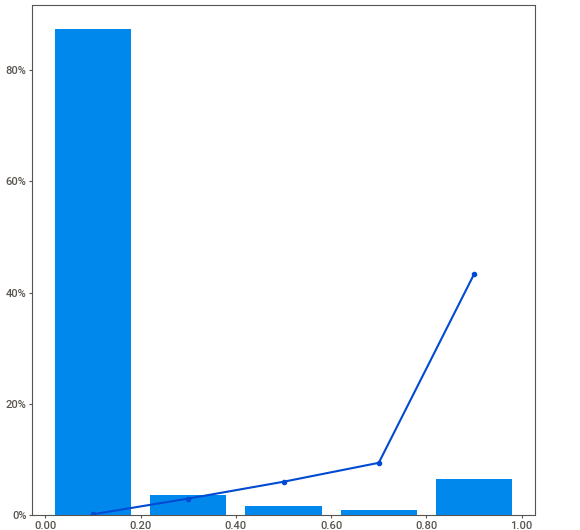
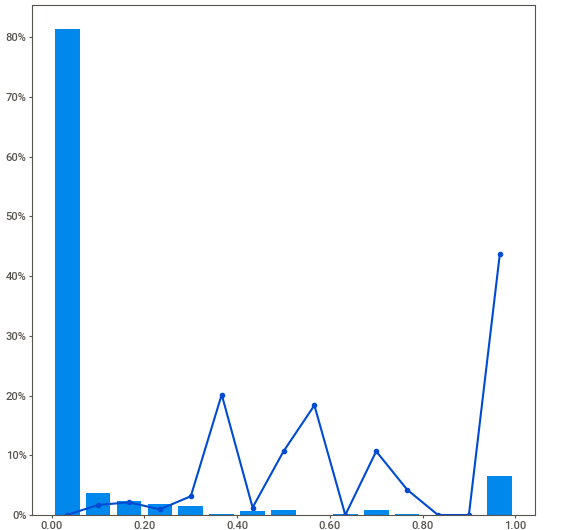
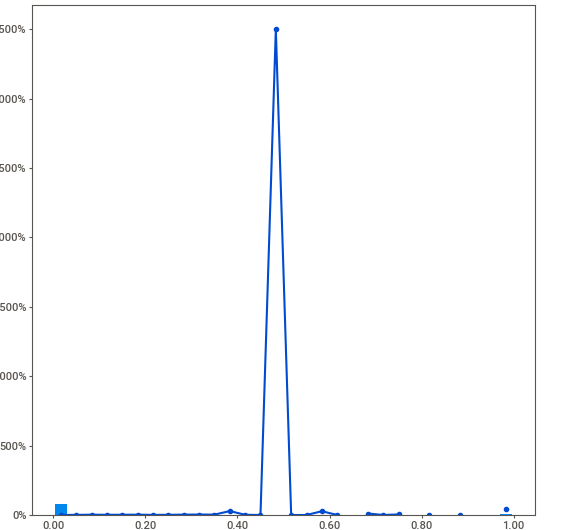
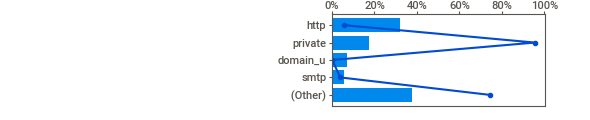
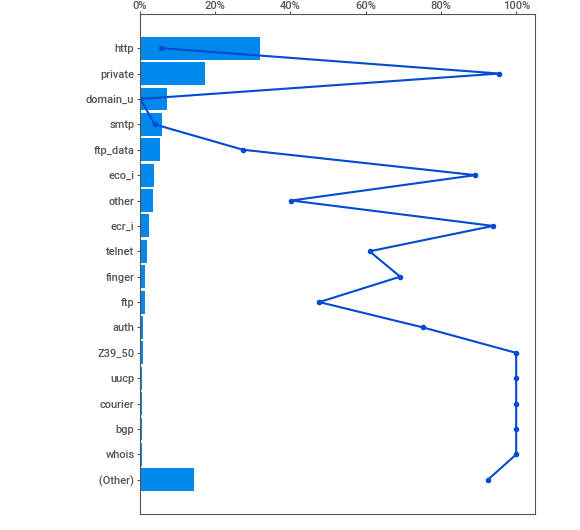
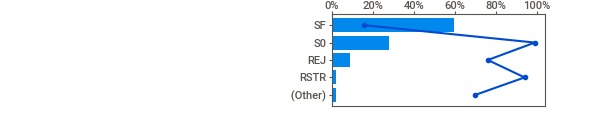
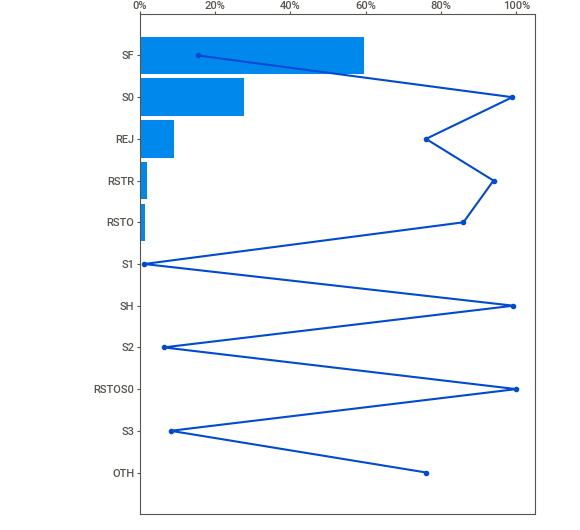
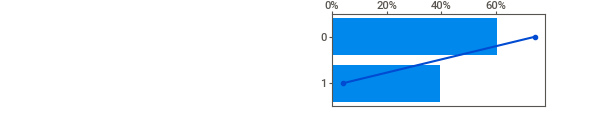
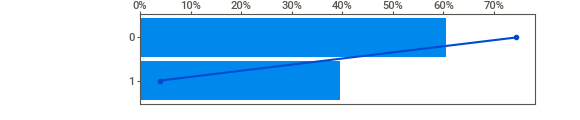
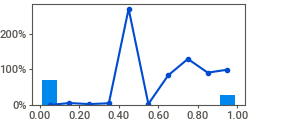
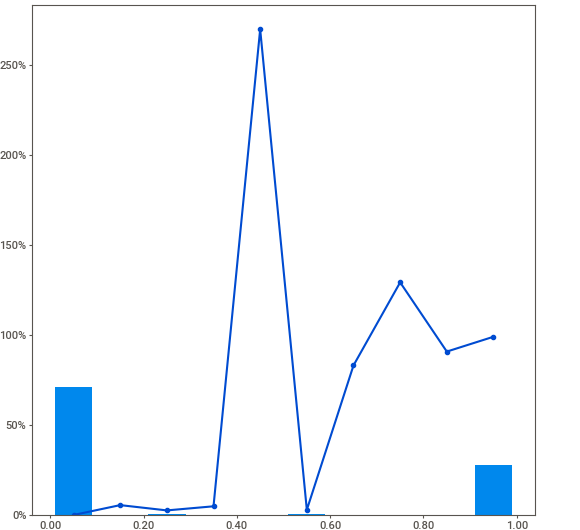
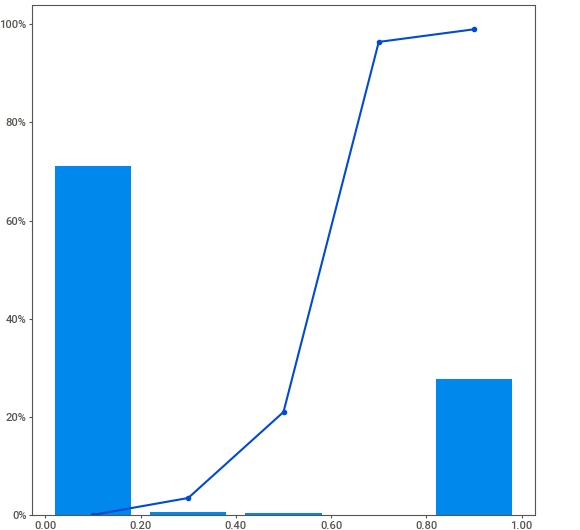
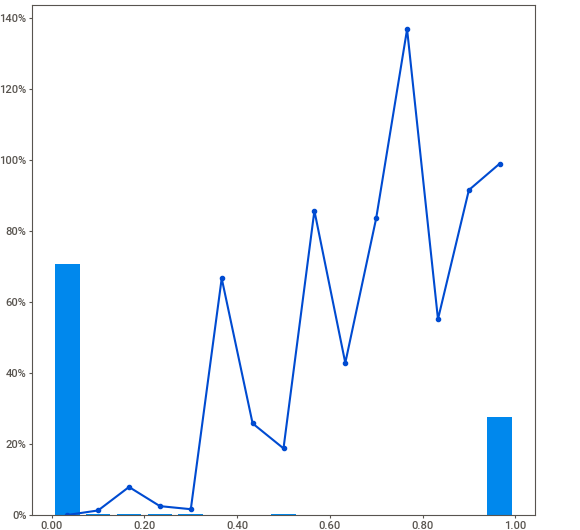
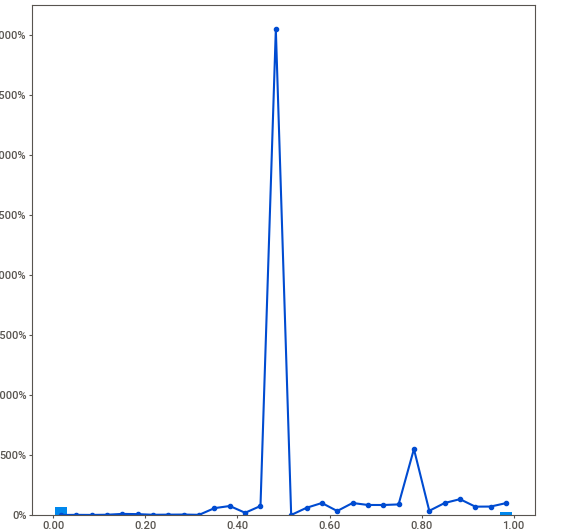
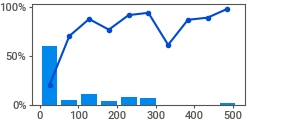
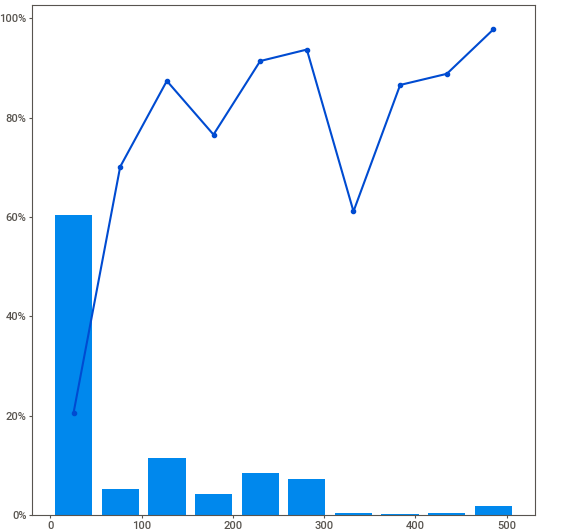
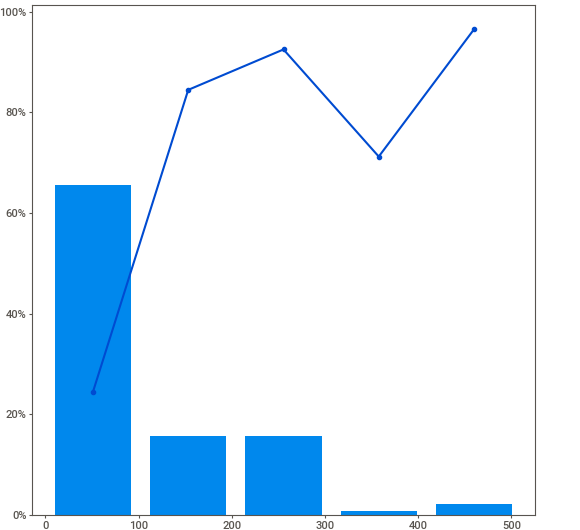
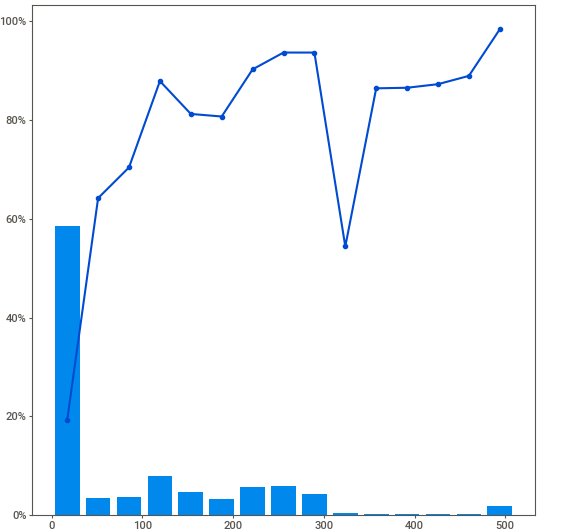
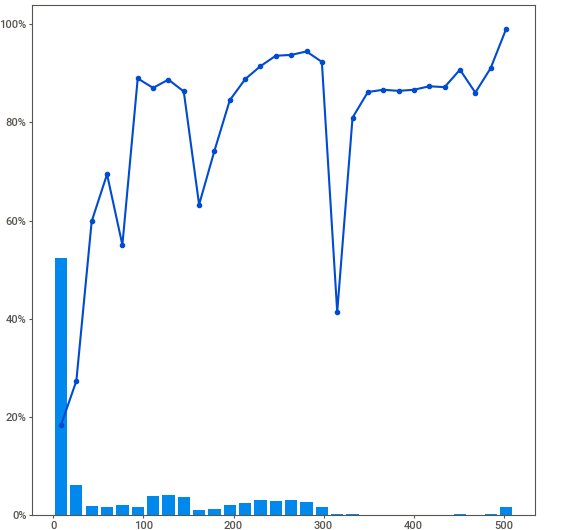
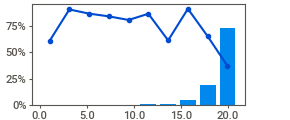
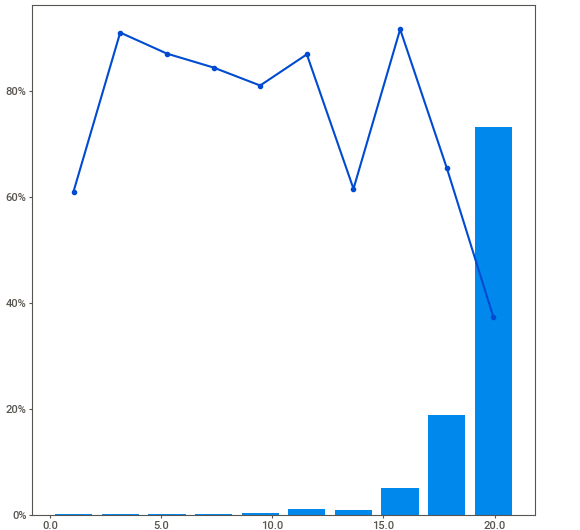
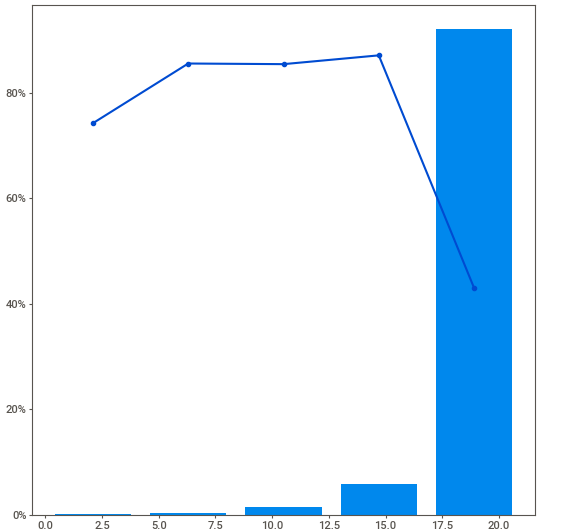
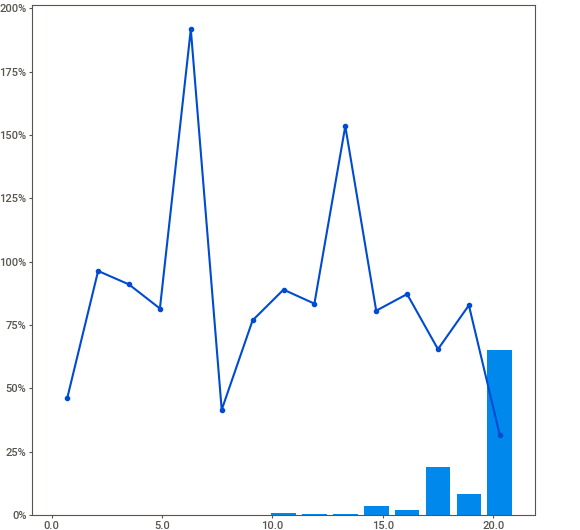
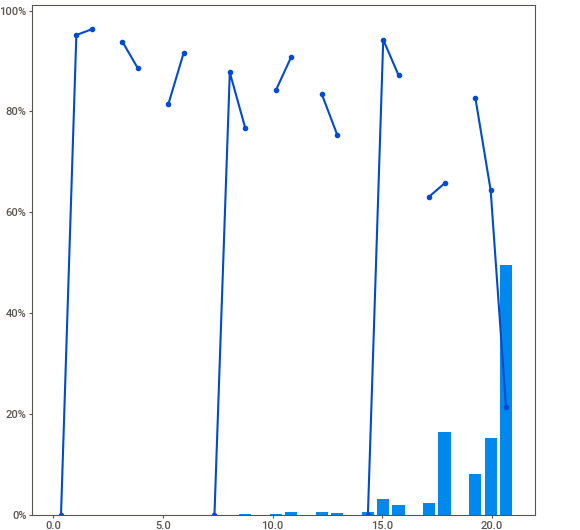
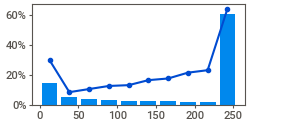
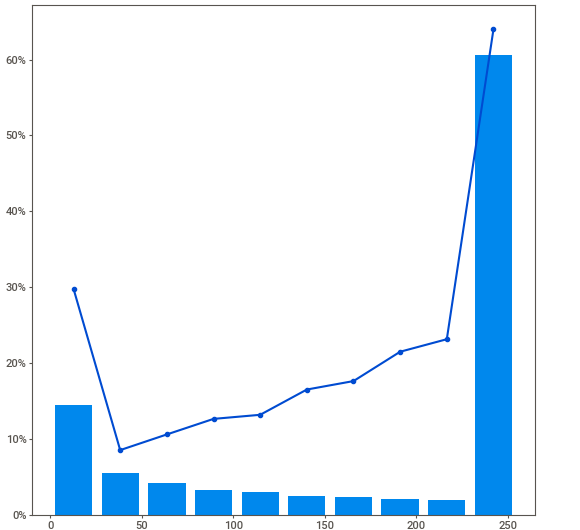
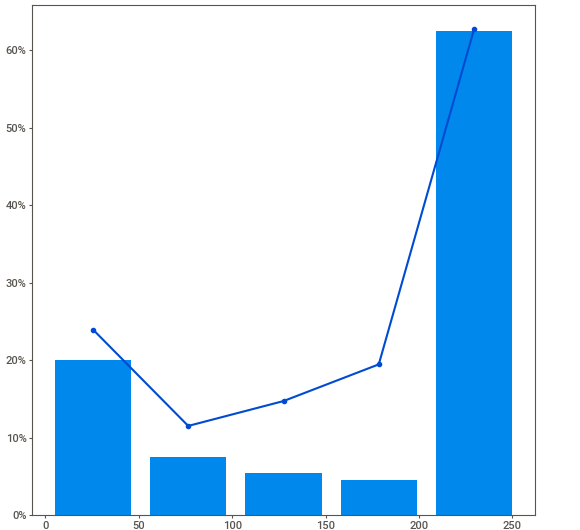
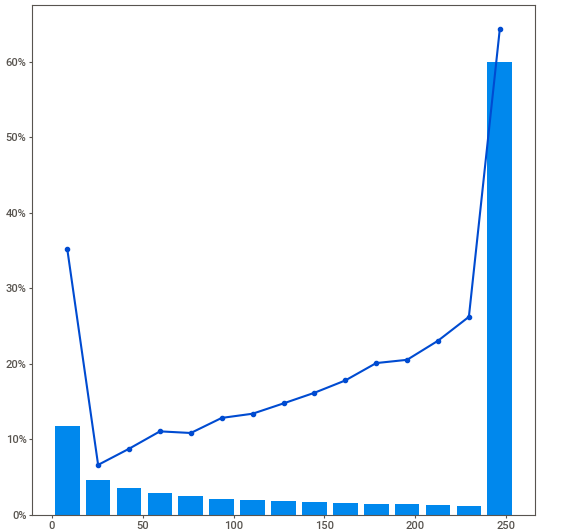
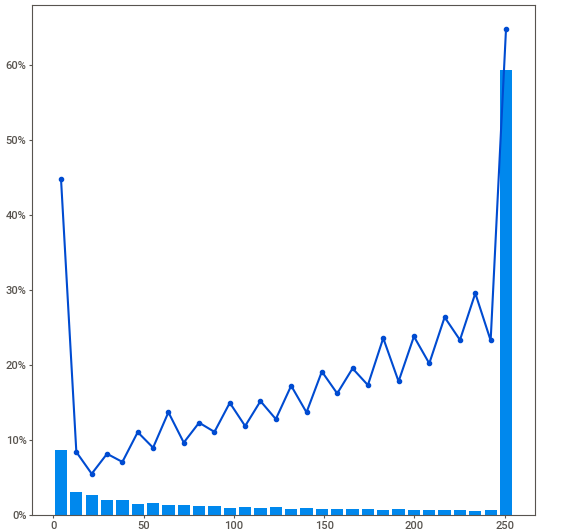
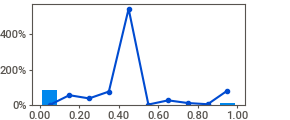
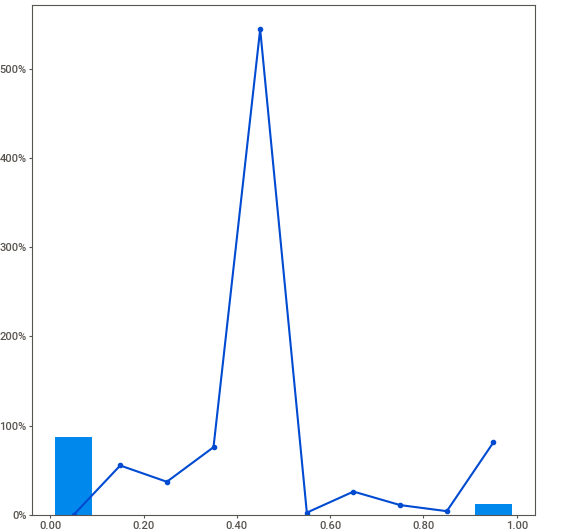
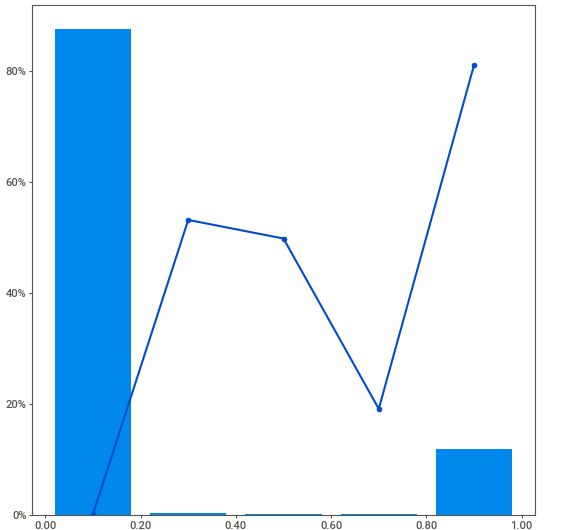
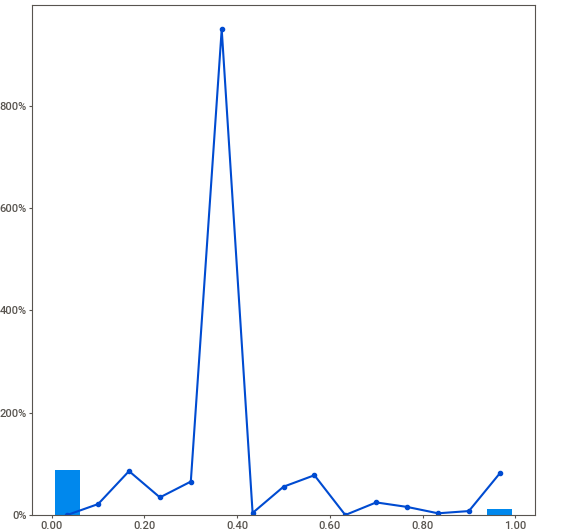
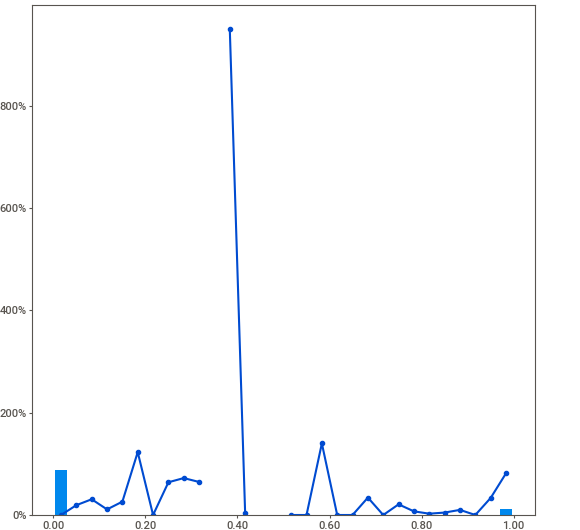
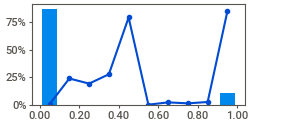
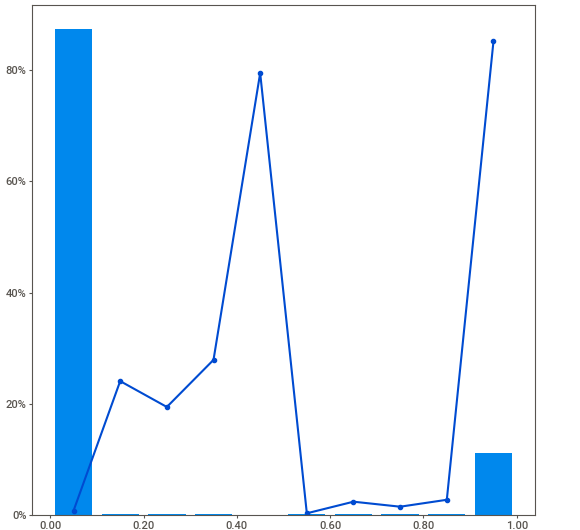
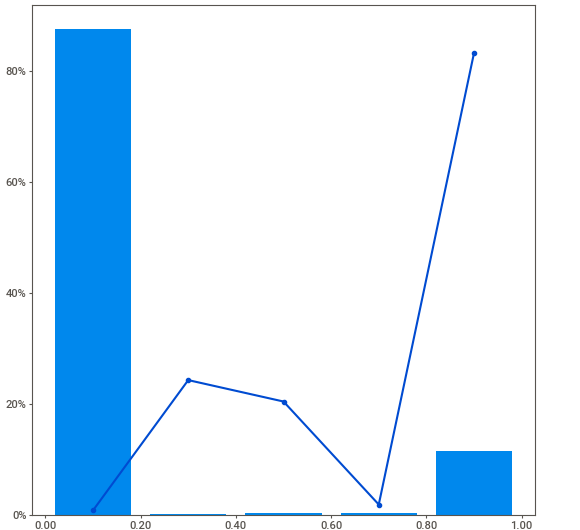
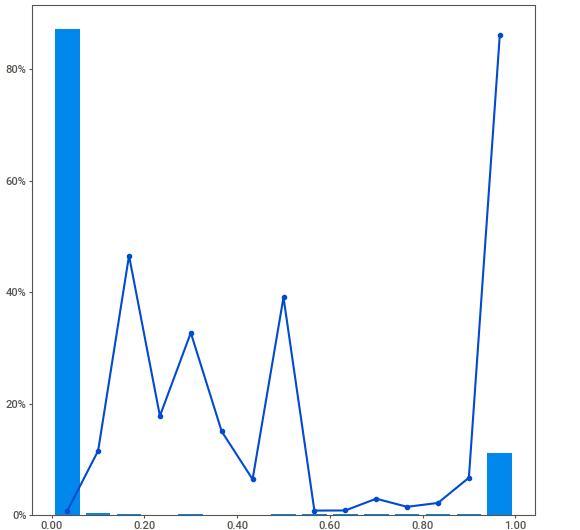
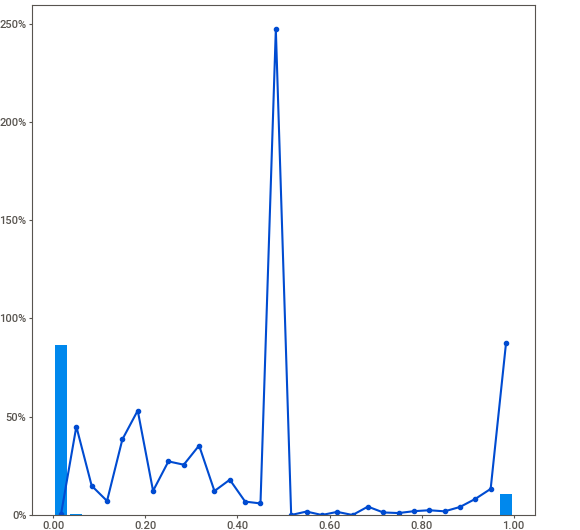
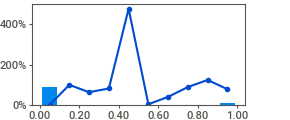
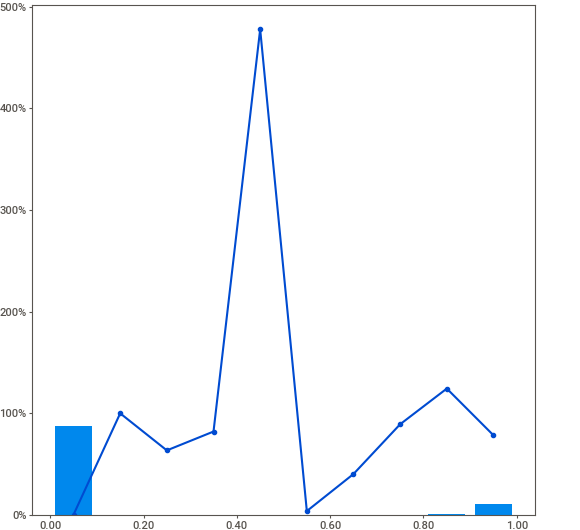
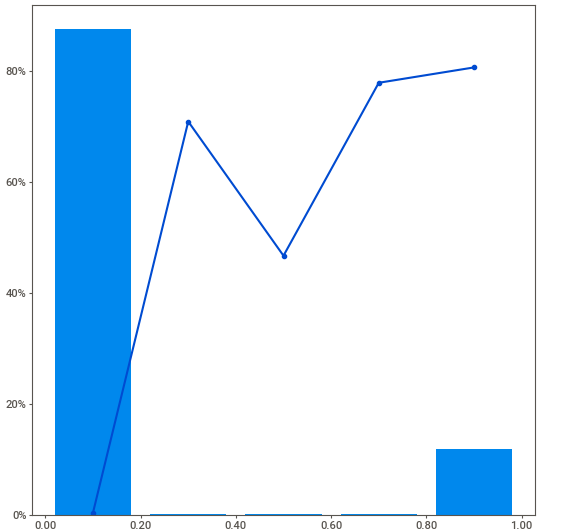
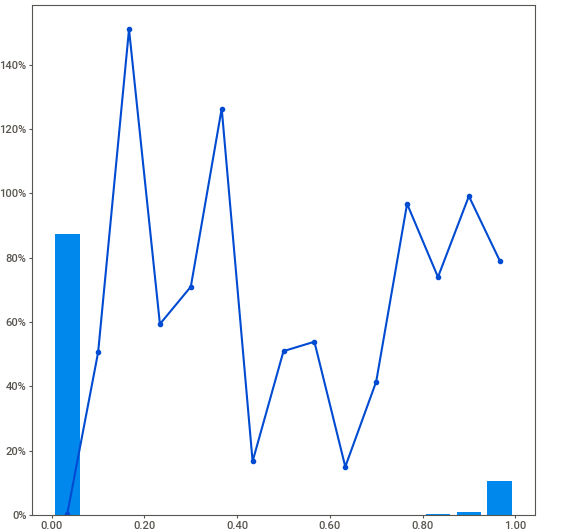
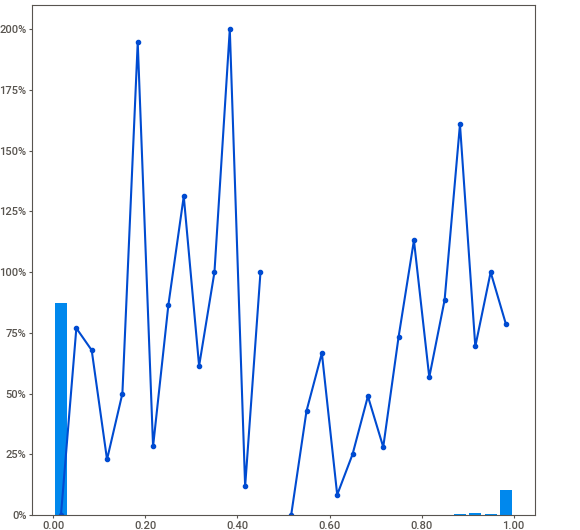
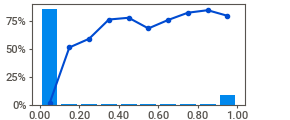
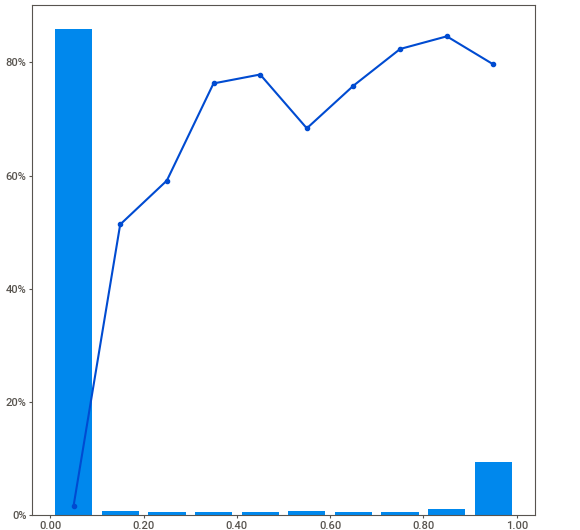
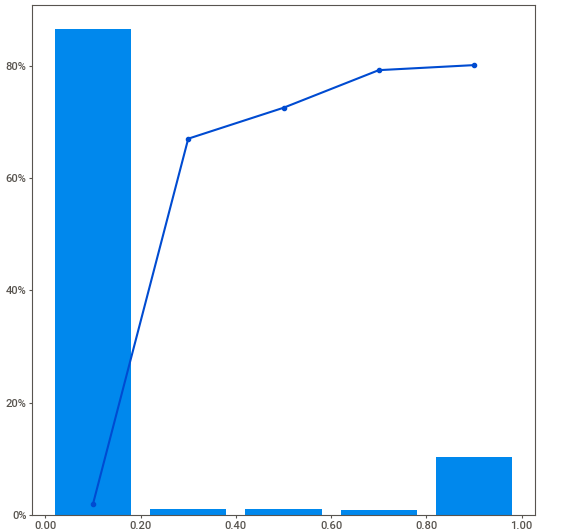
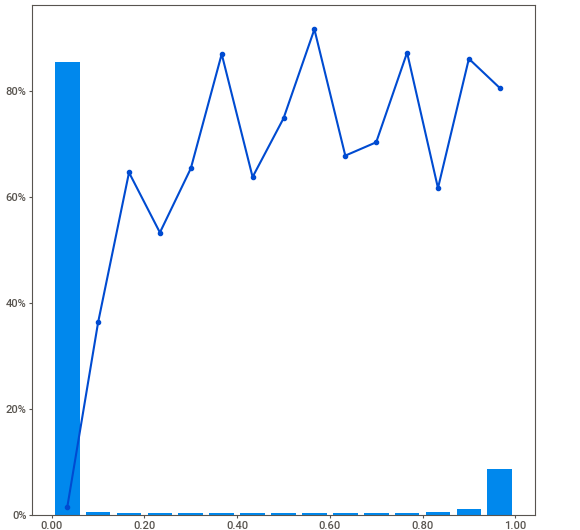
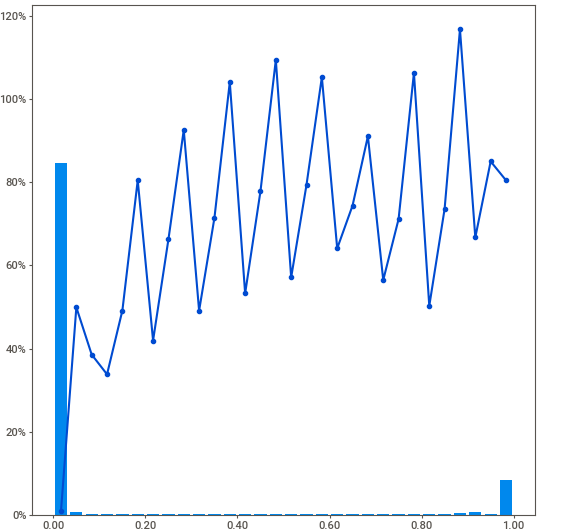
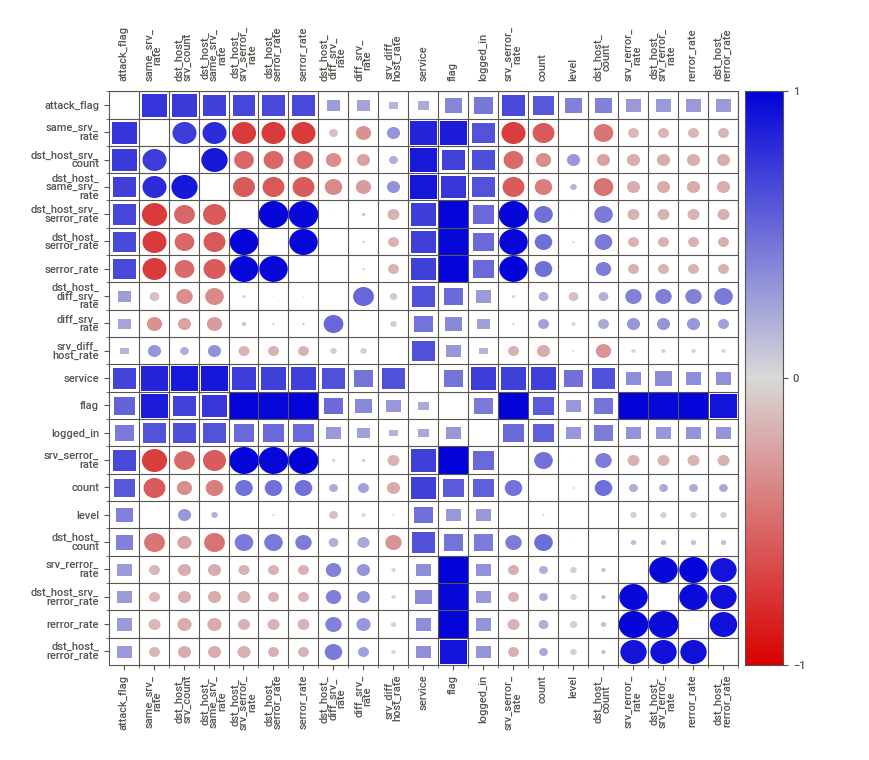
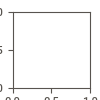

In [12]:
cor_ananlysis2.show_notebook()

In [13]:
X_train,Y_train = df_train_new.drop(['attack_flag'],axis=1),df_train_new['attack_flag']
X_test,Y_test = df_test_new.drop(['attack_flag'],axis=1),df_test_new['attack_flag']


In [ ]:
automl = AutoML(results_path="AutoML_classifier",mode="Perform")
automl.fit(X_train,Y_train)

In [ ]:
prediction = automl.predict(X_test)

In [ ]:
accuracy_score(Y_test,prediction)

0.8853353442157559

In [ ]:
automl = AutoML(results_path="AutoML_classifier",mode="Perform")
automl.fit(X_train,Y_train)

Linear algorithm was disabled.
This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [ ]:
prediction = automl.predict(X_test)

In [ ]:
accuracy_score(Y_test,prediction)

0.8853353442157559